# ENVIRONMENT MICROBIOME PCA AND VISUALIZATION CODE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [40]:
from matplotlib.patches import Ellipse
def get_cov_ellipse(cov, centre, nstd, **kwargs):
    
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """

    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)

    # Width and height of ellipse to draw
    width, height = 2 * nstd * np.sqrt(eigvals)
    return Ellipse(xy=centre, width=width, height=height,
                   angle=np.degrees(theta), **kwargs)

#### Heat map visualization of relative abundance table of the Top 30 taxa (Study PRJEB15093)

In [2]:
rel_abundance_table = pd.read_csv('rel-table-3.tsv', sep = '\t')

In [3]:
rel_abundance_table.head()

#OTU ID  ERR2233229  ERR2233230  \
0       Ambiguous_taxa;Ambiguous_taxa;Ambiguous_taxa    0.000000    0.000000   
1         D_0__Archaea;Ambiguous_taxa;Ambiguous_taxa    0.000823    0.000978   
2  D_0__Archaea;D_1__Altiarchaeota;D_2__Altiarchaeia    0.000183    0.000827   
3       D_0__Archaea;D_1__Asgardaeota;Ambiguous_taxa    0.000000    0.000338   
4  D_0__Archaea;D_1__Asgardaeota;D_2__Heimdallarc...    0.000061    0.000226   

   ERR2233231  ERR2233232  ERR2233233  ERR2233234  ERR2233235  ERR2233236  \
0    0.000000    0.000000     0.00000    0.000000    0.000000    0.000000   
1    0.000000    0.000000     0.00000    0.000000    0.000000    0.001180   
2    0.000235    0.000164     0.00013    0.000276    0.001028    0.001027   
3    0.000000    0.000000     0.00000    0.000276    0.000000    0.000000   
4    0.000000    0.000000     0.00000    0.000158    0.000000    0.000000   

   ERR2233237  ...  ERR2233317  ERR2233318  ERR2233319  ERR2233320  \
0    0.000000  ...         0.0         0.0         0.0    0.000000   
1    0.001480  ...         0.0         0.0         0.0    0.000000   
2    0.001657  ...         0.0         0.0         0.0    0.000000   
3    0.000000  ...         0.0         0.0         0.0    0.000000   
4    0.000000  ...         0.0         0.0         0.0    0.000091   

   ERR2233321  ERR2233322  ERR2233323  ERR2233324  ERR2233325  ERR2233326  
0    0.000000         0.0         0.0         0.0         0.0         0.0  
1    0.000000         0.0         0.0         0.0         0.0         0.0  
2    0.000143         0.0         0.0         0.0         0.0         0.0  
3    0.000000         0.0         0.0         0.0         0.0         0.0  
4    0.000000         0.0         0.0         0.0         0.0         0.0  

[5 rows x 99 columns]

In [4]:
metadata_15093 = pd.read_csv('Metadata_PRJEB15093.tsv', sep='\t')
#metadata_15093.head()

In [5]:
header = metadata_15093['library_name']

In [6]:
new_header = ['#OTU ID']
new_header[1:] = header

In [7]:
rel_abundance_table.columns = new_header

In [8]:
rel_abundance_table.head()

#OTU ID  EddyWB_2  EddyFeS2_2  \
0       Ambiguous_taxa;Ambiguous_taxa;Ambiguous_taxa  0.000000    0.000000   
1         D_0__Archaea;Ambiguous_taxa;Ambiguous_taxa  0.000823    0.000978   
2  D_0__Archaea;D_1__Altiarchaeota;D_2__Altiarchaeia  0.000183    0.000827   
3       D_0__Archaea;D_1__Asgardaeota;Ambiguous_taxa  0.000000    0.000338   
4  D_0__Archaea;D_1__Asgardaeota;D_2__Heimdallarc...  0.000061    0.000226   

   Eddy WB 1 cm  Eddy WB 2 cm  Eddy WB 3 cm  Eddy WB 4 cm  Eddy WB 5 cm  \
0      0.000000      0.000000       0.00000      0.000000      0.000000   
1      0.000000      0.000000       0.00000      0.000000      0.000000   
2      0.000235      0.000164       0.00013      0.000276      0.001028   
3      0.000000      0.000000       0.00000      0.000276      0.000000   
4      0.000000      0.000000       0.00000      0.000158      0.000000   

   Eddy WB 6 cm  Eddy WB 7 cm  ...  OB_Site_B_burrow  OB_Site_A_oxic  \
0      0.000000      0.000000  ...               0.0             0.0   
1      0.001180      0.001480  ...               0.0             0.0   
2      0.001027      0.001657  ...               0.0             0.0   
3      0.000000      0.000000  ...               0.0             0.0   
4      0.000000      0.000000  ...               0.0             0.0   

   OB_Site_B_oxic  OB_Site_A_anoxic  OB_Site_B_anoxic  blank114july  \
0             0.0          0.000000          0.000000           0.0   
1             0.0          0.000000          0.000000           0.0   
2             0.0          0.000000          0.000143           0.0   
3             0.0          0.000000          0.000000           0.0   
4             0.0          0.000091          0.000000           0.0   

   blank214july  blank15july  blankextraction1  blankextractioopen1  
0           0.0          0.0               0.0                  0.0  
1           0.0          0.0               0.0                  0.0  
2           0.0          0.0               0.0                  0.0  
3           0.0          0.0               0.0                  0.0  
4           0.0          0.0               0.0                  0.0  

[5 rows x 99 columns]

In [9]:
rel_abundance_table.drop(['blank114july','blank214july','blank15july','blankextraction1','blankextractioopen1'], axis =1, inplace=True)

In [10]:
rel_sum = rel_abundance_table.sum(axis=1, skipna=True)

In [11]:
rel_abundance_table.insert(loc = len(rel_abundance_table.columns), column='Taxa_abundance', value=rel_sum)

In [12]:
rel_abundance_table.set_index('#OTU ID', inplace=True)

In [13]:
new_rel_abundance_table = rel_abundance_table.transpose()

In [14]:
new_rel_abundance_table

#OTU ID           Ambiguous_taxa;Ambiguous_taxa;Ambiguous_taxa  \
EddyWB_2                                              0.000000   
EddyFeS2_2                                            0.000000   
Eddy WB 1 cm                                          0.000000   
Eddy WB 2 cm                                          0.000000   
Eddy WB 3 cm                                          0.000000   
...                                                        ...   
OB_Site_A_oxic                                        0.000000   
OB_Site_B_oxic                                        0.000000   
OB_Site_A_anoxic                                      0.000000   
OB_Site_B_anoxic                                      0.000000   
Taxa_abundance                                        0.000118   

#OTU ID           D_0__Archaea;Ambiguous_taxa;Ambiguous_taxa  \
EddyWB_2                                            0.000823   
EddyFeS2_2                                          0.000978   
Eddy WB 1 cm                                        0.000000   
Eddy WB 2 cm                                        0.000000   
Eddy WB 3 cm                                        0.000000   
...                                                      ...   
OB_Site_A_oxic                                      0.000000   
OB_Site_B_oxic                                      0.000000   
OB_Site_A_anoxic                                    0.000000   
OB_Site_B_anoxic                                    0.000000   
Taxa_abundance                                      0.064129   

#OTU ID           D_0__Archaea;D_1__Altiarchaeota;D_2__Altiarchaeia  \
EddyWB_2                                                   0.000183   
EddyFeS2_2                                                 0.000827   
Eddy WB 1 cm                                               0.000235   
Eddy WB 2 cm                                               0.000164   
Eddy WB 3 cm                                               0.000130   
...                                                             ...   
OB_Site_A_oxic                                             0.000000   
OB_Site_B_oxic                                             0.000000   
OB_Site_A_anoxic                                           0.000000   
OB_Site_B_anoxic                                           0.000143   
Taxa_abundance                                             0.016749   

#OTU ID           D_0__Archaea;D_1__Asgardaeota;Ambiguous_taxa  \
EddyWB_2                                              0.000000   
EddyFeS2_2                                            0.000338   
Eddy WB 1 cm                                          0.000000   
Eddy WB 2 cm                                          0.000000   
Eddy WB 3 cm                                          0.000000   
...                                                        ...   
OB_Site_A_oxic                                        0.000000   
OB_Site_B_oxic                                        0.000000   
OB_Site_A_anoxic                                      0.000000   
OB_Site_B_anoxic                                      0.000000   
Taxa_abundance                                        0.007150   

#OTU ID           D_0__Archaea;D_1__Asgardaeota;D_2__Heimdallarchaeia  \
EddyWB_2                                                   0.000061     
EddyFeS2_2                                                 0.000226     
Eddy WB 1 cm                                               0.000000     
Eddy WB 2 cm                                               0.000000     
Eddy WB 3 cm                                               0.000000     
...                                                             ...     
OB_Site_A_oxic                                             0.000000     
OB_Site_B_oxic                                             0.000000     
OB_Site_A_anoxic                                           0.000091     
OB_Site_B_anoxic                                           0.0

In [15]:
taxa_header_list = list(new_rel_abundance_table.columns)
taxa_name = (lambda x: x.split(';')[len(x.split(';'))-1] if x.split(';')[len(x.split(';'))-1]!= '__' else x.split(';')[len(x.split(';'))-2]) 
taxa_header = list(map(taxa_name,taxa_header_list))

In [16]:
new_rel_abundance_table.columns = taxa_header

In [17]:
new_rel_abundance_table.head()

Ambiguous_taxa  Ambiguous_taxa  D_2__Altiarchaeia  \
EddyWB_2                 0.0        0.000823           0.000183   
EddyFeS2_2               0.0        0.000978           0.000827   
Eddy WB 1 cm             0.0        0.000000           0.000235   
Eddy WB 2 cm             0.0        0.000000           0.000164   
Eddy WB 3 cm             0.0        0.000000           0.000130   

              Ambiguous_taxa  D_2__Heimdallarchaeia  D_2__Lokiarchaeia  \
EddyWB_2            0.000000               0.000061           0.000061   
EddyFeS2_2          0.000338               0.000226           0.000113   
Eddy WB 1 cm        0.000000               0.000000           0.000000   
Eddy WB 2 cm        0.000000               0.000000           0.000205   
Eddy WB 3 cm        0.000000               0.000000           0.000000   

              D_2__Odinarchaeia  D_2__uncultured archaeon  D_1__Asgardaeota  \
EddyWB_2               0.000274                  0.000000          0.000335   
EddyFeS2_2             0.000677                  0.000000          0.000113   
Eddy WB 1 cm           0.000000                  0.000000          0.000000   
Eddy WB 2 cm           0.000000                  0.000082          0.000000   
Eddy WB 3 cm           0.000000                  0.000000          0.000000   

              D_2__Bathyarchaeia  ...  D_2__uncultured Caldithrix sp.  \
EddyWB_2                0.007894  ...                             0.0   
EddyFeS2_2              0.012784  ...                             0.0   
Eddy WB 1 cm            0.002866  ...                             0.0   
Eddy WB 2 cm            0.005937  ...                             0.0   
Eddy WB 3 cm            0.005422  ...                             0.0   

              D_2__uncultured Nitrospinaceae bacterium  \
EddyWB_2                                           0.0   
EddyFeS2_2                                         0.0   
Eddy WB 1 cm                                       0.0   
Eddy WB 2 cm                                       0.0   
Eddy WB 3 cm                                       0.0   

              D_2__uncultured bacterium  \
EddyWB_2                       0.003932   
EddyFeS2_2                     0.002782   
Eddy WB 1 cm                   0.000799   
Eddy WB 2 cm                   0.000901   
Eddy WB 3 cm                   0.000737   

              D_2__uncultured candidate division GN04 bacterium  \
EddyWB_2                                                    0.0   
EddyFeS2_2                                                  0.0   
Eddy WB 1 cm                                                0.0   
Eddy WB 2 cm                                                0.0   
Eddy WB 3 cm                                                0.0   

              D_2__uncultured candidate division TA06 bacterium  \
EddyWB_2                                                    0.0   
EddyFeS2_2                                                  0.0   
Eddy WB 1 cm                                                0.0   
Eddy WB 2 cm                                                0.0   
Eddy WB 3 cm                                                0.0   

              D_2__uncultured delta proteobacterium  D_2__uncultured organism  \
EddyWB_2                                        0.0                  0.000000   
EddyFeS2_2                                      0.0                  0.000000   
Eddy WB 1 cm                                    0.0                  0.000094   
Eddy WB 2 cm                                    0.0                  0.000000   
Eddy WB 3 cm                                    0.0                  0.000000   

              D_1__Zixibacteria        __        __  
EddyWB_2                    0.0  0.004572  0.000305  
EddyFeS2_2                  0.0  0.002482  0.000000  
Eddy WB 1 cm                0.0  0.001879  0.000000  
Eddy WB 2 cm                0.0  0.000942  0.000000  
Eddy WB 3 cm                0.0  0.001518  0.000000  

[5 rows x 292 columns]

In [18]:
rel_abundance_table.reset_index(inplace=True)

In [19]:
new_OTU_row = rel_abundance_table['#OTU ID'].apply(lambda x: x.split(';')[len(x.split(';'))-1] if x.split(';')[len(x.split(';'))-1]!= '__' else x.split(';')[len(x.split(';'))-2])

In [20]:
rel_abundance_table['#OTU ID'] = new_OTU_row

In [21]:
rel_abundance_table.set_index('#OTU ID', inplace=True)

In [22]:
rel_abundance_table.head()

EddyWB_2  EddyFeS2_2  Eddy WB 1 cm  Eddy WB 2 cm  \
#OTU ID                                                                   
Ambiguous_taxa         0.000000    0.000000      0.000000      0.000000   
Ambiguous_taxa         0.000823    0.000978      0.000000      0.000000   
D_2__Altiarchaeia      0.000183    0.000827      0.000235      0.000164   
Ambiguous_taxa         0.000000    0.000338      0.000000      0.000000   
D_2__Heimdallarchaeia  0.000061    0.000226      0.000000      0.000000   

                       Eddy WB 3 cm  Eddy WB 4 cm  Eddy WB 5 cm  Eddy WB 6 cm  \
#OTU ID                                                                         
Ambiguous_taxa              0.00000      0.000000      0.000000      0.000000   
Ambiguous_taxa              0.00000      0.000000      0.000000      0.001180   
D_2__Altiarchaeia           0.00013      0.000276      0.001028      0.001027   
Ambiguous_taxa              0.00000      0.000276      0.000000      0.000000   
D_2__Heimdallarchaeia       0.00000      0.000158      0.000000      0.000000   

                       Eddy WB 7 cm  Eddy WB 8 cm  ...  293 int 5  \
#OTU ID                                            ...              
Ambiguous_taxa             0.000000      0.000000  ...   0.000000   
Ambiguous_taxa             0.001480      0.000000  ...   0.001163   
D_2__Altiarchaeia          0.001657      0.000166  ...   0.000000   
Ambiguous_taxa             0.000000      0.000166  ...   0.000000   
D_2__Heimdallarchaeia      0.000000      0.000000  ...   0.000000   

                       277 int 7 1  277 int 7  OB_Site_A_burrow  \
#OTU ID                                                           
Ambiguous_taxa            0.000000   0.000000               0.0   
Ambiguous_taxa            0.005086   0.001765               0.0   
D_2__Altiarchaeia         0.000000   0.000000               0.0   
Ambiguous_taxa            0.000000   0.000000               0.0   
D_2__Heimdallarchaeia     0.000000   0.000056               0.0   

                       OB_Site_B_burrow  OB_Site_A_oxic  OB_Site_B_oxic  \
#OTU ID                                                                   
Ambiguous_taxa                      0.0             0.0             0.0   
Ambiguous_taxa                      0.0             0.0             0.0   
D_2__Altiarchaeia                   0.0             0.0             0.0   
Ambiguous_taxa                      0.0             0.0             0.0   
D_2__Heimdallarchaeia               0.0             0.0             0.0   

                       OB_Site_A_anoxic  OB_Site_B_anoxic  Taxa_abundance  
#OTU ID                                                                    
Ambiguous_taxa                 0.000000          0.000000        0.000118  
Ambiguous_taxa                 0.000000          0.000000        0.064129  
D_2__Altiarchaeia              0.000000          0.000143        0.016749  
Ambiguous_taxa                 0.000000          0.000000        0.007150  
D_2__Heimdallarchaeia          0.000091          0.000000        0.003334  

[5 rows x 94 columns]

In [23]:
rel_abundance_top30 = rel_abundance_table.nlargest(30, 'Taxa_abundance')

In [24]:
rel_abundance_top30.drop(['Taxa_abundance'], axis=1, inplace=True)
rel_abundance_top30.head()

EddyWB_2  EddyFeS2_2  Eddy WB 1 cm  Eddy WB 2 cm  \
#OTU ID                                                                      
D_2__Gammaproteobacteria  0.206547    0.188832      0.260759      0.346817   
D_2__Bacteroidia          0.196763    0.209325      0.289278      0.233531   
D_2__Deltaproteobacteria  0.173326    0.235119      0.153308      0.159140   
D_2__Bacilli              0.000122    0.000000      0.000000      0.000000   
D_2__Thermoanaerobaculia  0.046509    0.055198      0.066482      0.060102   

                          Eddy WB 3 cm  Eddy WB 4 cm  Eddy WB 5 cm  \
#OTU ID                                                              
D_2__Gammaproteobacteria      0.232651      0.357115      0.202251   
D_2__Bacteroidia              0.278843      0.208826      0.242074   
D_2__Deltaproteobacteria      0.180560      0.167889      0.203998   
D_2__Bacilli                  0.000000      0.000000      0.000154   
D_2__Thermoanaerobaculia      0.064235      0.051467      0.063923   

                          Eddy WB 6 cm  Eddy WB 7 cm  Eddy WB 8 cm  ...  \
#OTU ID                                                             ...   
D_2__Gammaproteobacteria      0.184772      0.183427      0.267742  ...   
D_2__Bacteroidia              0.183745      0.209115      0.233667  ...   
D_2__Deltaproteobacteria      0.247099      0.226990      0.167118  ...   
D_2__Bacilli                  0.000000      0.000000      0.000000  ...   
D_2__Thermoanaerobaculia      0.055363      0.064220      0.080135  ...   

                          293 int 5 1  293 int 5  277 int 7 1  277 int 7  \
#OTU ID                                                                    
D_2__Gammaproteobacteria     0.099789   0.302057     0.150302   0.641848   
D_2__Bacteroidia             0.092948   0.087369     0.054251   0.022872   
D_2__Deltaproteobacteria     0.167480   0.087731     0.159501   0.055376   
D_2__Bacilli                 0.050316   0.226808     0.070482   0.059601   
D_2__Thermoanaerobaculia     0.088239   0.052432     0.081237   0.026871   

                          OB_Site_A_burrow  OB_Site_B_burrow  OB_Site_A_oxic  \
#OTU ID                                                                        
D_2__Gammaproteobacteria          0.337242          0.245154        0.450707   
D_2__Bacteroidia                  0.161044          0.213959        0.165531   
D_2__Deltaproteobacteria          0.119465          0.134915        0.066481   
D_2__Bacilli                      0.000378          0.000000        0.000206   
D_2__Thermoanaerobaculia          0.034594          0.036041        0.028698   

                          OB_Site_B_oxic  OB_Site_A_anoxic  OB_Site_B_anoxic  
#OTU ID                                                                       
D_2__Gammaproteobacteria        0.383066          0.197734          0.093371  
D_2__Bacteroidia                0.233155          0.180172          0.165978  
D_2__Deltaproteobacteria        0.087211          0.118158          0.148539  
D_2__Bacilli                    0.000000          0.000000          0.000000  
D_2__Thermoanaerobaculia        0.026545          0.058465          0.047612  

[5 rows x 93 columns]

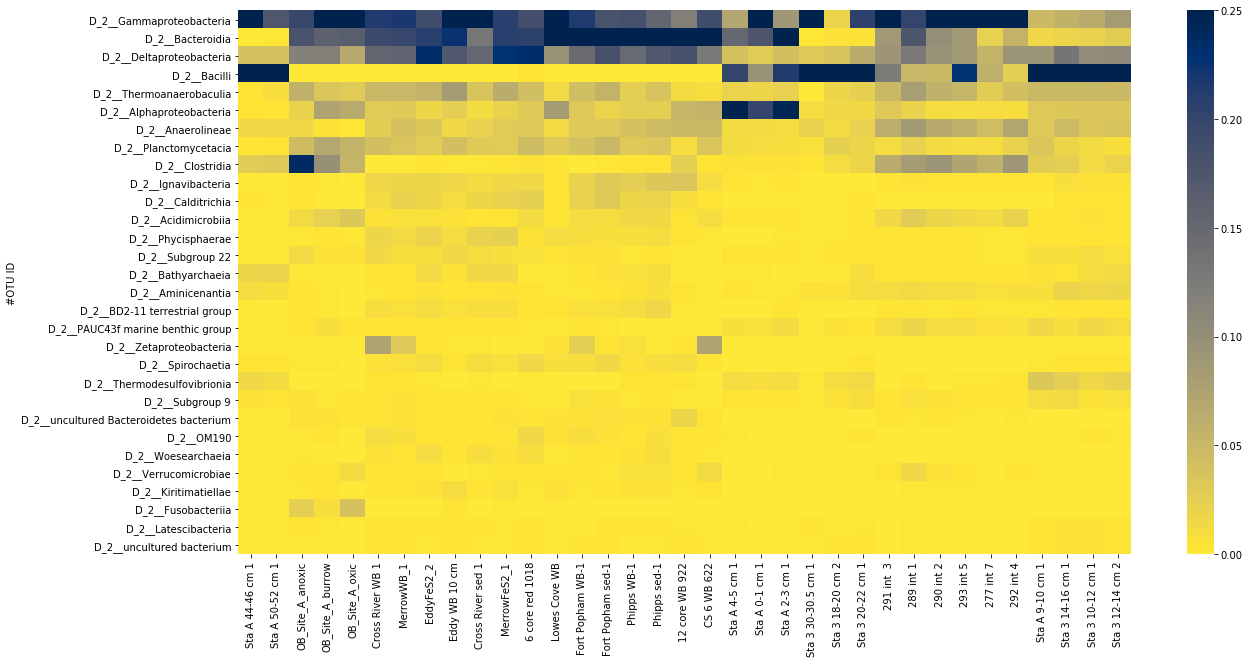

In [25]:
plt.figure(figsize= (20,10)) 
sns.heatmap(rel_abundance_top30[['Sta A 44-46 cm 1', 'Sta A 50-52 cm 1', 'OB_Site_A_anoxic', 'OB_Site_A_burrow', 
                 'OB_Site_A_oxic', 'Cross River WB 1', 'MerrowWB_1', 'EddyFeS2_2', 'Eddy WB 10 cm', 
                 'Cross River sed 1', 'MerrowFeS2_1', '6 core red 1018', 'Lowes Cove WB', 
                 'Fort Popham WB-1', 'Fort Popham sed-1', 'Phipps WB-1', 'Phipps sed-1', 
                 '12 core WB 922', 'CS 6 WB 622', 'Sta A 4-5 cm 1', 'Sta A 0-1 cm 1', 'Sta A 2-3 cm 1', 
                 'Sta 3 30-30.5 cm 1', 'Sta 3 18-20 cm 2', 'Sta 3 20-22 cm 1', '291 int  3', '289 int 1', 
                 '290 int 2', '293 int 5', '277 int 7', '292 int 4', 'Sta A 9-10 cm 1', 
                'Sta 3 14-16 cm 1', 'Sta 3 10-12 cm 1', 'Sta 3 12-14 cm 2']], cmap='cividis_r', vmax=0.25, vmin=0)

## Study 1674 EMP

In [26]:
feature_table_1674 = pd.read_csv('1674-feature-table.tsv', sep='\t', low_memory=False)
feature_table_1674.head()

# Constructed from biom file
#OTU ID                          1674.McG.F110714Ch1H1 1674.McG.F110714Ch1H2 1674.McG.F110714Ch1H3 1674.McG.F110714Ch1H4 1674.McG.F110714Ch1H5 1674.McG.F110714Ch1R1 1674.McG.F110714Ch1R2 1674.McG.F110714Ch1R3 1674.McG.F110714Ch1R4 1674.McG.F110714Ch1R5 1674.McG.F110714Ch2H1 1674.McG.F110714Ch2H2 1674.McG.F110714Ch2H3 1674.McG.F110714Ch2H4 1674.McG.F110714Ch2R1 1674.McG.F110714Ch2R2 1674.McG.F110714Ch2R3 1674.McG.F110714Ch2R4 1674.McG.F110714Ch2R5 1674.McG.F110714Ch3H1 1674.McG.F110714Ch3H2 1674.McG.F110714Ch3H3 1674.McG.F110714Ch3H4 1674.McG.F110714Ch3H5 1674.McG.F110714Ch3R1 1674.McG.F110714Ch3R2 1674.McG.F110714Ch3R3 1674.McG.F110714Ch3R4 1674.McG.F110714Ch3R5 1674.McG.F110714Jr1H1 1674.McG.F110714Jr1H2 1674.McG.F110714Jr1H3 1674.McG.F110714Jr1H4 1674.McG.F110714Jr1H5 1674.McG.F110714Jr1R1 1674.McG.F110714Jr1R2 1674.McG.F110714Jr1R3 1674.McG.F110714Jr1R4 1674.McG.F110714Jr1R5 1674.McG.F110714Jr3H1 1674.McG.F110714Jr3H2 1674.McG.F110714Jr3H3 1674.McG.F110714Jr3H4 1674.McG.F110714Jr3H5 1674.McG.F110714Jr3R1 1674.McG.F110714Jr3R2 1674.McG.F110714Jr3R3 1674.McG.F110714Jr3R4 1674.McG.F110714Jr3R5 1674.McG.F110714Jr5H1 1674.McG.F110714Jr5H2 1674.McG.F110714Jr5H3 1674.McG.F110714Jr5H4 1674.McG.F110714Jr5H5 1674.McG.F110714Jr5R1 1674.McG.F110714Jr5R2 1674.McG.F110714Jr5R3 1674.McG.F110714Jr5R4 1674.McG.F110714Jr5R5 1674.McG.F110715Ly2H1 1674.McG.F110715Ly2H2 1674.McG.F110715Ly2H3 1674.McG.F110715Ly2H4 1674.McG.F110715Ly2H5 1674.McG.F110715Ly2R1 1674.McG.F110715Ly2R2 1674.McG.F110715Ly2R3 1674.McG.F110715Ly2R4 1674.McG.F110715Ly2R5 1674.McG.F110715Ly5H1 1674.McG.F110715Ly5H2 1674.McG.F110715Ly5H3 1674.McG.F110715Ly5H4 1674.McG.F110715Ly5H5 1674.McG.F110715Ly5R1 1674.McG.F110715Ly5R2 1674.McG.F110715Ly5R3 1674.McG.F110715Ly5R4 1674.McG.F110715Ly5R5 1674.McG.F110715Ly6H1 1674.McG.F110715Ly6H2 1674.McG.F110715Ly6H3 1674.McG.F110715Ly6H4 1674.McG.F110715Ly6H5 1674.McG.F110715Ly6R1 1674.McG.F110715Ly6R2 1674.McG.F110715Ly6R3 1674.McG.F110715Ly6R4 1674.McG.F110715Ly6R5 1674.McG.G110713Br1 1674.McG.G110713Br2 1674.McG.G110713Br3 1674.McG.G110713Lb4 1674.McG.G110713Lb5 1674.McG.G110713Lb6 1674.McG.G110713Sj1 1674.McG.G110713Sj2 1674.McG.G110713Sj3 1674.McG.G110713Sm1 1674.McG.G110713Sm3 1674.McG.G110713Sm5 1674.McG.G110713So1 1674.McG.G110713So3 1674.McG.G110713So5 1674.McG.G110713Sp4 1674.McG.G110713Sp5 1674.McG.G110713Sp6 1674.McG.G110714Ch1 1674.McG.G110714Ch2 1674.McG.G110714Ch3 1674.McG.G110714Jr1 1674.McG.G110714Jr3 1674.McG.G110714Jr5 1674.McG.G110715Ly2 1674.McG.G110715Ly5 1674.McG.G110715Ly6 1674.McG.G110718Ha2 1674.McG.G110718Ha3 1674.McG.G110718Ha6 1674.McG.G110719Di1 1674.McG.G110719Di3 1674.McG.G110719Di4 1674.McG.G110719Di5 1674.McG.G110719Di6 1674.McG.G110719Di7 1674.McG.P110714Ch1 1674.McG.P110714Ch2 1674.McG.P110714Ch3 1674.McG.P110714Hi1 1674.McG.P110714Hi2 1674.McG.P110714Hi3 1674.McG.P110714Jr1 1674.McG.P110714Jr2 1674.McG.P110714Jr3 1674.McG.P110715Ly1 1674.McG.P110715Ly2 1674.McG.P110715Ly3 1674.McG.P110718Cps1 1674.McG.P110718Cps2 1674.McG.P110718Cps3 1674.McG.P110718Gl1 1674.McG.P110718Gl2 1674.McG.P110718Gl3 1674.McG.P110718Nm1 1674.McG.P110718Nm2 1674.McG.P110718Nm3 1674.McG.P110718Sm1 1674.McG.P110718Sm2 1674.McG.P110718Sm3 1674.McG.P110718Wd1 1674.McG.P110718Wd2          1674.McG.P110718Wd3
ffdec27445e87a187122ce9abbe716c8 804.0                 631.0                 109.0                 181.0                 353.0                 677.0                 216.0                 161.0                 160.0                 455.0                 162.0                 114.0                 423.0                 235.0                 496.0                 343.0                 238.0                 316.0                 189.0                 449.0                 160.0                 253.0                 166.0                 278.0                 231.0                 441.0                 137.0                 157.0                 184.0                 39.0                  76.0           

In [27]:
import pandas as pd
rel_feature_table_1674 = pd.read_csv('1674-feature-table-rel.tsv', sep='\t')
rel_feature_table_1674.set_index('#OTU ID', inplace=True)
rel_feature_table_1674.head()

1674.McG.F110714Ch1H1  \
#OTU ID                                                   
ffdec27445e87a187122ce9abbe716c8               0.034258   
79fefa5f25eae67650fc7fdd018d3ada               0.008991   
a667438a0836bcd1fcd1f1dedd4cd93b               0.003324   
bef5dba85921db1f647a8640059574d8               0.007158   
eab7439b9bd3e0dd2136500b7558158a               0.004857   

                                  1674.McG.F110714Ch1H2  \
#OTU ID                                                   
ffdec27445e87a187122ce9abbe716c8               0.025501   
79fefa5f25eae67650fc7fdd018d3ada               0.005294   
a667438a0836bcd1fcd1f1dedd4cd93b               0.005537   
bef5dba85921db1f647a8640059574d8               0.006507   
eab7439b9bd3e0dd2136500b7558158a               0.004041   

                                  1674.McG.F110714Ch1H3  \
#OTU ID                                                   
ffdec27445e87a187122ce9abbe716c8               0.004041   
79fefa5f25eae67650fc7fdd018d3ada               0.002632   
a667438a0836bcd1fcd1f1dedd4cd93b               0.001520   
bef5dba85921db1f647a8640059574d8               0.003856   
eab7439b9bd3e0dd2136500b7558158a               0.009714   

                                  1674.McG.F110714Ch1H4  \
#OTU ID                                                   
ffdec27445e87a187122ce9abbe716c8               0.008057   
79fefa5f25eae67650fc7fdd018d3ada               0.020566   
a667438a0836bcd1fcd1f1dedd4cd93b               0.006677   
bef5dba85921db1f647a8640059574d8               0.008814   
eab7439b9bd3e0dd2136500b7558158a               0.011040   

                                  1674.McG.F110714Ch1H5  \
#OTU ID                                                   
ffdec27445e87a187122ce9abbe716c8               0.015086   
79fefa5f25eae67650fc7fdd018d3ada               0.005641   
a667438a0836bcd1fcd1f1dedd4cd93b               0.005000   
bef5dba85921db1f647a8640059574d8               0.007094   
eab7439b9bd3e0dd2136500b7558158a               0.009659   

                                  1674.McG.F110714Ch1R1  \
#OTU ID                                                   
ffdec27445e87a187122ce9abbe716c8               0.033865   
79fefa5f25eae67650fc7fdd018d3ada               0.007203   
a667438a0836bcd1fcd1f1dedd4cd93b               0.010955   
bef5dba85921db1f647a8640059574d8               0.006653   
eab7439b9bd3e0dd2136500b7558158a               0.005903   

                                  1674.McG.F110714Ch1R2  \
#OTU ID                                                   
ffdec27445e87a187122ce9abbe716c8               0.010282   
79fefa5f25eae67650fc7fdd018d3ada               0.009092   
a667438a0836bcd1fcd1f1dedd4cd93b               0.002809   
bef5dba85921db1f647a8640059574d8               0.007807   
eab7439b9bd3e0dd2136500b7558158a               0.006474   

                                  1674.McG.F110714Ch1R3  \
#OTU ID                                                   
ffdec27445e87a187122ce9abbe716c8               0.006382   
79fefa5f25eae67650fc7fdd018d3ada               0.009712   
a667438a0836bcd1fcd1f1dedd4cd93b               0.002022   
bef5dba85921db1f647a8640059574d8               0.010029   
eab7439b9bd3e0dd2136500b7558158a               0.005510   

                                  1674.McG.F110714Ch1R4  \
#OTU ID                                                   
ffdec27445e87a187122ce9abbe716c8               0.006651   
79fefa5f25eae67650fc7fdd018d3ada               0.006360   
a667438a0836bcd1fcd1f1dedd4cd93b               0.002162   
bef5dba85921db1f647a8640059574d8               0.006236   
eab7439b9bd3e0dd2136500b7558158a               0.008190   

                                  1674.McG.F110714Ch1R5  ...  \
#OTU ID                                                  ...   
ffdec27445e87a187122ce9abbe716c8               0.016375  ...   
79fefa5f25eae67650fc7fdd018d3ada               0.006874  ...   
a667438a0836bcd1fcd1f1dedd4cd93b               0.005

In [28]:
metadata_1674 = pd.read_csv('1674_mapping_file.txt', sep='\t')
metadata_1674.head()

#SampleID BarcodeSequence   LinkerPrimerSequence center_name  \
0  1674.McG.F110714Ch1R5    GCTCCTTAGAAG  GTGTGCCAGCMGCCGCGGTAA         ANL   
1  1674.McG.F110714Ch2H3    TATTCAGCGGAC  GTGTGCCAGCMGCCGCGGTAA         ANL   
2  1674.McG.F110714Ch2H4    GTTCCGGATTAG  GTGTGCCAGCMGCCGCGGTAA         ANL   
3  1674.McG.F110714Ch2R1    ATGTGCTGCTCG  GTGTGCCAGCMGCCGCGGTAA         ANL   
4  1674.McG.F110714Ch2R2    TACGTACGAAAC  GTGTGCCAGCMGCCGCGGTAA         ANL   

                                 center_project_name  \
0  Green roofs as biodiversity corridors in New Y...   
1  Green roofs as biodiversity corridors in New Y...   
2  Green roofs as biodiversity corridors in New Y...   
3  Green roofs as biodiversity corridors in New Y...   
4  Green roofs as biodiversity corridors in New Y...   

                    experiment_design_description illumina_technology  \
0  soil samples from parks and gardens in  NY, NY               MiSeq   
1  soil samples from parks and gardens in  NY, NY               MiSeq   
2  soil samples from parks and gardens in  NY, NY               MiSeq   
3  soil samples from parks and gardens in  NY, NY               MiSeq   
4  soil samples from parks and gardens in  NY, NY               MiSeq   

      instrument_model library_construction_protocol linker  ...  \
0  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol     GT  ...   
1  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol     GT  ...   
2  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol     GT  ...   
3  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol     GT  ...   
4  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol     GT  ...   

        qiita_empo_3 qiita_study_id roof_park_name sample_scientific_name  \
0  Soil (non-saline)           1674        Chelsea        soil metagenome   
1  Soil (non-saline)           1674        Chelsea        soil metagenome   
2  Soil (non-saline)           1674        Chelsea        soil metagenome   
3  Soil (non-saline)           1674        Chelsea        soil metagenome   
4  Soil (non-saline)           1674        Chelsea        soil metagenome   

  sample_taxid sample_type sampling_type  scientific_name  \
0       410658        soil    Fine Scale  soil metagenome   
1       410658        soil    Fine Scale  soil metagenome   
2       410658        soil    Fine Scale  soil metagenome   
3       410658        soil    Fine Scale  soil metagenome   
4       410658        soil    Fine Scale  soil metagenome   

                                               title  \
0  Green roofs as biodiversity corridors in New Y...   
1  Green roofs as biodiversity corridors in New Y...   
2  Green roofs as biodiversity corridors in New Y...   
3  Green roofs as biodiversity corridors in New Y...   
4  Green roofs as biodiversity corridors in New Y...   

                         Description  
0  NYC green roofs soil in Manhattan  
1  NYC green roofs soil in Manhattan  
2  NYC green roofs soil in Manhattan  
3  NYC green roofs soil in Manhattan  
4  NYC green roofs soil in Manhattan  

[5 rows x 93 columns]

In [29]:
rel_feature_table_1674_transpose = rel_feature_table_1674.transpose()
rel_feature_table_1674_transpose.reset_index(inplace=True)
rel_feature_table_1674_transpose.head()

#OTU ID                  index  ffdec27445e87a187122ce9abbe716c8  \
0        1674.McG.F110714Ch1H1                          0.034258   
1        1674.McG.F110714Ch1H2                          0.025501   
2        1674.McG.F110714Ch1H3                          0.004041   
3        1674.McG.F110714Ch1H4                          0.008057   
4        1674.McG.F110714Ch1H5                          0.015086   

#OTU ID  79fefa5f25eae67650fc7fdd018d3ada  a667438a0836bcd1fcd1f1dedd4cd93b  \
0                                0.008991                          0.003324   
1                                0.005294                          0.005537   
2                                0.002632                          0.001520   
3                                0.020566                          0.006677   
4                                0.005641                          0.005000   

#OTU ID  bef5dba85921db1f647a8640059574d8  eab7439b9bd3e0dd2136500b7558158a  \
0                                0.007158                          0.004857   
1                                0.006507                          0.004041   
2                                0.003856                          0.009714   
3                                0.008814                          0.011040   
4                                0.007094                          0.009659   

#OTU ID  4837e433f9f44527391672bd157c9d6d  bc47786135abd4fdff2f1144cdacd665  \
0                                0.007925                          0.000000   
1                                0.007274                          0.008446   
2                                0.007267                          0.000000   
3                                0.004808                          0.005164   
4                                0.005599                          0.002735   

#OTU ID  c5124f38c32d49527449e836f609e34b  a99635e1f164d23f3db9c07654eec02f  \
0                                0.002301                               0.0   
1                                0.001293                               0.0   
2                                0.010196                               0.0   
3                                0.005921                               0.0   
4                                0.001667                               0.0   

#OTU ID  ...  4f68daefebbdcc3db30eee5f15fd9380  \
0        ...                               0.0   
1        ...                               0.0   
2        ...                               0.0   
3        ...                               0.0   
4        ...                               0.0   

#OTU ID  549c43abafb6f1ba3aa0b39b64087cbb  eedabcec15eccb3568756ae87849698c  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  041c6fb55efd517870dc987a14572ed2  5cc15ce3e750c30d4e53d312a551c5c5  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  380b9ce5b41542827706c81c7b123b1f  688dbcc5013e0c5739abc38c8819dd27  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0    

In [30]:
category_metadata_1674 = metadata_1674[['#SampleID', 'roof_park_name', 'Description', 'geo_loc_name', 'longitude', 'latitude', 'plant_community']]

#### New Metadata category (Study 1674) based on Description (green roof or park soil)

In [31]:
def soil_type(text):
    textList = text.split()
    return textList[1] + ' ' + textList[2][0:4]
category_metadata_1674['soil_type'] = category_metadata_1674['Description'].apply(soil_type)
category_metadata_1674.head()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#SampleID roof_park_name                        Description  \
0  1674.McG.F110714Ch1R5        Chelsea  NYC green roofs soil in Manhattan   
1  1674.McG.F110714Ch2H3        Chelsea  NYC green roofs soil in Manhattan   
2  1674.McG.F110714Ch2H4        Chelsea  NYC green roofs soil in Manhattan   
3  1674.McG.F110714Ch2R1        Chelsea  NYC green roofs soil in Manhattan   
4  1674.McG.F110714Ch2R2        Chelsea  NYC green roofs soil in Manhattan   

          geo_loc_name  longitude  latitude  plant_community   soil_type  
0  USA:NY:NY:Manhattan    -74.001    40.748     Rocky Summit  green roof  
1  USA:NY:NY:Manhattan    -74.001    40.748  Hempsted Plains  green roof  
2  USA:NY:NY:Manhattan    -74.001    40.748  Hempsted Plains  green roof  
3  USA:NY:NY:Manhattan    -74.001    40.748     Rocky Summit  green roof  
4  USA:NY:NY:Manhattan    -74.001    40.748     Rocky Summit  green roof

In [32]:
rel_abundance_with_category_1674 = pd.merge(rel_feature_table_1674_transpose,
                                            category_metadata_1674, left_on = 'index', 
                                            right_on='#SampleID')

In [33]:
rel_abundance_with_category_1674.set_index('#SampleID',inplace=True)
rel_abundance_with_category_1674.drop('index',axis=1, inplace=True)
rel_abundance_with_category_1674.head()

ffdec27445e87a187122ce9abbe716c8  \
#SampleID                                                 
1674.McG.F110714Ch1H1                          0.034258   
1674.McG.F110714Ch1H2                          0.025501   
1674.McG.F110714Ch1H3                          0.004041   
1674.McG.F110714Ch1H4                          0.008057   
1674.McG.F110714Ch1H5                          0.015086   

                       79fefa5f25eae67650fc7fdd018d3ada  \
#SampleID                                                 
1674.McG.F110714Ch1H1                          0.008991   
1674.McG.F110714Ch1H2                          0.005294   
1674.McG.F110714Ch1H3                          0.002632   
1674.McG.F110714Ch1H4                          0.020566   
1674.McG.F110714Ch1H5                          0.005641   

                       a667438a0836bcd1fcd1f1dedd4cd93b  \
#SampleID                                                 
1674.McG.F110714Ch1H1                          0.003324   
1674.McG.F110714Ch1H2                          0.005537   
1674.McG.F110714Ch1H3                          0.001520   
1674.McG.F110714Ch1H4                          0.006677   
1674.McG.F110714Ch1H5                          0.005000   

                       bef5dba85921db1f647a8640059574d8  \
#SampleID                                                 
1674.McG.F110714Ch1H1                          0.007158   
1674.McG.F110714Ch1H2                          0.006507   
1674.McG.F110714Ch1H3                          0.003856   
1674.McG.F110714Ch1H4                          0.008814   
1674.McG.F110714Ch1H5                          0.007094   

                       eab7439b9bd3e0dd2136500b7558158a  \
#SampleID                                                 
1674.McG.F110714Ch1H1                          0.004857   
1674.McG.F110714Ch1H2                          0.004041   
1674.McG.F110714Ch1H3                          0.009714   
1674.McG.F110714Ch1H4                          0.011040   
1674.McG.F110714Ch1H5                          0.009659   

                       4837e433f9f44527391672bd157c9d6d  \
#SampleID                                                 
1674.McG.F110714Ch1H1                          0.007925   
1674.McG.F110714Ch1H2                          0.007274   
1674.McG.F110714Ch1H3                          0.007267   
1674.McG.F110714Ch1H4                          0.004808   
1674.McG.F110714Ch1H5                          0.005599   

                       bc47786135abd4fdff2f1144cdacd665  \
#SampleID                                                 
1674.McG.F110714Ch1H1                          0.000000   
1674.McG.F110714Ch1H2                          0.008446   
1674.McG.F110714Ch1H3                          0.000000   
1674.McG.F110714Ch1H4                          0.005164   
1674.McG.F110714Ch1H5                          0.002735   

                       c5124f38c32d49527449e836f609e34b  \
#SampleID                                                 
1674.McG.F110714Ch1H1                          0.002301   
1674.McG.F110714Ch1H2                          0.001293   
1674.McG.F110714Ch1H3                          0.010196   
1674.McG.F110714Ch1H4                          0.005921   
1674.McG.F110714Ch1H5                          0.001667   

                       a99635e1f164d23f3db9c07654eec02f  \
#SampleID                                                 
1674.McG.F110714Ch1H1                               0.0   
1674.McG.F110714Ch1H2                               0.0   
1674.McG.F110714Ch1H3                               0.0   
1674.McG.F110714Ch1H4                               0.0   
1674.McG.F110714Ch1H5                               0.0   

                       4703f69608c52b7eaf32fee24b5e906a  ...  \
#SampleID                                                ...   
1674.McG.F110714Ch1H1                          0.003409  ...   
1674.McG.F110714Ch1H2                          0.009538  ...   
1674.McG.F110714Ch1H3                    

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
all_columns = rel_abundance_with_category_1674.columns
features = np.array(all_columns[0:len(all_columns)-7])
x = rel_abundance_with_category_1674.loc[:, features].values
scaled_x = StandardScaler().fit_transform(x)
scaled_x.shape

(152, 38231)

In [36]:
np.mean(scaled_x), np.std(scaled_x)

(-2.105879202175464e-17, 1.0000000000000029)

In [37]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
pca_1674 = PCA(n_components=5)
principalComponents_1674 = pca_1674.fit_transform(scaled_x)
scaled_x

array([[ 2.98389939,  0.40987876, -0.28243224, ..., -0.08137885,
        -0.08137885, -0.08137885],
       [ 1.9799996 , -0.32994693, -0.127048  , ..., -0.08137885,
        -0.08137885, -0.08137885],
       [-0.48018897, -0.86269525, -0.40904613, ..., -0.08137885,
        -0.08137885, -0.08137885],
       ...,
       [-0.9435005 , -1.38957948, -0.51577464, ..., -0.08137885,
        -0.08137885, -0.08137885],
       [-0.88520006, -1.1181539 , -0.4562673 , ..., -0.08137885,
        -0.08137885, -0.08137885],
       [-0.85992617, -1.38957948, -0.49422405, ..., 12.28820573,
        12.28820573, -0.08137885]])

In [38]:
principal_1674_Df = pd.DataFrame(data = principalComponents_1674)
merged_principal_1674_Df = pd.merge(principal_1674_Df,category_metadata_1674, left_index=True, 
                                    right_index=True)

#### Silhouette values for different metadata categories (Different Combinations of principal components checked) 

In [39]:
silhouette_score(principal_1674_Df[[3,4]], rel_abundance_with_category_1674['geo_loc_name'], 
                 metric='euclidean', sample_size=None)

-0.3448534390036095

In [40]:
silhouette_score(principal_1674_Df[[0,2]], rel_abundance_with_category_1674['soil_type'], 
                 metric='euclidean', sample_size=None)

0.6587207022729175

In [41]:
pca_1674.explained_variance_ratio_

array([0.01903259, 0.01739201, 0.01537008, 0.01445549, 0.01425086])

#### PCA plots of different metadata categories (principal components with best silhouette score taken as x-y axis)

<Figure size 432x288 with 0 Axes>

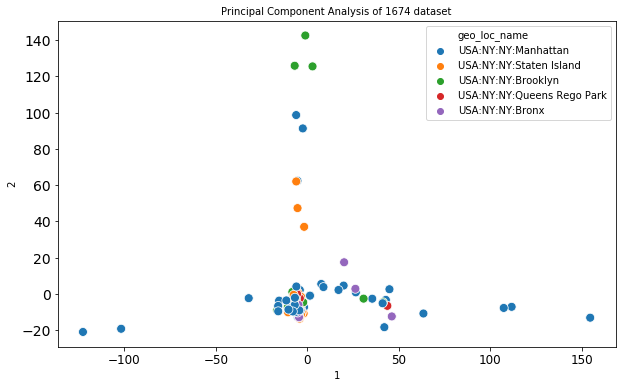

In [42]:
plt.figure()
plt.figure(figsize=(10,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title("Principal Component Analysis of 1674 dataset",fontsize=10)
sns.scatterplot(merged_principal_1674_Df[1],merged_principal_1674_Df[2], 
                data = merged_principal_1674_Df, hue = 'geo_loc_name', s=80)
plt.legend(loc='upper right')

<Figure size 432x288 with 0 Axes>

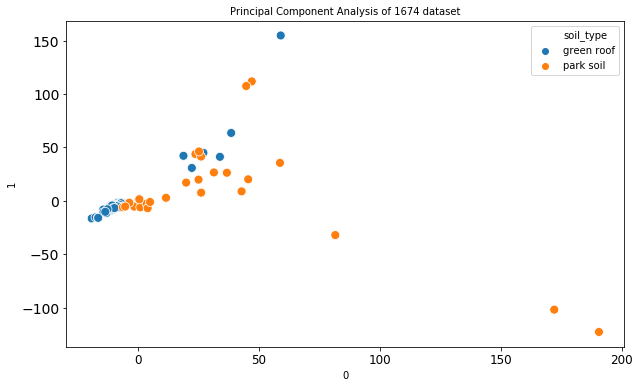

In [43]:
plt.figure()
plt.figure(figsize=(10,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title("Principal Component Analysis of 1674 dataset",fontsize=10)
sns.scatterplot(merged_principal_1674_Df[0],merged_principal_1674_Df[1], 
                data = merged_principal_1674_Df, hue = 'soil_type', s=80)
plt.legend(loc='upper right')

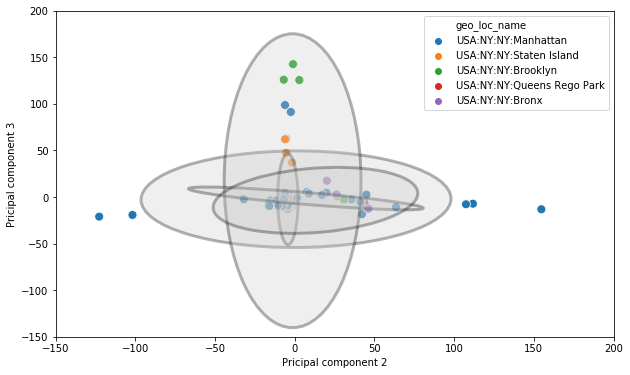

In [44]:
fig, ax = plt.subplots(figsize=(10,6))

geo_loc_name = list(merged_principal_1674_Df['geo_loc_name'].unique())
sns.scatterplot(merged_principal_1674_Df[1],merged_principal_1674_Df[2], 
                data = merged_principal_1674_Df, hue = 'geo_loc_name', s=80)
for category in geo_loc_name:
    sdata = merged_principal_1674_Df[merged_principal_1674_Df['geo_loc_name']==category]
    x_mean = np.mean(sdata[1])
    y_mean = np.mean(sdata[2])
    cov = np.cov(sdata[1], sdata[2])
    color = np.random.rand(3,)
    e = get_cov_ellipse(cov, (x_mean, y_mean), 3, fc='#CCCCCC', lw=3, alpha=0.3, ec = '#000000')
    ax.add_artist(e)

ax.set_xlim(-150, 200)
ax.set_ylim(-150, 200)
ax.set_xlabel('Pricipal component 2')
ax.set_ylabel('Pricipal component 3')
ax.legend(loc='upper right')

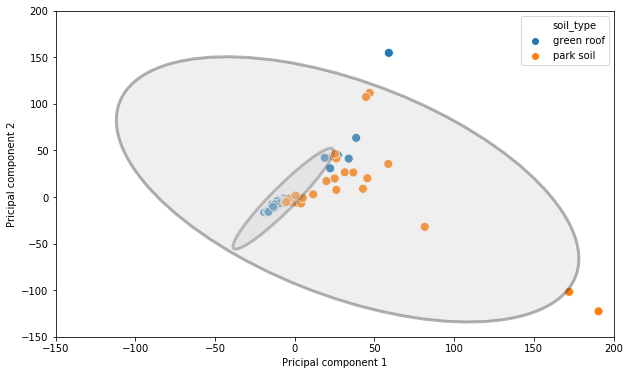

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
soil_type = list(merged_principal_1674_Df['soil_type'].unique())
sns.scatterplot(merged_principal_1674_Df[0],merged_principal_1674_Df[1], 
                data = merged_principal_1674_Df, hue = 'soil_type', s=80)
for category in soil_type:
    sdata = merged_principal_1674_Df[merged_principal_1674_Df['soil_type']==category]
    x_mean = np.mean(sdata[0])
    y_mean = np.mean(sdata[1])
    cov = np.cov(sdata[0], sdata[1])
    color = np.random.rand(3,)
    e = get_cov_ellipse(cov, (x_mean, y_mean), 3, fc='#CCCCCC', lw=3, alpha=0.3, ec = '#000000')
    ax.add_artist(e)

ax.set_xlim(-150, 200)
ax.set_ylim(-150, 200)
ax.set_xlabel('Pricipal component 1')
ax.set_ylabel('Pricipal component 2')
ax.legend(loc='upper right')

### DiCoDa embedding Results (Study 1674)

In [46]:
dicoda_embedding_log_1674 = pd.read_csv('1674_z_1_log_ratio.csv', 
                                              names=rel_feature_table_1674.index)
dicoda_embedding_topo_1674 = pd.read_csv('1674_z_1_topology.csv', 
                                             names=rel_feature_table_1674.index)
dicoda_embedding_log_1674['#SampleID'] = rel_feature_table_1674.columns
dicoda_embedding_topo_1674['#SampleID'] = rel_feature_table_1674.columns
dicoda_embedding_log_1674_category = pd.merge(dicoda_embedding_log_1674,
                                              category_metadata_1674, on='#SampleID')
dicoda_embedding_topo_1674_category = pd.merge(dicoda_embedding_topo_1674,
                                               category_metadata_1674, on='#SampleID')

In [47]:
dicoda_embedding_log_1674_category.set_index('#SampleID', inplace=True)
dicoda_embedding_topo_1674_category.set_index('#SampleID', inplace=True)
dicoda_embedding_log_1674_category.head()

pca_1674_dicoda_embedding_log = PCA(n_components=5)
pca_1674_dicoda_embedding_topo = PCA(n_components=5)
pc_1674_dicoda_embedding_log = pca_1674_dicoda_embedding_log.fit_transform(dicoda_embedding_log_1674_category.drop(['roof_park_name', 'Description', 'geo_loc_name', 'longitude', 'latitude', 'plant_community', 'soil_type'], axis=1))
pc_1674_dicoda_embedding_topo = pca_1674_dicoda_embedding_topo.fit_transform(dicoda_embedding_topo_1674_category.drop(['roof_park_name', 'Description', 'geo_loc_name', 'longitude', 'latitude', 'plant_community', 'soil_type'], axis=1))

pc_1674_dicoda_embedding_log_df = pd.DataFrame(data = pc_1674_dicoda_embedding_log)
merged_pc_1674_dicoda_embedding_log_df = pd.merge(pc_1674_dicoda_embedding_log_df,category_metadata_1674, left_index=True, right_index=True)
pc_1674_dicoda_embedding_topo_df = pd.DataFrame(data = pc_1674_dicoda_embedding_topo)
merged_pc_1674_dicoda_embedding_topo_df = pd.merge(pc_1674_dicoda_embedding_topo_df,category_metadata_1674, left_index=True, right_index=True)
merged_pc_1674_dicoda_embedding_log_df.set_index('#SampleID', inplace=True)
merged_pc_1674_dicoda_embedding_topo_df.set_index('#SampleID', inplace=True)
print(pca_1674_dicoda_embedding_log.explained_variance_ratio_, pca_1674_dicoda_embedding_topo.explained_variance_ratio_)

[0.02954268 0.02181173 0.01651823 0.0149625  0.01421369] [0.05366535 0.02842352 0.01965203 0.01645228 0.01425256]


##### Silhouette score after DiCoDa embedding (different metadata categories)

In [58]:
print(silhouette_score(pc_1674_dicoda_embedding_log_df[[3,4]], 
                       rel_abundance_with_category_1674['geo_loc_name'], metric='euclidean', 
                       sample_size=None))
print(silhouette_score(pc_1674_dicoda_embedding_topo_df[[3,4]], 
                       rel_abundance_with_category_1674['geo_loc_name'], metric='euclidean', 
                       sample_size=None))

-0.20775844367353324
-0.15224322444394334


In [69]:
print(silhouette_score(pc_1674_dicoda_embedding_log_df[[3,4]], 
                       rel_abundance_with_category_1674['soil_type'], metric='euclidean', 
                       sample_size=None))
print(silhouette_score(pc_1674_dicoda_embedding_topo_df[[3,4]], 
                       rel_abundance_with_category_1674['soil_type'], metric='euclidean', 
                       sample_size=None))

-0.028614674445581686
0.02598368752544803


##### PCA Plots for different metadata categories after DiCoDa embedding (principal components with best silhouette score taken as x-y axis)

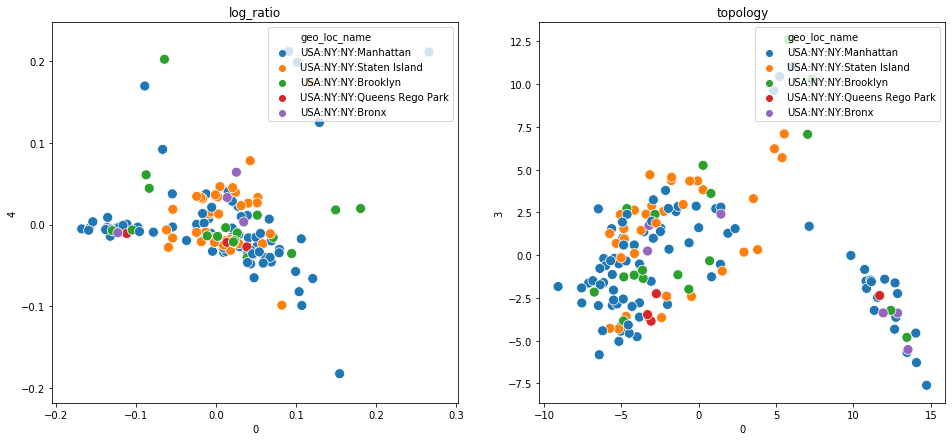

In [73]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].set_title('log_ratio')
sns.scatterplot(x=merged_pc_1674_dicoda_embedding_log_df[0], 
                y=merged_pc_1674_dicoda_embedding_log_df[4], 
                data = merged_pc_1674_dicoda_embedding_log_df, hue='geo_loc_name', 
                ax=axes[0], s=100)
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_1674_dicoda_embedding_topo_df[0], 
                y=merged_pc_1674_dicoda_embedding_topo_df[3], 
                data = merged_pc_1674_dicoda_embedding_topo_df, hue='geo_loc_name', 
                ax=axes[1], s=100)
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')

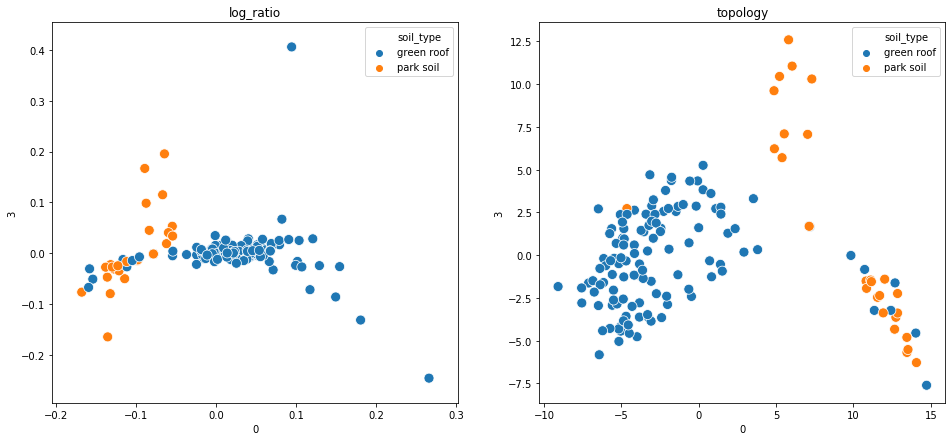

In [74]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].set_title('log_ratio')
sns.scatterplot(x=merged_pc_1674_dicoda_embedding_log_df[0], 
                y=merged_pc_1674_dicoda_embedding_log_df[3], 
                data = merged_pc_1674_dicoda_embedding_log_df, hue='soil_type', 
                ax=axes[0], s=100)
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_1674_dicoda_embedding_topo_df[0], 
                y=merged_pc_1674_dicoda_embedding_topo_df[3], 
                data = merged_pc_1674_dicoda_embedding_topo_df, hue='soil_type', 
                ax=axes[1], s=100)
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')

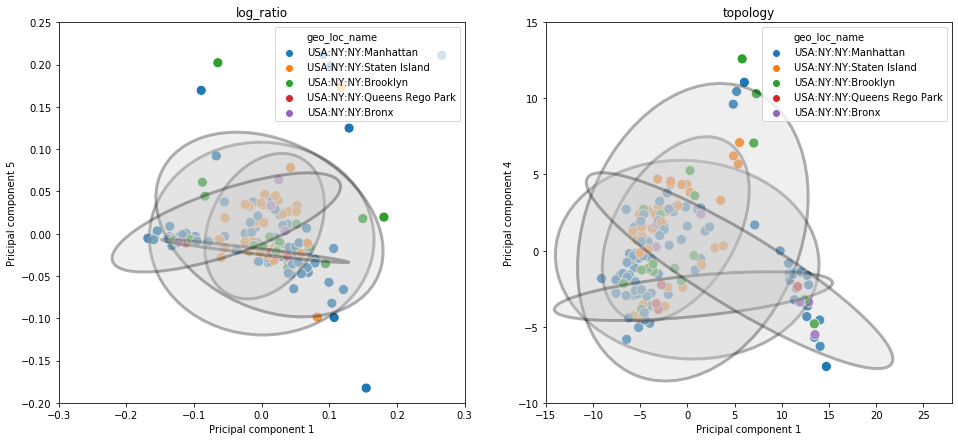

In [83]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
geo_loc_name = list(merged_pc_1674_dicoda_embedding_log_df['geo_loc_name'].unique())
axes[0].set_title('log_ratio')
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_1674_dicoda_embedding_log_df[0], 
                y=merged_pc_1674_dicoda_embedding_log_df[4], 
                data = merged_pc_1674_dicoda_embedding_log_df, 
                hue='geo_loc_name', ax=axes[0], s=100)
sns.scatterplot(x=merged_pc_1674_dicoda_embedding_topo_df[0], 
                y=merged_pc_1674_dicoda_embedding_topo_df[3], 
                data = merged_pc_1674_dicoda_embedding_topo_df, 
                hue='geo_loc_name', ax=axes[1], s=100)
for category in geo_loc_name:
    log_data = merged_pc_1674_dicoda_embedding_log_df[merged_pc_1674_dicoda_embedding_log_df['geo_loc_name']==category]
    topo_data = merged_pc_1674_dicoda_embedding_topo_df[merged_pc_1674_dicoda_embedding_topo_df['geo_loc_name']==category]
    log_pc1_mean = np.mean(log_data[0])
    log_pc2_mean = np.mean(log_data[4])
    topo_pc1_mean = np.mean(topo_data[0])
    topo_pc2_mean = np.mean(topo_data[3])
    log_cov = np.cov(log_data[0], log_data[4])
    topo_cov = np.cov(topo_data[0], topo_data[3])
    log_e = get_cov_ellipse(log_cov, (log_pc1_mean, log_pc2_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha=0.3)
    topo_e = get_cov_ellipse(topo_cov, (topo_pc1_mean, topo_pc2_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha=0.3)
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)

axes[0].set_xlim(-0.3, 0.3)
axes[0].set_ylim(-0.2, 0.25)
axes[1].set_xlim(-15, 28)
axes[1].set_ylim(-10, 15)

axes[0].set_xlabel('Pricipal component 1')
axes[0].set_ylabel('Pricipal component 5')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 1')
axes[1].set_ylabel('Pricipal component 4')
axes[1].legend(loc='upper right', scatterpoints=1)

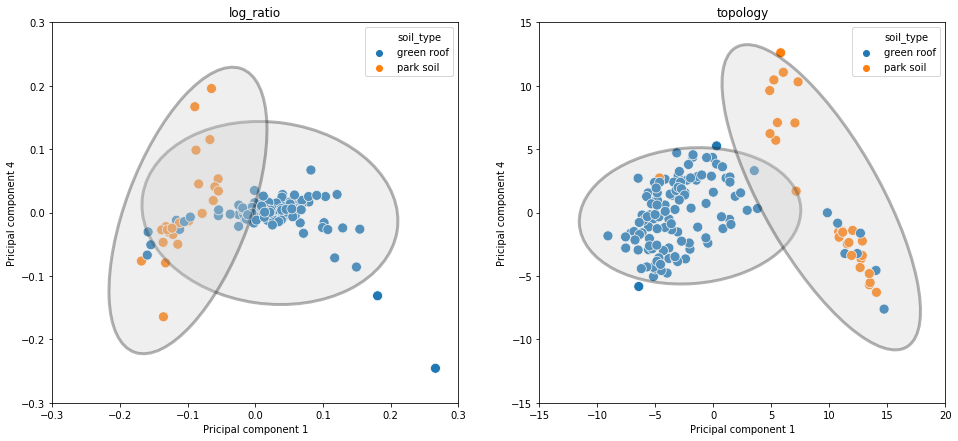

In [89]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
soil_type = list(merged_pc_1674_dicoda_embedding_log_df['soil_type'].unique())
axes[0].set_title('log_ratio')
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_1674_dicoda_embedding_log_df[0], 
                y=merged_pc_1674_dicoda_embedding_log_df[3], 
                data = merged_pc_1674_dicoda_embedding_log_df, 
                hue='soil_type', ax=axes[0], s=100)
sns.scatterplot(x=merged_pc_1674_dicoda_embedding_topo_df[0], 
                y=merged_pc_1674_dicoda_embedding_topo_df[3], 
                data = merged_pc_1674_dicoda_embedding_topo_df, 
                hue='soil_type', ax=axes[1], s=100)
for category in soil_type:
    log_data = merged_pc_1674_dicoda_embedding_log_df[merged_pc_1674_dicoda_embedding_log_df['soil_type']==category]
    topo_data = merged_pc_1674_dicoda_embedding_topo_df[merged_pc_1674_dicoda_embedding_topo_df['soil_type']==category]
    log_pc1_mean = np.mean(log_data[0])
    log_pc2_mean = np.mean(log_data[3])
    topo_pc1_mean = np.mean(topo_data[0])
    topo_pc2_mean = np.mean(topo_data[3])
    log_cov = np.cov(log_data[0], log_data[3])
    topo_cov = np.cov(topo_data[0], topo_data[3])
    log_e = get_cov_ellipse(log_cov, (log_pc1_mean, log_pc2_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha=0.3)
    topo_e = get_cov_ellipse(topo_cov, (topo_pc1_mean, topo_pc2_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha=0.3)
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)

axes[0].set_xlim(-0.3, 0.3)
axes[0].set_ylim(-0.3, 0.3)
axes[1].set_xlim(-15, 20)
axes[1].set_ylim(-15, 15)

axes[0].set_xlabel('Pricipal component 1')
axes[0].set_ylabel('Pricipal component 4')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 1')
axes[1].set_ylabel('Pricipal component 4')
axes[1].legend(loc='upper right', scatterpoints=1)

## Study 1041 EMP

In [90]:
import pandas as pd
rel_feature_table_1041 = pd.read_csv('1041-rel-feature-table.tsv', sep='\t')
rel_feature_table_1041.set_index('#OTU ID', inplace=True)
rel_feature_table_1041.head()

1041.M028.10  1041.M028.100  \
#OTU ID                                                         
ec65e53e15427b35050b18856fa2f139      0.136529       0.138766   
5e034a9ada2c176a66ca1ac6ac8d74c8      0.078762       0.057835   
c9c610d91aeae3995f247fb1dec5c6ff      0.010816       0.005978   
a7f0ed34c2694d74c40e88c75696b7d8      0.043148       0.045841   
27876e23bb1763c292ce5ab9e1f1fc87      0.018795       0.022998   

                                  1041.M028.10m.off.bottom  1041.M028.20  \
#OTU ID                                                                    
ec65e53e15427b35050b18856fa2f139                  0.140891      0.187354   
5e034a9ada2c176a66ca1ac6ac8d74c8                  0.061371      0.049870   
c9c610d91aeae3995f247fb1dec5c6ff                  0.009125      0.005692   
a7f0ed34c2694d74c40e88c75696b7d8                  0.038239      0.044978   
27876e23bb1763c292ce5ab9e1f1fc87                  0.016014      0.019285   

                                  1041.M028.2m.off.bottom  1041.M028.5  \
#OTU ID                                                                  
ec65e53e15427b35050b18856fa2f139                 0.123489     0.143564   
5e034a9ada2c176a66ca1ac6ac8d74c8                 0.081305     0.062130   
c9c610d91aeae3995f247fb1dec5c6ff                 0.010417     0.007471   
a7f0ed34c2694d74c40e88c75696b7d8                 0.044225     0.041227   
27876e23bb1763c292ce5ab9e1f1fc87                 0.016366     0.013836   

                                  1041.M028.50  1041.M041.10  1041.M041.100  \
#OTU ID                                                                       
ec65e53e15427b35050b18856fa2f139      0.155012      0.152260       0.211450   
5e034a9ada2c176a66ca1ac6ac8d74c8      0.059704      0.121896       0.103402   
c9c610d91aeae3995f247fb1dec5c6ff      0.007867      0.024928       0.017384   
a7f0ed34c2694d74c40e88c75696b7d8      0.050607      0.030536       0.021752   
27876e23bb1763c292ce5ab9e1f1fc87      0.019159      0.008697       0.015082   

                                  1041.M041.10m.off.bottom  ...  1041.S114.10  \
#OTU ID                                                     ...                 
ec65e53e15427b35050b18856fa2f139                  0.193450  ...      0.119440   
5e034a9ada2c176a66ca1ac6ac8d74c8                  0.123274  ...      0.048213   
c9c610d91aeae3995f247fb1dec5c6ff                  0.020877  ...      0.072721   
a7f0ed34c2694d74c40e88c75696b7d8                  0.025627  ...      0.033458   
27876e23bb1763c292ce5ab9e1f1fc87                  0.012695  ...      0.032993   

                                  1041.S114.100  1041.S114.150  1041.S114.20  \
#OTU ID                                                                        
ec65e53e15427b35050b18856fa2f139       0.168611       0.082488      0.096693   
5e034a9ada2c176a66ca1ac6ac8d74c8       0.069793       0.054072      0.067527   
c9c610d91aeae3995f247fb1dec5c6ff       0.062325       0.049598      0.055094   
a7f0ed34c2694d74c40e88c75696b7d8       0.036352       0.040859      0.031941   
27876e23bb1763c292ce5ab9e1f1fc87       0.029185       0.034499      0.031394   

                                  1041.S114.200  1041.S114.250  1041.S114.300  \
#OTU ID                                                                         
ec65e53e15427b35050b18856fa2f139       0.124688       0.103173       0.079899   
5e034a9ada2c176a66ca1ac6ac8d74c8       0.050578       0.048783       0.055619   
c9c610d91aeae3995f247fb1dec5c6ff       0.045891       0.075482       0.054917   
a7f0ed34c2694d74c40e88c75696b7d8       0.036314       0.034879       0.037802   
27876e23bb1763c292ce5ab9e1f1fc87       0.025497       0.026457       0.032502   

                                  1041.S114.365  1041.S114.5  1041.S114.50  
#OTU ID                                                                     
ec65e53e15427b35050b18856fa2f139       0.098838     0.175877      0.107734  
5e034a9ada2c176a66ca1ac6ac8d74c8       0.048

In [91]:
metadata_1041 = pd.read_csv('1041_mapping_file.txt', sep='\t')
metadata_1041.head()

#SampleID BarcodeSequence   LinkerPrimerSequence  \
0               1041.M028.5    GGCACACCCTTA  GTGTGCCAGCMGCCGCGGTAA   
1              1041.M028.10    GTCCAGCTATGA  GTGTGCCAGCMGCCGCGGTAA   
2              1041.M041.10    GATCAACCCACA  GTGTGCCAGCMGCCGCGGTAA   
3  1041.M041.10m.off.bottom    TTATCCAGTCCT  GTGTGCCAGCMGCCGCGGTAA   
4               1041.S008.5    CGTCCGTATGAA  GTGTGCCAGCMGCCGCGGTAA   

  center_name                  center_project_name  \
0         ANL  Rockne_GreatLakesmicrobialdiversity   
1         ANL  Rockne_GreatLakesmicrobialdiversity   
2         ANL  Rockne_GreatLakesmicrobialdiversity   
3         ANL  Rockne_GreatLakesmicrobialdiversity   
4         ANL  Rockne_GreatLakesmicrobialdiversity   

                       experiment_design_description illumina_technology  \
0  Microbial diversity analysis at different dept...               HiSeq   
1  Microbial diversity analysis at different dept...               HiSeq   
2  Microbial diversity analysis at different dept...               HiSeq   
3  Microbial diversity analysis at different dept...               HiSeq   
4  Microbial diversity analysis at different dept...               HiSeq   

      instrument_model library_construction_protocol linker  ...  \
0  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol     GT  ...   
1  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol     GT  ...   
2  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol     GT  ...   
3  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol     GT  ...   
4  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol     GT  ...   

  samp_store_dur sample_scientific_name sample_taxid  sample_type  \
0       6 months  freshwater metagenome       449393  fresh water   
1       6 months  freshwater metagenome       449393  fresh water   
2       6 months  freshwater metagenome       449393  fresh water   
3       6 months  freshwater metagenome       449393  fresh water   
4       6 months  freshwater metagenome       449393  fresh water   

         scientific_name spar_surface_irradiance    temp temperature_deg_c  \
0  freshwater metagenome                 1380.00  3.5298            3.5298   
1  freshwater metagenome                 1390.00  3.5449            3.5449   
2  freshwater metagenome                    1.97  3.5808            3.5808   
3  freshwater metagenome                    1.97  3.5318            3.5318   
4  freshwater metagenome                 1870.00  2.8119            2.8119   

                   title                              Description  
0  Great Lake Microbiome               Filtered lake water M028.5  
1  Great Lake Microbiome              Filtered lake water M028.10  
2  Great Lake Microbiome              Filtered lake water M041.10  
3  Great Lake Microbiome  Filtered lake water M041.10m.off.bottom  
4  Great Lake Microbiome               Filtered lake water S008.5  

[5 rows x 79 columns]

In [92]:
rel_feature_table_1041_transpose = rel_feature_table_1041.transpose()
rel_feature_table_1041_transpose.reset_index(inplace=True)
rel_feature_table_1041_transpose.head()

#OTU ID                     index  ec65e53e15427b35050b18856fa2f139  \
0                    1041.M028.10                          0.136529   
1                   1041.M028.100                          0.138766   
2        1041.M028.10m.off.bottom                          0.140891   
3                    1041.M028.20                          0.187354   
4         1041.M028.2m.off.bottom                          0.123489   

#OTU ID  5e034a9ada2c176a66ca1ac6ac8d74c8  c9c610d91aeae3995f247fb1dec5c6ff  \
0                                0.078762                          0.010816   
1                                0.057835                          0.005978   
2                                0.061371                          0.009125   
3                                0.049870                          0.005692   
4                                0.081305                          0.010417   

#OTU ID  a7f0ed34c2694d74c40e88c75696b7d8  27876e23bb1763c292ce5ab9e1f1fc87  \
0                                0.043148                          0.018795   
1                                0.045841                          0.022998   
2                                0.038239                          0.016014   
3                                0.044978                          0.019285   
4                                0.044225                          0.016366   

#OTU ID  812352c932f739d2f4e5ee0bcbe1988b  11041309666bece56a926956c8f33678  \
0                                0.004229                          0.018338   
1                                0.006929                          0.012470   
2                                0.005291                          0.018199   
3                                0.003386                          0.013423   
4                                0.005002                          0.016632   

#OTU ID  ce462b206102332fe233d79794eefcb9  721780ca8920406834a7209cd7747446  \
0                                0.005992                          0.056811   
1                                0.003241                          0.082988   
2                                0.005790                          0.058981   
3                                0.002075                          0.097542   
4                                0.005765                          0.052205   

#OTU ID  ...  400265201972aacdd95c63d3368e925e  \
0        ...                               0.0   
1        ...                               0.0   
2        ...                               0.0   
3        ...                               0.0   
4        ...                               0.0   

#OTU ID  5a150375729f90be18fa16c2488b5c84  96aa2dc52583abf833a682ee9f5fbf88  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  6638d474edf9b94c0a3bcd08eef633a6  c1c210a38f0189fa23ba7786b7185008  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  667bbecc2456f9428142c8d0e02d68e0  916ac5347cd788806f6697f42ba5dce4  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                          

In [93]:
category_metadata_1041 = metadata_1041[['#SampleID', 'collection_timestamp', 'depth']]
category_metadata_1041.head()

#SampleID collection_timestamp  depth
0               1041.M028.5           2011-05-23    5.0
1              1041.M028.10           2011-05-23   10.0
2              1041.M041.10           2011-05-24   10.0
3  1041.M041.10m.off.bottom           2011-05-24    NaN
4               1041.S008.5           2011-05-25    5.0

In [94]:
rel_abundance_with_category_1041 = pd.merge(rel_feature_table_1041_transpose,category_metadata_1041, left_on = 'index', right_on='#SampleID')
rel_abundance_with_category_1041.set_index('#SampleID',inplace=True)
rel_abundance_with_category_1041.drop('index',axis=1, inplace=True)
rel_abundance_with_category_1041.head()

ec65e53e15427b35050b18856fa2f139  \
#SampleID                                                    
1041.M028.10                                      0.136529   
1041.M028.100                                     0.138766   
1041.M028.10m.off.bottom                          0.140891   
1041.M028.20                                      0.187354   
1041.M028.2m.off.bottom                           0.123489   

                          5e034a9ada2c176a66ca1ac6ac8d74c8  \
#SampleID                                                    
1041.M028.10                                      0.078762   
1041.M028.100                                     0.057835   
1041.M028.10m.off.bottom                          0.061371   
1041.M028.20                                      0.049870   
1041.M028.2m.off.bottom                           0.081305   

                          c9c610d91aeae3995f247fb1dec5c6ff  \
#SampleID                                                    
1041.M028.10                                      0.010816   
1041.M028.100                                     0.005978   
1041.M028.10m.off.bottom                          0.009125   
1041.M028.20                                      0.005692   
1041.M028.2m.off.bottom                           0.010417   

                          a7f0ed34c2694d74c40e88c75696b7d8  \
#SampleID                                                    
1041.M028.10                                      0.043148   
1041.M028.100                                     0.045841   
1041.M028.10m.off.bottom                          0.038239   
1041.M028.20                                      0.044978   
1041.M028.2m.off.bottom                           0.044225   

                          27876e23bb1763c292ce5ab9e1f1fc87  \
#SampleID                                                    
1041.M028.10                                      0.018795   
1041.M028.100                                     0.022998   
1041.M028.10m.off.bottom                          0.016014   
1041.M028.20                                      0.019285   
1041.M028.2m.off.bottom                           0.016366   

                          812352c932f739d2f4e5ee0bcbe1988b  \
#SampleID                                                    
1041.M028.10                                      0.004229   
1041.M028.100                                     0.006929   
1041.M028.10m.off.bottom                          0.005291   
1041.M028.20                                      0.003386   
1041.M028.2m.off.bottom                           0.005002   

                          11041309666bece56a926956c8f33678  \
#SampleID                                                    
1041.M028.10                                      0.018338   
1041.M028.100                                     0.012470   
1041.M028.10m.off.bottom                          0.018199   
1041.M028.20                                      0.013423   
1041.M028.2m.off.bottom                           0.016632   

                          ce462b206102332fe233d79794eefcb9  \
#SampleID                                                    
1041.M028.10                                      0.005992   
1041.M028.100                                     0.003241   
1041.M028.10m.off.bottom                          0.005790   
1041.M028.20                                      0.002075   
1041.M028.2m.off.bottom                           0.005765   

                          721780ca8920406834a7209cd7747446  \
#SampleID                                                    
1041.M028.10                                      0.056811   
1041.M028.100                                     0.082988   
1041.M028.10m.off.bottom                          0.058981   
1041.M028.20                                      0.097542   
1041.M028.2m.off.bottom                           0.052205   

                          b6a2d8f963b9a927215f9180634e321b  ...  \
#SampleID                                   

In [95]:
from sklearn.preprocessing import StandardScaler

all_columns = rel_abundance_with_category_1041.columns
features = np.array(all_columns[0:len(all_columns)-2])
x_1041 = rel_abundance_with_category_1041.loc[:, features].values
scaled_x_1041 = StandardScaler().fit_transform(x_1041)
scaled_x_1041.shape

(49, 4797)

In [96]:
np.mean(scaled_x_1041), np.std(scaled_x_1041)
from sklearn.decomposition import PCA
pca_1041 = PCA(n_components=5)
principalComponents_1041 = pca_1041.fit_transform(scaled_x_1041)
principal_1041_Df = pd.DataFrame(data = principalComponents_1041)
merged_principal_1041_Df = pd.merge(principal_1041_Df,category_metadata_1041, 
                                    left_index=True, right_index=True)

#### Dataframe modified to drop rows with NaN in depth column and new column based on depth

In [99]:
def depth_range(depth):
    if int(depth) <= 100:
        return 'Less than 100'
    elif int(depth) > 100:
        return 'Greater than 100'
merged_principal_1041_Df_Modified = merged_principal_1041_Df.dropna(subset=['depth'])
merged_principal_1041_Df_Modified['depth_range'] = [depth_range(x) for x in merged_principal_1041_Df_Modified['depth']]
merged_principal_1041_Df_Modified.head()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0          1          2          3          4      #SampleID  \
0 -15.714134  19.336459  -2.266332   5.426865 -13.919639    1041.M028.5   
1 -16.915523  20.704485  -0.098010   2.202037 -25.871773   1041.M028.10   
2 -17.736562  26.017602  -2.840360   3.151610 -36.488273   1041.M041.10   
4 -24.147055  44.935143 -36.490099  70.379711  37.257418    1041.S008.5   
6 -19.483587  28.841107  -0.452797   3.378612 -38.067085  1041.S019.150   

  collection_timestamp  depth       depth_range  
0           2011-05-23    5.0     Less than 100  
1           2011-05-23   10.0     Less than 100  
2           2011-05-24   10.0     Less than 100  
4           2011-05-25    5.0     Less than 100  
6           2011-05-26  150.0  Greater than 100

#### Silhouette values for different metadata categories (Different Combinations of principal components checked)

In [70]:
silhouette_score(principal_1041_Df[[3,4]], rel_abundance_with_category_1041['collection_timestamp'], 
                       metric='euclidean', sample_size=None)

-0.0512940991976139

In [109]:
silhouette_score(merged_principal_1041_Df_Modified[[3,4]], 
                 merged_principal_1041_Df_Modified['depth_range'], metric='euclidean', 
                 sample_size=None)

-0.14707081610559536

In [110]:
pca_1041.explained_variance_ratio_

array([0.08312587, 0.06737806, 0.04310469, 0.04213222, 0.03416157])

#### PCA plots of different metadata categories (principal components with best silhouette score taken as x-y axis)

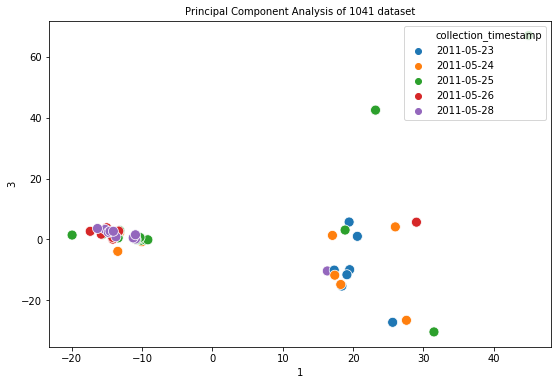

In [84]:
fig, ax = plt.subplots(figsize=(9,6))
plt.title("Principal Component Analysis of 1041 dataset",fontsize=10)
sns.scatterplot(merged_principal_1041_Df[1],merged_principal_1041_Df[3], 
                data = merged_principal_1041_Df, hue = 'collection_timestamp', s=100)
plt.legend(loc='upper right')

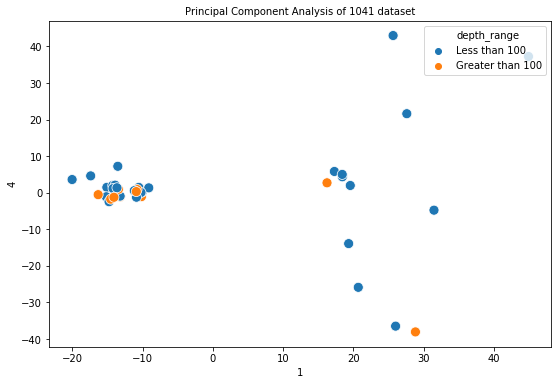

In [111]:
fig, ax = plt.subplots(figsize=(9,6))
plt.title("Principal Component Analysis of 1041 dataset",fontsize=10)
sns.scatterplot(merged_principal_1041_Df_Modified[1],merged_principal_1041_Df_Modified[4], 
                data = merged_principal_1041_Df_Modified, hue = 'depth_range', s=100)
plt.legend(loc='upper right')

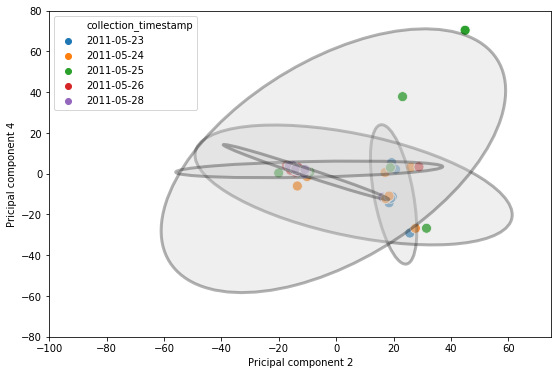

In [114]:
fig, ax = plt.subplots(figsize=(9,6))
collection_timestamp = list(merged_principal_1041_Df['collection_timestamp'].unique())

sns.scatterplot(merged_principal_1041_Df[1],merged_principal_1041_Df[3], 
                data = merged_principal_1041_Df, hue = 'collection_timestamp', s=100)

for category in collection_timestamp:
    sdata = merged_principal_1041_Df[merged_principal_1041_Df['collection_timestamp']==category]
    pc1_mean = np.mean(sdata[1])
    pc2_mean = np.mean(sdata[3])
    #print(pc1_mean, pc2_mean)
    cov = np.cov(sdata[1], sdata[3])
    color = np.random.rand(3,)
    e = get_cov_ellipse(cov, (pc1_mean, pc2_mean), 3, edgecolor='#000000', facecolor='#CCCCCC',
                       linewidth=3.0, alpha=0.3)
    ax.add_artist(e)
    
ax.set_xlim(-100, 75)
ax.set_ylim(-80, 80)
ax.set_xlabel('Pricipal component 2')
ax.set_ylabel('Pricipal component 4')
ax.legend(loc='upper left', scatterpoints=1)
plt.show()

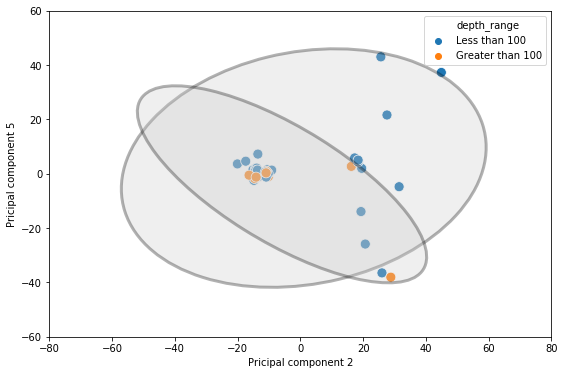

In [117]:
fig, ax = plt.subplots(figsize=(9,6))
depth_range = list(merged_principal_1041_Df_Modified['depth_range'].unique())

sns.scatterplot(merged_principal_1041_Df_Modified[1],merged_principal_1041_Df_Modified[4], 
                data = merged_principal_1041_Df_Modified, hue = 'depth_range', s=100)

for category in depth_range:
    sdata = merged_principal_1041_Df_Modified[merged_principal_1041_Df_Modified['depth_range']==category]
    x_mean = np.mean(sdata[1])
    y_mean = np.mean(sdata[4])
    cov = np.cov(sdata[1], sdata[4])
    e = get_cov_ellipse(cov, (x_mean, y_mean), 3, edgecolor='#000000', facecolor='#CCCCCC',
                       linewidth=3.0, alpha=0.3)
    ax.add_artist(e)
    
ax.set_xlim(-80, 80)
ax.set_ylim(-60, 60)
ax.set_xlabel('Pricipal component 2')
ax.set_ylabel('Pricipal component 5')
ax.legend(loc='upper right')
plt.show()

### DiCoDa embedding Results (Study 1041)

In [141]:
dicoda_embedding_log_1041 = pd.read_csv('1041_z_1_log_ratio.csv', 
                                              names=rel_feature_table_1041.index)
dicoda_embedding_topo_1041 = pd.read_csv('1041_z_1_topology.csv', 
                                             names=rel_feature_table_1041.index)
dicoda_embedding_log_1041['#SampleID'] = rel_feature_table_1041.columns
dicoda_embedding_topo_1041['#SampleID'] = rel_feature_table_1041.columns
dicoda_embedding_log_1041_category = pd.merge(dicoda_embedding_log_1041,
                                              category_metadata_1041, on='#SampleID')
dicoda_embedding_topo_1041_category = pd.merge(dicoda_embedding_topo_1041,
                                               category_metadata_1041, on='#SampleID')

In [142]:
def depth_range_1(depth):
    if int(depth) <= 100:
        return 'Less than 100'
    elif int(depth) > 100:
        return 'Greater than 100'
    
dicoda_embedding_log_1041_category.set_index('#SampleID', inplace=True)
dicoda_embedding_topo_1041_category.set_index('#SampleID', inplace=True)
dicoda_embedding_log_1041_category.head()

pca_1041_dicoda_embedding_log = PCA(n_components=5)
pca_1041_dicoda_embedding_topo = PCA(n_components=5)
pc_1041_dicoda_embedding_log = pca_1041_dicoda_embedding_log.fit_transform(dicoda_embedding_log_1041_category.drop(['collection_timestamp', 'depth'], axis=1))
pc_1041_dicoda_embedding_topo = pca_1041_dicoda_embedding_topo.fit_transform(dicoda_embedding_topo_1041_category.drop(['collection_timestamp', 'depth'], axis=1))


pc_1041_dicoda_embedding_log_df = pd.DataFrame(data = pc_1041_dicoda_embedding_log)
merged_pc_1041_dicoda_embedding_log_df = pd.merge(pc_1041_dicoda_embedding_log_df,category_metadata_1041, left_index=True, right_index=True)
pc_1041_dicoda_embedding_topo_df = pd.DataFrame(data = pc_1041_dicoda_embedding_topo)
merged_pc_1041_dicoda_embedding_topo_df = pd.merge(pc_1041_dicoda_embedding_topo_df,category_metadata_1041, left_index=True, right_index=True)
merged_pc_1041_dicoda_embedding_log_df.set_index('#SampleID', inplace=True)
merged_pc_1041_dicoda_embedding_topo_df.set_index('#SampleID', inplace=True)

merged_pc_1041_dicoda_embedding_log_df_Modified = merged_pc_1041_dicoda_embedding_log_df.dropna(subset=['depth'])
merged_pc_1041_dicoda_embedding_topo_df_Modified = merged_pc_1041_dicoda_embedding_topo_df.dropna(subset=['depth'])

merged_pc_1041_dicoda_embedding_log_df_Modified['depth_range'] = [depth_range_1(x) for x in merged_pc_1041_dicoda_embedding_log_df_Modified['depth']]
merged_pc_1041_dicoda_embedding_topo_df_Modified['depth_range'] = [depth_range_1(x) for x in merged_pc_1041_dicoda_embedding_topo_df_Modified['depth']]

print(pca_1041_dicoda_embedding_log.explained_variance_ratio_, pca_1041_dicoda_embedding_topo.explained_variance_ratio_)

[0.11052206 0.06920724 0.04179118 0.03964425 0.03375548] [0.17685615 0.06161046 0.03959523 0.0319812  0.02816226]


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### Silhouette value of different metadata categories after using DiCoDa embedding

In [110]:
print(silhouette_score(pc_1041_dicoda_embedding_log_df[[3,4]], 
                       rel_abundance_with_category_1041['collection_timestamp'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(pc_1041_dicoda_embedding_topo_df[[3,4]], 
                       rel_abundance_with_category_1041['collection_timestamp'], 
                       metric='euclidean', sample_size=None))

-0.08606168588502112 0.02555803483609373


In [152]:
print(silhouette_score(merged_pc_1041_dicoda_embedding_log_df_Modified[[3,4]], 
                       merged_pc_1041_dicoda_embedding_log_df_Modified['depth_range'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(merged_pc_1041_dicoda_embedding_topo_df_Modified[[3,4]], 
                       merged_pc_1041_dicoda_embedding_topo_df_Modified['depth_range'], 
                       metric='euclidean', sample_size=None))

-0.16107503598779813 -0.06189592030252374


#### PCA plots for different metadata categories after DiCoDa embedding

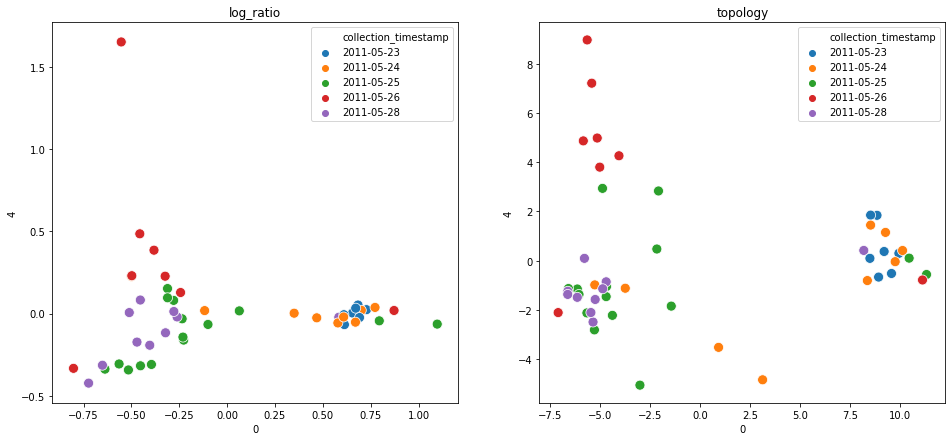

In [154]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].set_title('log_ratio')
sns.scatterplot(x=merged_pc_1041_dicoda_embedding_log_df[0], 
                y=merged_pc_1041_dicoda_embedding_log_df[4], 
                data = merged_pc_1041_dicoda_embedding_log_df, hue='collection_timestamp', 
                ax=axes[0], s=100)
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_1041_dicoda_embedding_topo_df[0], 
                y=merged_pc_1041_dicoda_embedding_topo_df[4], 
                data = merged_pc_1041_dicoda_embedding_topo_df, hue='collection_timestamp', 
                ax=axes[1], s=100)

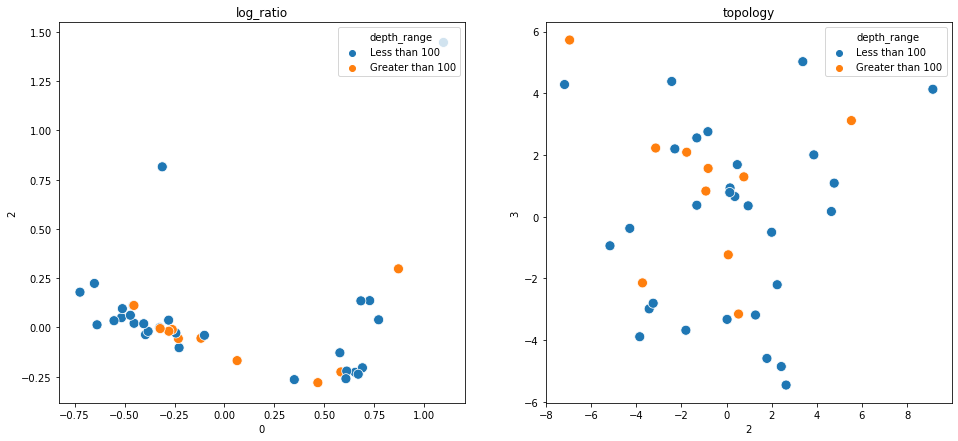

In [156]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].set_title('log_ratio')
sns.scatterplot(x=merged_pc_1041_dicoda_embedding_log_df_Modified[0], 
                y=merged_pc_1041_dicoda_embedding_log_df_Modified[2], 
                data = merged_pc_1041_dicoda_embedding_log_df_Modified, hue='depth_range', 
                ax=axes[0], s=100)
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_1041_dicoda_embedding_topo_df_Modified[2], 
                y=merged_pc_1041_dicoda_embedding_topo_df_Modified[3], 
                data = merged_pc_1041_dicoda_embedding_topo_df_Modified, hue='depth_range', 
                ax=axes[1], s=100)
axes[0].legend(loc='upper right')

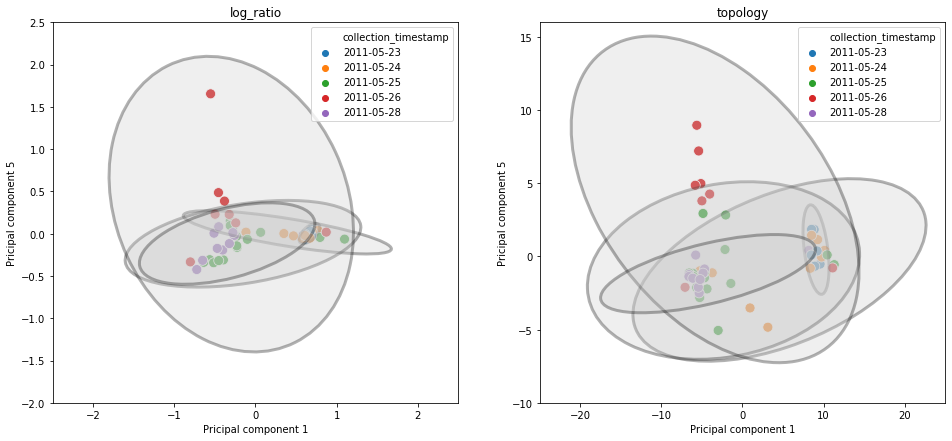

In [157]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
collection_timestamp = list(merged_pc_1041_dicoda_embedding_log_df['collection_timestamp'].unique())
labels = collection_timestamp
axes[0].set_title('log_ratio')
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_1041_dicoda_embedding_log_df[0], 
                y=merged_pc_1041_dicoda_embedding_log_df[4], 
                data = merged_pc_1041_dicoda_embedding_log_df, hue='collection_timestamp', ax=axes[0], 
                s=100)
sns.scatterplot(x=merged_pc_1041_dicoda_embedding_topo_df[0], 
                y=merged_pc_1041_dicoda_embedding_topo_df[4], 
                data = merged_pc_1041_dicoda_embedding_topo_df, hue='collection_timestamp', ax=axes[1], 
                s=100)
for category in collection_timestamp:
    log_data = merged_pc_1041_dicoda_embedding_log_df[merged_pc_1041_dicoda_embedding_log_df['collection_timestamp']==category]
    topo_data = merged_pc_1041_dicoda_embedding_topo_df[merged_pc_1041_dicoda_embedding_topo_df['collection_timestamp']==category]
    log_x_mean = np.mean(log_data[0])
    log_y_mean = np.mean(log_data[4])
    topo_x_mean = np.mean(topo_data[0])
    topo_y_mean = np.mean(topo_data[4])
    log_cov = np.cov(log_data[0], log_data[4])
    topo_cov = np.cov(topo_data[0], topo_data[4])

    log_e = get_cov_ellipse(log_cov, (log_x_mean, log_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    topo_e = get_cov_ellipse(topo_cov, (topo_x_mean, topo_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)

axes[0].set_xlim(-2.5, 2.5)
axes[0].set_ylim(-2, 2.5)
axes[1].set_xlim(-25, 25)
axes[1].set_ylim(-10, 16)

axes[0].set_xlabel('Pricipal component 1')
axes[0].set_ylabel('Pricipal component 5')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 1')
axes[1].set_ylabel('Pricipal component 5')
axes[1].legend(loc='upper right', scatterpoints=1)

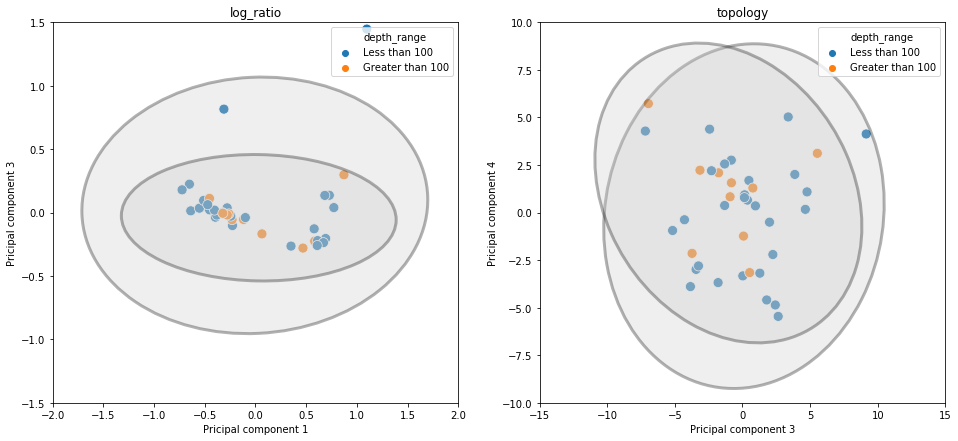

In [160]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
depth_range = list(merged_pc_1041_dicoda_embedding_log_df_Modified['depth_range'].unique())
labels = depth_range
axes[0].set_title('log_ratio')
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_1041_dicoda_embedding_log_df_Modified[0], 
                y=merged_pc_1041_dicoda_embedding_log_df_Modified[2], 
                data = merged_pc_1041_dicoda_embedding_log_df_Modified, hue='depth_range', 
                ax=axes[0], s=100)
sns.scatterplot(x=merged_pc_1041_dicoda_embedding_topo_df_Modified[2], 
                y=merged_pc_1041_dicoda_embedding_topo_df_Modified[3], 
                data = merged_pc_1041_dicoda_embedding_topo_df_Modified, hue='depth_range', 
                ax=axes[1], s=100)
for category in depth_range:
    log_data = merged_pc_1041_dicoda_embedding_log_df_Modified[merged_pc_1041_dicoda_embedding_log_df_Modified['depth_range']==category]
    topo_data = merged_pc_1041_dicoda_embedding_topo_df_Modified[merged_pc_1041_dicoda_embedding_topo_df_Modified['depth_range']==category]
    log_x_mean = np.mean(log_data[0])
    log_y_mean = np.mean(log_data[2])
    topo_x_mean = np.mean(topo_data[2])
    topo_y_mean = np.mean(topo_data[3])
    log_cov = np.cov(log_data[0], log_data[2])
    topo_cov = np.cov(topo_data[2], topo_data[3])

    log_e = get_cov_ellipse(log_cov, (log_x_mean, log_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    topo_e = get_cov_ellipse(topo_cov, (topo_x_mean, topo_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)

axes[0].set_xlim(-2, 2)
axes[0].set_ylim(-1.5, 1.5)
axes[1].set_xlim(-15, 15)
axes[1].set_ylim(-10, 10)

axes[0].set_xlabel('Pricipal component 1')
axes[0].set_ylabel('Pricipal component 3')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 3')
axes[1].set_ylabel('Pricipal component 4')
axes[1].legend(loc='upper right', scatterpoints=1)

## Study 2080 EMP

In [161]:
import pandas as pd
rel_feature_table_2080 = pd.read_csv('2080-rel-feature-table.tsv', sep='\t')
rel_feature_table_2080.set_index('#OTU ID', inplace=True)
rel_feature_table_2080.head()

2080.S16D2165  2080.S16D40  2080.S16D4611  \
#OTU ID                                                                       
2f80980eb77ae5369075aa0b127be74a       0.304310     0.034600       0.071180   
953ec5a9b78e897fc2aad9734d7a7972       0.035428     0.027518       0.010178   
d588c5e361aca6c5853b6372d668343d       0.009624     0.000000       0.000000   
9af2d1b921c255c00dbe6e21b67ff5a7       0.000000     0.204131       0.000464   
b5106330fdfe2c83e0c80a9b37465df8       0.003034     0.000000       0.001923   

                                  2080.S16D765  2080.S16D90  2080.S24D2085  \
#OTU ID                                                                      
2f80980eb77ae5369075aa0b127be74a      0.144620     0.064656       0.122290   
953ec5a9b78e897fc2aad9734d7a7972      0.034146     0.012083       0.080219   
d588c5e361aca6c5853b6372d668343d      0.000000     0.000000       0.012919   
9af2d1b921c255c00dbe6e21b67ff5a7      0.000300     0.000000       0.000000   
b5106330fdfe2c83e0c80a9b37465df8      0.054853     0.000000       0.003551   

                                  2080.S24D35  2080.S24D365  2080.S24D4898  \
#OTU ID                                                                      
2f80980eb77ae5369075aa0b127be74a     0.013854      0.113325       0.087390   
953ec5a9b78e897fc2aad9734d7a7972     0.004595      0.019964       0.009538   
d588c5e361aca6c5853b6372d668343d     0.000415      0.003376       0.000000   
9af2d1b921c255c00dbe6e21b67ff5a7     0.160891      0.000367       0.000528   
b5106330fdfe2c83e0c80a9b37465df8     0.000000      0.063672       0.006798   

                                  2080.S24D85  ...  2080.S63D435  \
#OTU ID                                        ...                 
2f80980eb77ae5369075aa0b127be74a     0.068432  ...      0.148580   
953ec5a9b78e897fc2aad9734d7a7972     0.017820  ...      0.035967   
d588c5e361aca6c5853b6372d668343d     0.000824  ...      0.018422   
9af2d1b921c255c00dbe6e21b67ff5a7     0.000000  ...      0.000000   
b5106330fdfe2c83e0c80a9b37465df8     0.000000  ...      0.055039   

                                  2080.S63D60.85  2080.S71D2500  \
#OTU ID                                                           
2f80980eb77ae5369075aa0b127be74a        0.018193       0.033670   
953ec5a9b78e897fc2aad9734d7a7972        0.016458       0.186285   
d588c5e361aca6c5853b6372d668343d        0.003284       0.014404   
9af2d1b921c255c00dbe6e21b67ff5a7        0.000000       0.000000   
b5106330fdfe2c83e0c80a9b37465df8        0.018525       0.001359   

                                  2080.S71D350.400  2080.S71D4336  \
#OTU ID                                                             
2f80980eb77ae5369075aa0b127be74a          0.065075       0.199545   
953ec5a9b78e897fc2aad9734d7a7972          0.018017       0.061035   
d588c5e361aca6c5853b6372d668343d          0.012158       0.130391   
9af2d1b921c255c00dbe6e21b67ff5a7          0.000000       0.000000   
b5106330fdfe2c83e0c80a9b37465df8          0.119787       0.005096   

                                  2080.S71D62  2080.S79D240  2080.S79D5  \
#OTU ID                                                                   
2f80980eb77ae5369075aa0b127be74a     0.052483      0.049899    0.006303   
953ec5a9b78e897fc2aad9734d7a7972     0.007116      0.013234    0.002737   
d588c5e361aca6c5853b6372d668343d     0.007008      0.029536    0.001168   
9af2d1b921c255c00dbe6e21b67ff5a7     0.000000      0.000000    0.000000   
b5106330fdfe2c83e0c80a9b37465df8     0.051809      0.191235    0.023922   

                                  2080.S79D740  2080.S79D97  
#OTU ID                                                      
2f80980eb77ae5369075aa0b127be74a      0.084966     0.006449  
953ec5a9b78e897fc2aad9734d7a7972      0.085912     0.047483  
d588c5e361aca6c5853b6372d668343d      0.006088     0.009089  
9af2d1b921c255c00dbe6e21b67ff5a7      0.000000     0.000000  
b5106330fdfe2c83e0c80a9b37465df8      0.070810     0.1667

In [162]:
metadata_2080 = pd.read_csv('2080_mapping_file.txt', sep='\t')
metadata_2080.head()

#SampleID BarcodeSequence   LinkerPrimerSequence center_name  \
0  2080.S16D2165    GATCATTCTCTC  GTGTGCCAGCMGCCGCGGTAA         ANL   
1    2080.S16D40    ATTATCGTCCCT  GTGTGCCAGCMGCCGCGGTAA         ANL   
2  2080.S16D4611    TCTGAGGTTGCC  GTGTGCCAGCMGCCGCGGTAA         ANL   
3   2080.S16D765    AGACATACCGTA  GTGTGCCAGCMGCCGCGGTAA         ANL   
4    2080.S16D90    GATCCTCATGCG  GTGTGCCAGCMGCCGCGGTAA         ANL   

                  center_project_name  \
0  Seyler_North_Atlantic_water_column   
1  Seyler_North_Atlantic_water_column   
2  Seyler_North_Atlantic_water_column   
3  Seyler_North_Atlantic_water_column   
4  Seyler_North_Atlantic_water_column   

                       experiment_design_description illumina_technology  \
0  In April-May 2012, we participated in a resear...               MiSeq   
1  In April-May 2012, we participated in a resear...               MiSeq   
2  In April-May 2012, we participated in a resear...               MiSeq   
3  In April-May 2012, we participated in a resear...               MiSeq   
4  In April-May 2012, we participated in a resear...               MiSeq   

      instrument_model library_construction_protocol linker  ... silicate  \
0  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol     GT  ...    16.65   
1  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol     GT  ...     0.49   
2  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol     GT  ...    44.75   
3  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol     GT  ...    24.99   
4  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol     GT  ...     1.90   

  silicate_range     temp  temp_range temperature_deg_c  \
0          16.65   3.4789      3.4789            3.4789   
1           0.49  27.5977     27.5977           27.5977   
2          44.75   2.1390       2.139            2.1390   
3          24.99   6.0080       6.008            6.0080   
4            1.9  24.6294     24.6294           24.6294   

                                title tot_carb tot_carb_range  \
0  Seyler_North_Atlantic_water_column   2161.0           2161   
1  Seyler_North_Atlantic_water_column   2017.2         2017.2   
2  Seyler_North_Atlantic_water_column   2189.0           2189   
3  Seyler_North_Atlantic_water_column   2219.9         2219.9   
4  Seyler_North_Atlantic_water_column   2083.0           2083   

  tot_depth_water_col                        Description  
0                4625  S16D2165 0.2um filtered sea water  
1                4625    S16D40 0.2um filtered sea water  
2                4625  S16D4611 0.2um filtered sea water  
3                4625   S16D765 0.2um filtered sea water  
4                4625    S16D90 0.2um filtered sea water  

[5 rows x 94 columns]

In [163]:
rel_feature_table_2080_transpose = rel_feature_table_2080.transpose()
rel_feature_table_2080_transpose.reset_index(inplace=True)
rel_feature_table_2080_transpose.head()

#OTU ID          index  2f80980eb77ae5369075aa0b127be74a  \
0        2080.S16D2165                          0.304310   
1          2080.S16D40                          0.034600   
2        2080.S16D4611                          0.071180   
3         2080.S16D765                          0.144620   
4          2080.S16D90                          0.064656   

#OTU ID  953ec5a9b78e897fc2aad9734d7a7972  d588c5e361aca6c5853b6372d668343d  \
0                                0.035428                          0.009624   
1                                0.027518                          0.000000   
2                                0.010178                          0.000000   
3                                0.034146                          0.000000   
4                                0.012083                          0.000000   

#OTU ID  9af2d1b921c255c00dbe6e21b67ff5a7  b5106330fdfe2c83e0c80a9b37465df8  \
0                                0.000000                          0.003034   
1                                0.204131                          0.000000   
2                                0.000464                          0.001923   
3                                0.000300                          0.054853   
4                                0.000000                          0.000000   

#OTU ID  0364841e30b0a2f78df7f6ac7dfa740d  2993ee81a46c4564f7c589027be55520  \
0                                0.076295                          0.008229   
1                                0.000000                          0.002361   
2                                0.067599                          0.005305   
3                                0.057221                          0.015939   
4                                0.000000                          0.007026   

#OTU ID  d8a411e0b99818bc8dcb8a989b8f03af  6fee021cf468e0067229e9eff1878da5  \
0                                0.000000                          0.004184   
1                                0.000000                          0.000000   
2                                0.000000                          0.010708   
3                                0.000967                          0.002234   
4                                0.000000                          0.001151   

#OTU ID  ...  793daef695cb93b3be328465c60fb65b  \
0        ...                               0.0   
1        ...                               0.0   
2        ...                               0.0   
3        ...                               0.0   
4        ...                               0.0   

#OTU ID  2c0e0a0b2ef426de41071059df496929  31036482fa699e0e514dae89d56d88e4  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  dc2883e50b8c6251ac093c204eac1bf1  ea2c719a56fefe146aa4aaf6efe4cc4c  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  362b6fff5c334c85f5d99c4c7166612e  1078184c3182f8917e724c9a3aedd77e  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  6f33

In [165]:
category_metadata_2080 = metadata_2080[['#SampleID', 'env_feature', 'depth', 'latitude', 'tot_depth_water_col']]
category_metadata_2080.head()

#SampleID          env_feature depth  latitude  tot_depth_water_col
0  2080.S16D2165  abyssalpelagic zone  2165     8.767                 4625
1    2080.S16D40          photic zone    40     8.767                 4625
2  2080.S16D4611  abyssalpelagic zone  4611     8.767                 4625
3   2080.S16D765    bathypelagic zone   765     8.767                 4625
4    2080.S16D90          photic zone    90     8.767                 4625

In [166]:
rel_abundance_with_category_2080 = pd.merge(rel_feature_table_2080_transpose,category_metadata_2080, left_on = 'index', right_on='#SampleID')
rel_abundance_with_category_2080.set_index('#SampleID',inplace=True)
rel_abundance_with_category_2080.drop('index',axis=1, inplace=True)
rel_abundance_with_category_2080.head()

2f80980eb77ae5369075aa0b127be74a  \
#SampleID                                         
2080.S16D2165                          0.304310   
2080.S16D40                            0.034600   
2080.S16D4611                          0.071180   
2080.S16D765                           0.144620   
2080.S16D90                            0.064656   

               953ec5a9b78e897fc2aad9734d7a7972  \
#SampleID                                         
2080.S16D2165                          0.035428   
2080.S16D40                            0.027518   
2080.S16D4611                          0.010178   
2080.S16D765                           0.034146   
2080.S16D90                            0.012083   

               d588c5e361aca6c5853b6372d668343d  \
#SampleID                                         
2080.S16D2165                          0.009624   
2080.S16D40                            0.000000   
2080.S16D4611                          0.000000   
2080.S16D765                           0.000000   
2080.S16D90                            0.000000   

               9af2d1b921c255c00dbe6e21b67ff5a7  \
#SampleID                                         
2080.S16D2165                          0.000000   
2080.S16D40                            0.204131   
2080.S16D4611                          0.000464   
2080.S16D765                           0.000300   
2080.S16D90                            0.000000   

               b5106330fdfe2c83e0c80a9b37465df8  \
#SampleID                                         
2080.S16D2165                          0.003034   
2080.S16D40                            0.000000   
2080.S16D4611                          0.001923   
2080.S16D765                           0.054853   
2080.S16D90                            0.000000   

               0364841e30b0a2f78df7f6ac7dfa740d  \
#SampleID                                         
2080.S16D2165                          0.076295   
2080.S16D40                            0.000000   
2080.S16D4611                          0.067599   
2080.S16D765                           0.057221   
2080.S16D90                            0.000000   

               2993ee81a46c4564f7c589027be55520  \
#SampleID                                         
2080.S16D2165                          0.008229   
2080.S16D40                            0.002361   
2080.S16D4611                          0.005305   
2080.S16D765                           0.015939   
2080.S16D90                            0.007026   

               d8a411e0b99818bc8dcb8a989b8f03af  \
#SampleID                                         
2080.S16D2165                          0.000000   
2080.S16D40                            0.000000   
2080.S16D4611                          0.000000   
2080.S16D765                           0.000967   
2080.S16D90                            0.000000   

               6fee021cf468e0067229e9eff1878da5  \
#SampleID                                         
2080.S16D2165                          0.004184   
2080.S16D40                            0.000000   
2080.S16D4611                          0.010708   
2080.S16D765                           0.002234   
2080.S16D90                            0.001151   

               09fc0204f283937a3a329591f65700a2  ...  \
#SampleID                                        ...   
2080.S16D2165                               0.0  ...   
2080.S16D40                                 0.0  ...   
2080.S16D4611                               0.0  ...   
2080.S16D765                                0.0  ...   
2080.S16D90                                 0.0  ...   

               ea2c719a56fefe146aa4aaf6efe4cc4c  \
#SampleID                                         
2080.S16D2165                               0.0   
2080.S16D40                                 0.0   
2080.S16D4611                               0.0   
2080.S16D765                                0.0   
2080.S16D90                                 0.0   

               362b6fff5c334c85f5d99c4c716

In [167]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
all_columns = rel_abundance_with_category_2080.columns
features = np.array(all_columns[0:len(all_columns)-4])
x_2080 = rel_abundance_with_category_2080.loc[:, features].values
scaled_x_2080 = StandardScaler().fit_transform(x_2080)
scaled_x_2080.shape

(55, 8345)

In [168]:
np.mean(scaled_x_2080), np.std(scaled_x_2080)
from sklearn.decomposition import PCA
pca_2080 = PCA(n_components=5)
principalComponents_2080 = pca_2080.fit_transform(scaled_x_2080)

principal_2080_Df = pd.DataFrame(data = principalComponents_2080)
merged_principal_2080_Df = pd.merge(principal_2080_Df,category_metadata_2080, left_index=True, right_index=True)
merged_principal_2080_Df.head()

0          1          2          3          4      #SampleID  \
0  25.996691   0.938438  -6.656680  43.314098  -2.906766  2080.S16D2165   
1  -7.603092  12.011744 -10.772489  -8.273553 -13.144449    2080.S16D40   
2  74.539783  19.479817  57.601751 -28.794141  -9.207334  2080.S16D4611   
3   3.410831  -9.074537  -5.889171   7.682266  18.865781   2080.S16D765   
4 -53.740163  64.607175  57.308654  27.031375  27.994719    2080.S16D90   

           env_feature depth  latitude  tot_depth_water_col  
0  abyssalpelagic zone  2165     8.767                 4625  
1          photic zone    40     8.767                 4625  
2  abyssalpelagic zone  4611     8.767                 4625  
3    bathypelagic zone   765     8.767                 4625  
4          photic zone    90     8.767                 4625

#### Silhouette values for different metadata categories (Different Combinations of principal components checked)

In [182]:
silhouette_score(principal_2080_Df[[3,4]], rel_abundance_with_category_2080['env_feature'], 
                 metric='euclidean', sample_size=None)

-0.12983439603244326

In [207]:
silhouette_score(principal_2080_Df[[3,4]], rel_abundance_with_category_2080['tot_depth_water_col'], 
                 metric='euclidean', sample_size=None)
#Will not use in further PCAs as silhouette score very low and number of unique values large (13)

-0.37831786878543067

In [208]:
pca_2080.explained_variance_ratio_

array([0.04808293, 0.04474953, 0.04034064, 0.03758673, 0.03449047])

#### PCA plots of different metadata categories (principal components with best silhouette score taken as x-y axis)

<Figure size 432x288 with 0 Axes>

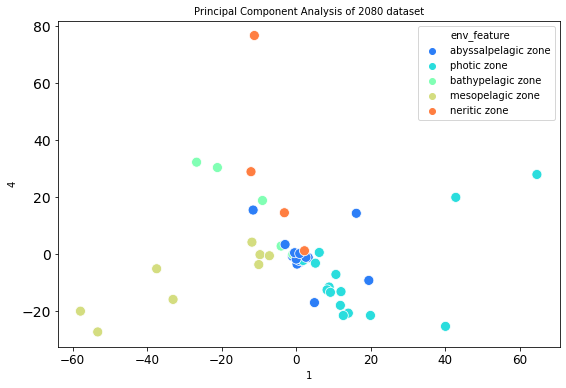

In [209]:
plt.figure()
plt.figure(figsize=(9,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title("Principal Component Analysis of 2080 dataset",fontsize=10)
sns.scatterplot(merged_principal_2080_Df[1],merged_principal_2080_Df[4], 
                data = merged_principal_2080_Df, hue = 'env_feature', palette='rainbow', s=100)
plt.legend(loc='upper right')

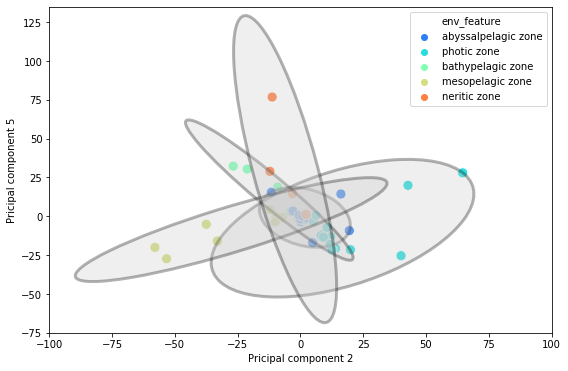

In [212]:
fig, ax = plt.subplots(figsize=(9,6))
env_feature = list(merged_principal_2080_Df['env_feature'].unique())

sns.scatterplot(merged_principal_2080_Df[1],merged_principal_2080_Df[4], 
                data = merged_principal_2080_Df, hue = 'env_feature', palette='rainbow', s=100)

for category in env_feature:
    sdata = merged_principal_2080_Df[merged_principal_2080_Df['env_feature']==category]
    x_mean = np.mean(sdata[1])
    y_mean = np.mean(sdata[4])
    cov = np.cov(sdata[1], sdata[4])
    
    e = get_cov_ellipse(cov, (x_mean, y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    ax.add_artist(e)

ax.set_xlim(-100, 100)
ax.set_ylim(-75, 135)
ax.set_xlabel('Pricipal component 2')
ax.set_ylabel('Pricipal component 5')
ax.legend(loc='upper right', scatterpoints=1)

### DiCoDa embedding Results (Study 2080)

In [216]:
dicoda_embedding_log_2080 = pd.read_csv('2080_z_1_log_ratio.csv', 
                                              names=rel_feature_table_2080.index)
dicoda_embedding_topo_2080 = pd.read_csv('2080_z_1_topology.csv', 
                                             names=rel_feature_table_2080.index)
dicoda_embedding_log_2080['#SampleID'] = rel_feature_table_2080.columns
dicoda_embedding_topo_2080['#SampleID'] = rel_feature_table_2080.columns
dicoda_embedding_log_2080_category = pd.merge(dicoda_embedding_log_2080,
                                              category_metadata_2080, on='#SampleID')
dicoda_embedding_topo_2080_category = pd.merge(dicoda_embedding_topo_2080,
                                               category_metadata_2080, on='#SampleID')

In [217]:
dicoda_embedding_log_2080_category.set_index('#SampleID', inplace=True)
dicoda_embedding_topo_2080_category.set_index('#SampleID', inplace=True)
dicoda_embedding_log_2080_category.head()

pca_2080_dicoda_embedding_log = PCA(n_components=5)
pca_2080_dicoda_embedding_topo = PCA(n_components=5)
pc_2080_dicoda_embedding_log = pca_2080_dicoda_embedding_log.fit_transform(dicoda_embedding_log_2080_category.drop(['env_feature', 'depth', 'latitude', 'tot_depth_water_col'], axis=1))
pc_2080_dicoda_embedding_topo = pca_2080_dicoda_embedding_topo.fit_transform(dicoda_embedding_topo_2080_category.drop(['env_feature', 'depth', 'latitude', 'tot_depth_water_col'], axis=1))

pc_2080_dicoda_embedding_log_df = pd.DataFrame(data = pc_2080_dicoda_embedding_log)
merged_pc_2080_dicoda_embedding_log_df = pd.merge(pc_2080_dicoda_embedding_log_df,category_metadata_2080, left_index=True, right_index=True)
pc_2080_dicoda_embedding_topo_df = pd.DataFrame(data = pc_2080_dicoda_embedding_topo)
merged_pc_2080_dicoda_embedding_topo_df = pd.merge(pc_2080_dicoda_embedding_topo_df,category_metadata_2080, left_index=True, right_index=True)
merged_pc_2080_dicoda_embedding_log_df.set_index('#SampleID', inplace=True)
merged_pc_2080_dicoda_embedding_topo_df.set_index('#SampleID', inplace=True)

print(pca_2080_dicoda_embedding_log.explained_variance_ratio_, pca_2080_dicoda_embedding_topo.explained_variance_ratio_)

[0.0823713  0.07040286 0.0604441  0.05168478 0.04554527] [0.08440834 0.07892134 0.04609189 0.04135092 0.03917262]


#### Silhouette values for metadata category after DiCoDa embedding (Different Combinations of principal components checked)

In [227]:
print(silhouette_score(pc_2080_dicoda_embedding_log_df[[3,4]], 
                       rel_abundance_with_category_2080['env_feature'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(pc_2080_dicoda_embedding_topo_df[[3,4]], 
                       rel_abundance_with_category_2080['env_feature'], 
                       metric='euclidean', sample_size=None))

-0.26411899175983977 -0.18098848896453704


#### PCA plots after DiCoDa embedding

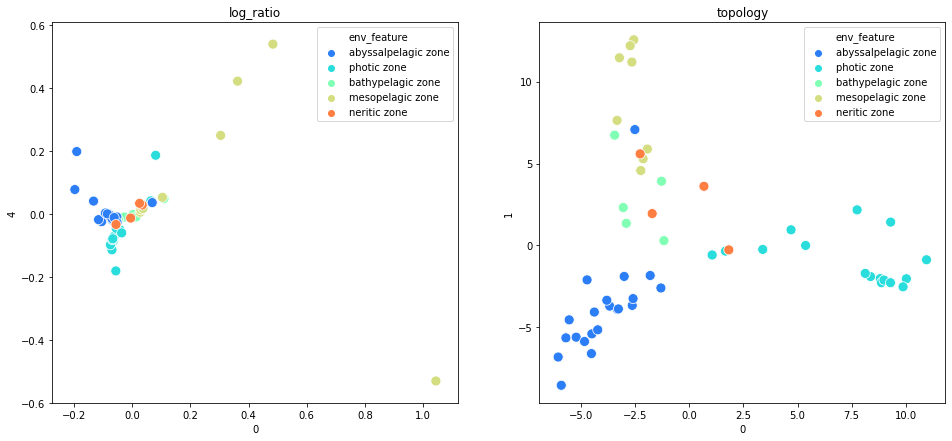

In [228]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].set_title('log_ratio')
sns.scatterplot(x=merged_pc_2080_dicoda_embedding_log_df[0], 
                y=merged_pc_2080_dicoda_embedding_log_df[4], 
                data = merged_pc_2080_dicoda_embedding_log_df, hue='env_feature', 
                ax=axes[0], palette='rainbow', s=100)
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_2080_dicoda_embedding_topo_df[0], 
                y=merged_pc_2080_dicoda_embedding_topo_df[1], 
                data = merged_pc_2080_dicoda_embedding_topo_df, hue='env_feature', 
                ax=axes[1], palette='rainbow', s=100)

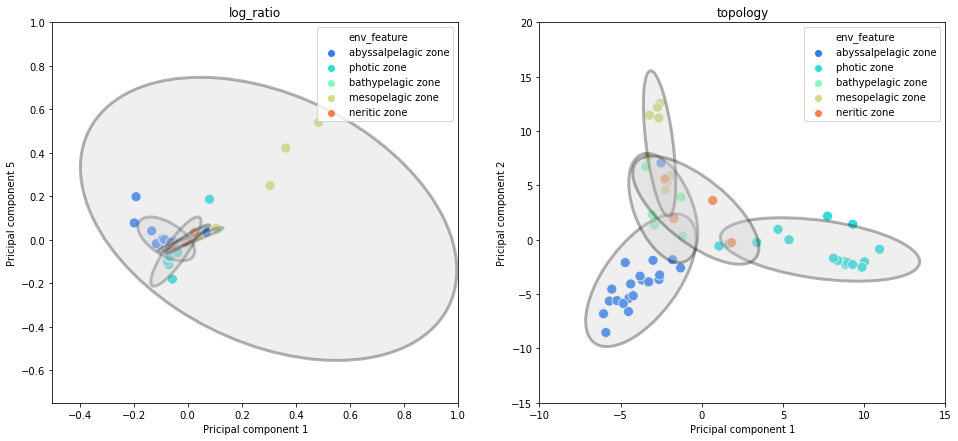

In [231]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
env_feature = list(merged_pc_2080_dicoda_embedding_log_df['env_feature'].unique())

axes[0].set_title('log_ratio')
axes[1].set_title("topology")

for category in env_feature:
    log_data = merged_pc_2080_dicoda_embedding_log_df[merged_pc_2080_dicoda_embedding_log_df['env_feature']==category]
    topo_data = merged_pc_2080_dicoda_embedding_topo_df[merged_pc_2080_dicoda_embedding_topo_df['env_feature']==category]
    log_x_mean = np.mean(log_data[0])
    log_y_mean = np.mean(log_data[4])
    topo_x_mean = np.mean(topo_data[0])
    topo_y_mean = np.mean(topo_data[1])
    
    log_cov = np.cov(log_data[0], log_data[4])
    topo_cov = np.cov(topo_data[0], topo_data[1])
    
    log_e = get_cov_ellipse(log_cov, (log_x_mean, log_y_mean), 2, 
                           fc='#CCCCCC', lw=3, alpha=0.3, zorder=1, ec='#000000')
    topo_e = get_cov_ellipse(topo_cov, (topo_x_mean, topo_y_mean), 2, 
                             fc='#CCCCCC', lw=3, alpha=0.3, zorder=1, ec='#000000')
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)

sns.scatterplot(x=merged_pc_2080_dicoda_embedding_log_df[0], 
                y=merged_pc_2080_dicoda_embedding_log_df[4], 
                data = merged_pc_2080_dicoda_embedding_log_df, hue='env_feature', 
                ax=axes[0], palette='rainbow', s=100)

sns.scatterplot(x=merged_pc_2080_dicoda_embedding_topo_df[0], 
                y=merged_pc_2080_dicoda_embedding_topo_df[1], 
                data = merged_pc_2080_dicoda_embedding_topo_df, hue='env_feature', 
                ax=axes[1], palette='rainbow', s=100)

axes[0].set_xlim(-0.5, 1)
axes[0].set_ylim(-0.75, 1)
axes[1].set_xlim(-10, 15)
axes[1].set_ylim(-15, 20)

axes[0].set_xlabel('Pricipal component 1')
axes[0].set_ylabel('Pricipal component 5')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 1')
axes[1].set_ylabel('Pricipal component 2')
axes[1].legend(loc='upper right', scatterpoints=1)

## STUDY 889 EMP

In [232]:
rel_feature_table_889 = pd.read_csv('889-rel-feature-table.tsv', sep='\t')
rel_feature_table_889.set_index('#OTU ID', inplace=True)
rel_feature_table_889.head()

889.25May.1  889.25May.2  889.25May.3  \
#OTU ID                                                                   
d335da6ae81c9477caaf2805d7b06f6e     0.033455     0.036417     0.029014   
963995d54e10eb17c4fa477ab01ca8f2     0.020350     0.028570     0.039753   
0ec4c6155cd7772258c09cb4bebd84be     0.013773     0.006023     0.000000   
293e3bc035269ee105768b681be3f107     0.018398     0.016799     0.022330   
ab0fb1c9cfae4a48c4e898ddafc41ddc     0.013516     0.016689     0.018276   

                                  889.25May.4  889.26May.1  889.26May.2  \
#OTU ID                                                                   
d335da6ae81c9477caaf2805d7b06f6e     0.011712     0.031369     0.023039   
963995d54e10eb17c4fa477ab01ca8f2     0.013709     0.017478     0.023652   
0ec4c6155cd7772258c09cb4bebd84be     0.000000     0.012240     0.069798   
293e3bc035269ee105768b681be3f107     0.008252     0.013037     0.017722   
ab0fb1c9cfae4a48c4e898ddafc41ddc     0.012444     0.015315     0.013292   

                                  889.26May.3  889.26May.4  
#OTU ID                                                     
d335da6ae81c9477caaf2805d7b06f6e     0.038670     0.010691  
963995d54e10eb17c4fa477ab01ca8f2     0.020771     0.009495  
0ec4c6155cd7772258c09cb4bebd84be     0.030052     0.002990  
293e3bc035269ee105768b681be3f107     0.020882     0.006205  
ab0fb1c9cfae4a48c4e898ddafc41ddc     0.015910     0.013606

In [233]:
metadata_889 = pd.read_csv('889_mapping_file.txt', sep='\t')
metadata_889.head()

#SampleID BarcodeSequence   LinkerPrimerSequence center_name  \
0  889.25May.1    CGATATCAGTAG  GTGTGCCAGCMGCCGCGGTAA         ANL   
1  889.25May.2    TGTGTTACTCCT  GTGTGCCAGCMGCCGCGGTAA         ANL   
2  889.25May.3    TCGCCTATAAGG  GTGTGCCAGCMGCCGCGGTAA         ANL   
3  889.25May.4    TAACCCGATAGA  GTGTGCCAGCMGCCGCGGTAA         ANL   
4  889.26May.1    CATAAGGGAGGC  GTGTGCCAGCMGCCGCGGTAA         ANL   

         center_project_name experiment_design_description  \
0  Rees_VulcanoIsland_MedSea   CO2 effect on phytoplankton   
1  Rees_VulcanoIsland_MedSea   CO2 effect on phytoplankton   
2  Rees_VulcanoIsland_MedSea   CO2 effect on phytoplankton   
3  Rees_VulcanoIsland_MedSea   CO2 effect on phytoplankton   
4  Rees_VulcanoIsland_MedSea   CO2 effect on phytoplankton   

  illumina_technology     instrument_model library_construction_protocol  \
0               HiSeq  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol   
1               HiSeq  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol   
2               HiSeq  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol   
3               HiSeq  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol   
4               HiSeq  Illumina HiSeq 2000   EMP V4 515f,806rbc protocol   

  linker  ... sample_taxid sample_type    scientific_name  silicate   temp  \
0     GT  ...       412755   sea water  marine metagenome     16.95  18.58   
1     GT  ...       412755   sea water  marine metagenome      9.65  18.49   
2     GT  ...       412755   sea water  marine metagenome      2.46  18.44   
3     GT  ...       412755   sea water  marine metagenome      3.34  18.44   
4     GT  ...       412755   sea water  marine metagenome     21.83  19.26   

  temperature_deg_c                       title tot_nitro tot_part_carb  \
0             18.58  Rees_Vulcano_island_MedSea      2.16          9.82   
1             18.49  Rees_Vulcano_island_MedSea      1.88          7.66   
2             18.44  Rees_Vulcano_island_MedSea      1.47          5.06   
3             18.44  Rees_Vulcano_island_MedSea      2.56          8.44   
4             19.26  Rees_Vulcano_island_MedSea      2.56          7.75   

               Description  
0  Sterivex Filter 25May.1  
1  Sterivex Filter 25May.2  
2  Sterivex Filter 25May.3  
3  Sterivex Filter 25May.4  
4  Sterivex Filter 26May.1  

[5 rows x 80 columns]

In [234]:
rel_feature_table_889_transpose = rel_feature_table_889.transpose()
rel_feature_table_889_transpose.reset_index(inplace=True)
rel_feature_table_889_transpose.head()

#OTU ID        index  d335da6ae81c9477caaf2805d7b06f6e  \
0        889.25May.1                          0.033455   
1        889.25May.2                          0.036417   
2        889.25May.3                          0.029014   
3        889.25May.4                          0.011712   
4        889.26May.1                          0.031369   

#OTU ID  963995d54e10eb17c4fa477ab01ca8f2  0ec4c6155cd7772258c09cb4bebd84be  \
0                                0.020350                          0.013773   
1                                0.028570                          0.006023   
2                                0.039753                          0.000000   
3                                0.013709                          0.000000   
4                                0.017478                          0.012240   

#OTU ID  293e3bc035269ee105768b681be3f107  ab0fb1c9cfae4a48c4e898ddafc41ddc  \
0                                0.018398                          0.013516   
1                                0.016799                          0.016689   
2                                0.022330                          0.018276   
3                                0.008252                          0.012444   
4                                0.013037                          0.015315   

#OTU ID  c1b237f82b89140a0157db834a7e42dd  7f33c52589017c676148274b0b97f77f  \
0                                0.015366                          0.005756   
1                                0.022104                          0.007571   
2                                0.018418                          0.014792   
3                                0.010648                          0.018367   
4                                0.010077                          0.007970   

#OTU ID  55d99134142f3b56da1f864c44c9b794  c6fad9835673402308555359d46ab126  \
0                                0.010535                          0.012642   
1                                0.014478                          0.016468   
2                                0.017352                          0.014152   
3                                0.011513                          0.006987   
4                                0.009564                          0.009109   

#OTU ID  ...  0c22b418e6473b03c23367c7d03fc089  \
0        ...                               0.0   
1        ...                               0.0   
2        ...                               0.0   
3        ...                               0.0   
4        ...                               0.0   

#OTU ID  4d56b7cea05f2e868d168b1882ca5c8b  f80a59db4c1510ff36f5a050a78edd8c  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  37b7be89ec0aced816fe0ccad1db7e1e  dc71d981f349b5712d49e415461043e4  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  9cee4b4192ddbf0ffbbb4dfb88f59012  8931bd0ba10e39e2cde537996470a689  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  1f626f3516d2b9a3

In [235]:
category_metadata_889 = metadata_889[['#SampleID', 'latitude', 'collection_timestamp']]
category_metadata_889.head()

#SampleID  latitude collection_timestamp
0  889.25May.1    38.419           2011-05-25
1  889.25May.2    38.419           2011-05-25
2  889.25May.3    38.420           2011-05-25
3  889.25May.4    38.422           2011-05-25
4  889.26May.1    38.419           2011-05-26

In [236]:
rel_abundance_with_category_889 = pd.merge(rel_feature_table_889_transpose,category_metadata_889, left_on = 'index', right_on='#SampleID')
rel_abundance_with_category_889.set_index('#SampleID',inplace=True)
rel_abundance_with_category_889.drop('index',axis=1, inplace=True)
rel_abundance_with_category_889.head()
category_metadata_889.head()

#SampleID  latitude collection_timestamp
0  889.25May.1    38.419           2011-05-25
1  889.25May.2    38.419           2011-05-25
2  889.25May.3    38.420           2011-05-25
3  889.25May.4    38.422           2011-05-25
4  889.26May.1    38.419           2011-05-26

In [237]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
all_columns = rel_abundance_with_category_889.columns
features = np.array(all_columns[0:len(all_columns)-2])
x_889 = rel_abundance_with_category_889.loc[:, features].values
scaled_x_889 = StandardScaler().fit_transform(x_889)
scaled_x_889.shape

(8, 2059)

In [238]:
np.mean(scaled_x_889), np.std(scaled_x_889)
from sklearn.decomposition import PCA
pca_889 = PCA(n_components=5)
principalComponents_889 = pca_889.fit_transform(scaled_x_889)

principal_889_Df = pd.DataFrame(data = principalComponents_889)
merged_principal_889_Df = pd.merge(principal_889_Df,category_metadata_889, left_index=True, right_index=True)
merged_principal_889_Df.head()
#pca_889.explained_variance_ratio_

0          1          2          3          4    #SampleID  \
0  -9.366721  31.265784   1.186452 -15.984041 -28.904036  889.25May.1   
1  -4.066918   8.090353   2.902421  43.832206  -5.486473  889.25May.2   
2 -19.386379 -24.391205  -0.604263  -5.241840  -1.579308  889.25May.3   
3  31.834765  -8.912565  36.520057  -5.475885  -0.774280  889.25May.4   
4  -4.962325  26.429323   0.489000  -6.285858  35.539327  889.26May.1   

   latitude collection_timestamp  
0    38.419           2011-05-25  
1    38.419           2011-05-25  
2    38.420           2011-05-25  
3    38.422           2011-05-25  
4    38.419           2011-05-26

#### Silhouette values for different metadata categories (Different Combinations of principal components checked)

In [241]:
silhouette_score(principal_889_Df[[4,3]], rel_abundance_with_category_889['collection_timestamp'], 
                       metric='euclidean', sample_size=None)

0.01960260423390317

In [242]:
silhouette_score(principal_889_Df[[0,1]], rel_abundance_with_category_889['latitude'], 
                       metric='euclidean', sample_size=None)

0.43380517927333195

#### PCA plots of different metadata categories (principal components with best silhouette score taken as x-y axis)

<Figure size 432x288 with 0 Axes>

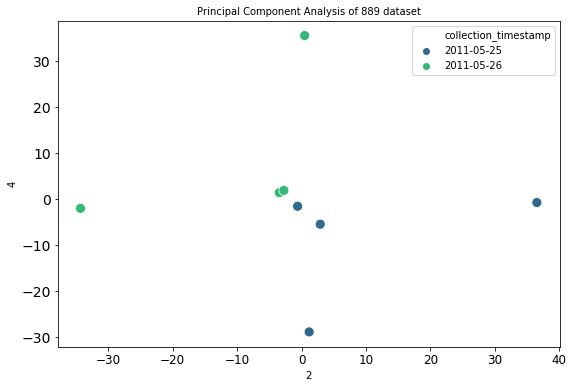

In [243]:
plt.figure()
plt.figure(figsize=(9,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title("Principal Component Analysis of 889 dataset",fontsize=10)
sns.scatterplot(merged_principal_889_Df[2],merged_principal_889_Df[4], 
                data = merged_principal_889_Df, hue = 'collection_timestamp', 
                palette='viridis', s=100)
plt.legend(loc='upper right')

<Figure size 432x288 with 0 Axes>

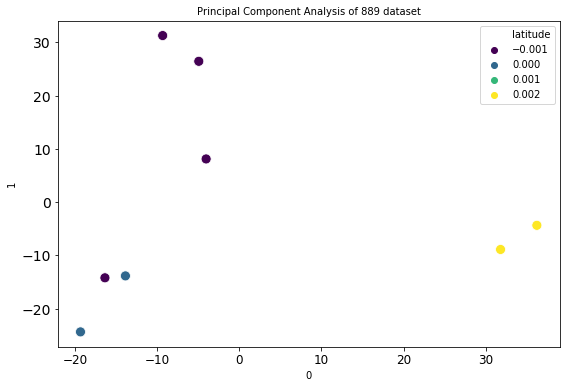

In [244]:
plt.figure()
plt.figure(figsize=(9,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title("Principal Component Analysis of 889 dataset",fontsize=10)
sns.scatterplot(merged_principal_889_Df[0],merged_principal_889_Df[1], 
                data = merged_principal_889_Df, hue = 'latitude', 
                palette='viridis', s=100)
plt.legend(loc='upper right')

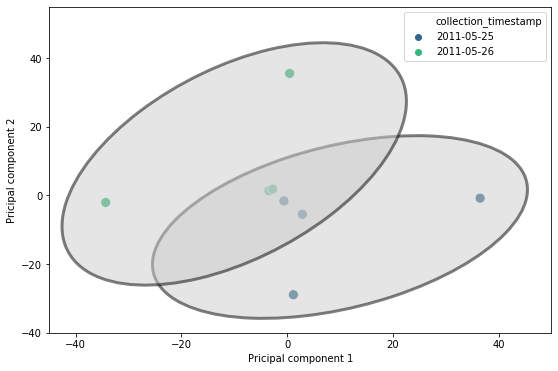

In [247]:
fig, ax = plt.subplots(figsize=(9,6))
collection_timestamp = list(merged_principal_889_Df['collection_timestamp'].unique())

sns.scatterplot(merged_principal_889_Df[2],merged_principal_889_Df[4], 
                data = merged_principal_889_Df, hue = 'collection_timestamp', palette='viridis', s=100)
for category in collection_timestamp:
    sdata = merged_principal_889_Df[merged_principal_889_Df['collection_timestamp']==category]
    x_mean = np.mean(sdata[2])
    y_mean = np.mean(sdata[4])
    cov = np.cov(sdata[2], sdata[4])
    
    e = get_cov_ellipse(cov, (x_mean, y_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.5)
    ax.add_artist(e)

ax.set_xlim(-45, 50)
ax.set_ylim(-40, 55)
ax.set_xlabel('Pricipal component 1')
ax.set_ylabel('Pricipal component 2')
ax.legend(loc='upper right', scatterpoints=1)

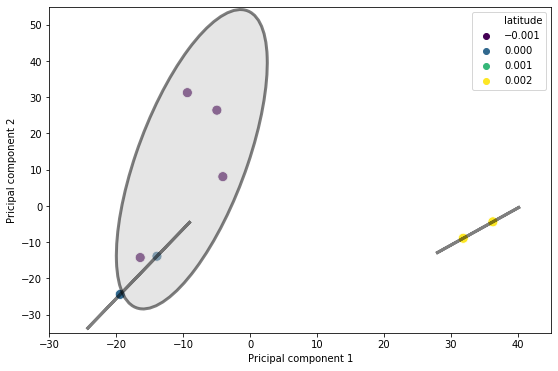

In [248]:
fig, ax = plt.subplots(figsize=(9,6))
latitude = list(merged_principal_889_Df['latitude'].unique())

sns.scatterplot(merged_principal_889_Df[0],merged_principal_889_Df[1], 
                data = merged_principal_889_Df, hue = 'latitude', palette='viridis', s=100)
for category in latitude:
    sdata = merged_principal_889_Df[merged_principal_889_Df['latitude']==category]
    x_mean = np.mean(sdata[0])
    y_mean = np.mean(sdata[1])
    cov = np.cov(sdata[0], sdata[1])
    
    e = get_cov_ellipse(cov, (x_mean, y_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.5)
    ax.add_artist(e)

ax.set_xlim(-30, 45)
ax.set_ylim(-35, 55)
ax.set_xlabel('Pricipal component 1')
ax.set_ylabel('Pricipal component 2')
ax.legend(loc='upper right', scatterpoints=1)

### DiCoDa Embedding Results (Study 889)

In [249]:
dicoda_embedding_log_889 = pd.read_csv('889_z_1_log_ratio.csv', 
                                              names=rel_feature_table_889.index)
dicoda_embedding_topo_889 = pd.read_csv('889_z_1_topology.csv', 
                                             names=rel_feature_table_889.index)
dicoda_embedding_log_889['#SampleID'] = rel_feature_table_889.columns
dicoda_embedding_topo_889['#SampleID'] = rel_feature_table_889.columns
dicoda_embedding_log_889_category = pd.merge(dicoda_embedding_log_889,
                                              category_metadata_889, on='#SampleID')
dicoda_embedding_topo_889_category = pd.merge(dicoda_embedding_topo_889,
                                               category_metadata_889, on='#SampleID')

In [250]:
dicoda_embedding_log_889_category.set_index('#SampleID', inplace=True)
dicoda_embedding_topo_889_category.set_index('#SampleID', inplace=True)
dicoda_embedding_log_889_category.head()

pca_889_dicoda_embedding_log = PCA(n_components=5)
pca_889_dicoda_embedding_topo = PCA(n_components=5)
pc_889_dicoda_embedding_log = pca_889_dicoda_embedding_log.fit_transform(dicoda_embedding_log_889_category.drop(['latitude', 'collection_timestamp'], axis=1))
pc_889_dicoda_embedding_topo = pca_889_dicoda_embedding_topo.fit_transform(dicoda_embedding_topo_889_category.drop(['latitude', 'collection_timestamp'], axis=1))

pc_889_dicoda_embedding_log_df = pd.DataFrame(data = pc_889_dicoda_embedding_log)
merged_pc_889_dicoda_embedding_log_df = pd.merge(pc_889_dicoda_embedding_log_df,category_metadata_889, left_index=True, right_index=True)
pc_889_dicoda_embedding_topo_df = pd.DataFrame(data = pc_889_dicoda_embedding_topo)
merged_pc_889_dicoda_embedding_topo_df = pd.merge(pc_889_dicoda_embedding_topo_df,category_metadata_889, left_index=True, right_index=True)
merged_pc_889_dicoda_embedding_log_df.set_index('#SampleID', inplace=True)
merged_pc_889_dicoda_embedding_topo_df.set_index('#SampleID', inplace=True)
print(pca_889_dicoda_embedding_log.explained_variance_ratio_, pca_889_dicoda_embedding_topo.explained_variance_ratio_)

[0.21409513 0.17445663 0.17023583 0.15209199 0.14584033] [0.19104192 0.17516468 0.15235557 0.14824408 0.13594501]


#### Silouette values for different metadata categories after DiCoDa embedding

In [261]:
print(silhouette_score(pc_889_dicoda_embedding_log_df[[3,4]], 
                       rel_abundance_with_category_889['collection_timestamp'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(pc_889_dicoda_embedding_topo_df[[3,4]], 
                       rel_abundance_with_category_889['collection_timestamp'], 
                       metric='euclidean', sample_size=None))

-0.08812232975814249 0.0051633680636863355


In [272]:
print(silhouette_score(pc_889_dicoda_embedding_log_df[[0,1]], 
                       rel_abundance_with_category_889['latitude'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(pc_889_dicoda_embedding_topo_df[[0,1]], 
                       rel_abundance_with_category_889['latitude'], 
                       metric='euclidean', sample_size=None))

-0.06394306772248062 0.3767698336768774


#### PCA Plots for different metadata categories after DiCoDa embedding

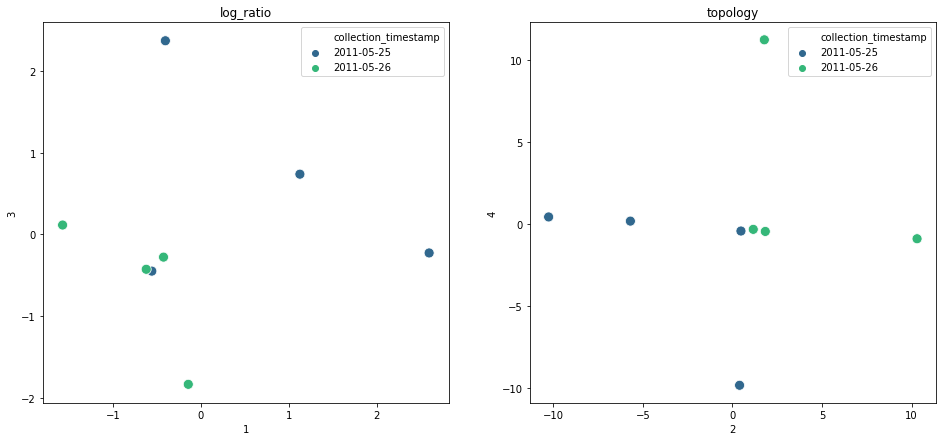

In [273]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].set_title('log_ratio')
sns.scatterplot(x=merged_pc_889_dicoda_embedding_log_df[1], 
                y=merged_pc_889_dicoda_embedding_log_df[3], 
                data = merged_pc_889_dicoda_embedding_log_df, hue='collection_timestamp', 
                ax=axes[0], palette='viridis', s=100)
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_889_dicoda_embedding_topo_df[2], 
                y=merged_pc_889_dicoda_embedding_topo_df[4], 
                data = merged_pc_889_dicoda_embedding_topo_df, hue='collection_timestamp', 
                ax=axes[1], palette='viridis', s=100)

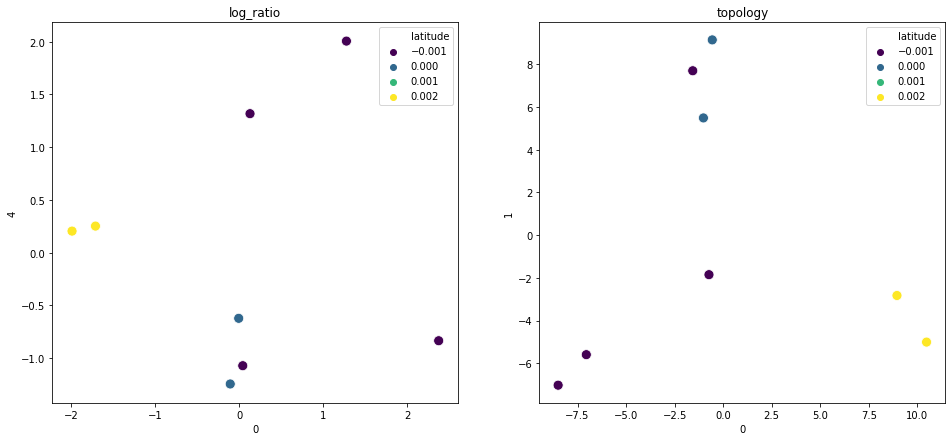

In [274]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].set_title('log_ratio')
sns.scatterplot(x=merged_pc_889_dicoda_embedding_log_df[0], 
                y=merged_pc_889_dicoda_embedding_log_df[4], 
                data = merged_pc_889_dicoda_embedding_log_df, hue='latitude', 
                ax=axes[0], palette='viridis', s=100)
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_889_dicoda_embedding_topo_df[0], 
                y=merged_pc_889_dicoda_embedding_topo_df[1], 
                data = merged_pc_889_dicoda_embedding_topo_df, hue='latitude', 
                ax=axes[1], palette='viridis', s=100)

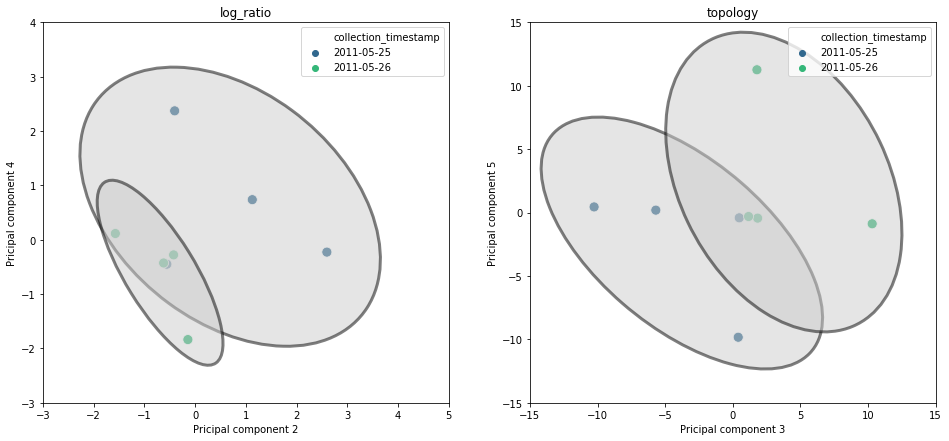

In [277]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
collection_timestamp = list(merged_pc_889_dicoda_embedding_log_df['collection_timestamp'].unique())

axes[0].set_title('log_ratio')
axes[1].set_title("topology")

for category in collection_timestamp:
    log_data = merged_pc_889_dicoda_embedding_log_df[merged_pc_889_dicoda_embedding_log_df['collection_timestamp']==category]
    topo_data = merged_pc_889_dicoda_embedding_topo_df[merged_pc_889_dicoda_embedding_topo_df['collection_timestamp']==category]
    log_x_mean = np.mean(log_data[1])
    log_y_mean = np.mean(log_data[3])
    topo_x_mean = np.mean(topo_data[2])
    topo_y_mean = np.mean(topo_data[4])

    log_cov = np.cov(log_data[1], log_data[3])
    topo_cov = np.cov(topo_data[2], topo_data[4])
    
    log_e = get_cov_ellipse(log_cov, (log_x_mean, log_y_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.5)
    topo_e = get_cov_ellipse(topo_cov, (topo_x_mean, topo_y_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.5)
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)
    

sns.scatterplot(x=merged_pc_889_dicoda_embedding_log_df[1], 
                y=merged_pc_889_dicoda_embedding_log_df[3], 
                data = merged_pc_889_dicoda_embedding_log_df, hue='collection_timestamp', 
                ax=axes[0], palette='viridis', s=100)
sns.scatterplot(x=merged_pc_889_dicoda_embedding_topo_df[2], 
                y=merged_pc_889_dicoda_embedding_topo_df[4], 
                data = merged_pc_889_dicoda_embedding_topo_df, hue='collection_timestamp', 
                ax=axes[1], palette='viridis', s=100)

axes[0].set_xlim(-3, 5)
axes[0].set_ylim(-3, 4)
axes[1].set_xlim(-15, 15)
axes[1].set_ylim(-15, 15)

axes[0].set_xlabel('Pricipal component 2')
axes[0].set_ylabel('Pricipal component 4')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 3')
axes[1].set_ylabel('Pricipal component 5')
axes[1].legend(loc='upper right', scatterpoints=1)

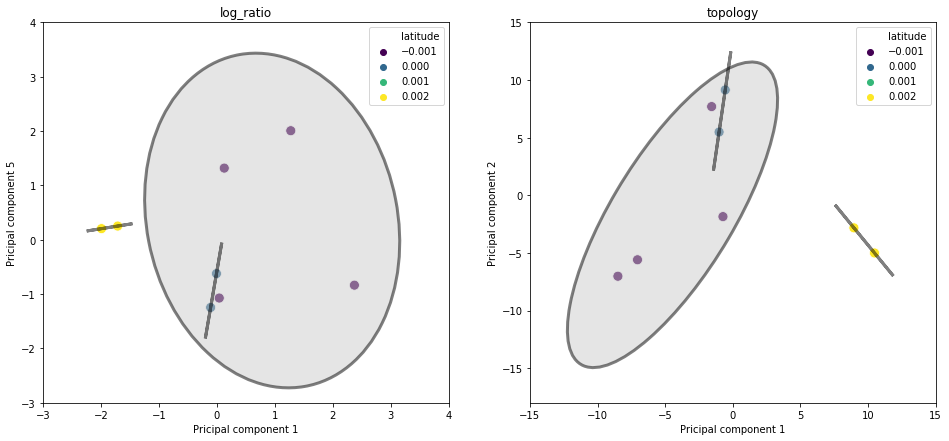

In [281]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
latitude = list(merged_pc_889_dicoda_embedding_log_df['latitude'].unique())

axes[0].set_title('log_ratio')
axes[1].set_title("topology")

for category in latitude:
    log_data = merged_pc_889_dicoda_embedding_log_df[merged_pc_889_dicoda_embedding_log_df['latitude']==category]
    topo_data = merged_pc_889_dicoda_embedding_topo_df[merged_pc_889_dicoda_embedding_topo_df['latitude']==category]
    log_x_mean = np.mean(log_data[0])
    log_y_mean = np.mean(log_data[4])
    topo_x_mean = np.mean(topo_data[0])
    topo_y_mean = np.mean(topo_data[1])

    log_cov = np.cov(log_data[0], log_data[4])
    topo_cov = np.cov(topo_data[0], topo_data[1])
    
    log_e = get_cov_ellipse(log_cov, (log_x_mean, log_y_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.5)
    topo_e = get_cov_ellipse(topo_cov, (topo_x_mean, topo_y_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.5)
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)
    

sns.scatterplot(x=merged_pc_889_dicoda_embedding_log_df[0], 
                y=merged_pc_889_dicoda_embedding_log_df[4], 
                data = merged_pc_889_dicoda_embedding_log_df, hue='latitude', 
                ax=axes[0], palette='viridis', s=100)
sns.scatterplot(x=merged_pc_889_dicoda_embedding_topo_df[0], 
                y=merged_pc_889_dicoda_embedding_topo_df[1], 
                data = merged_pc_889_dicoda_embedding_topo_df, hue='latitude', 
                ax=axes[1], palette='viridis', s=100)

axes[0].set_xlim(-3, 4)
axes[0].set_ylim(-3, 4)
axes[1].set_xlim(-15, 15)
axes[1].set_ylim(-18, 15)

axes[0].set_xlabel('Pricipal component 1')
axes[0].set_ylabel('Pricipal component 5')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 1')
axes[1].set_ylabel('Pricipal component 2')
axes[1].legend(loc='upper right', scatterpoints=1)

## Study 1034 EMP

In [282]:
rel_feature_table_1034 = pd.read_csv('1034-rel-feature-table.tsv', sep='\t')
rel_feature_table_1034.set_index('#OTU ID', inplace=True)
rel_feature_table_1034.head()

1034.CHA1  1034.CHA10  1034.CHA11  \
#OTU ID                                                               
6807a93b344ecb5064c0615c7f013930        0.0    0.650794    0.162138   
5b7cff435c4f7e39e49cab63bda2faf7        0.0    0.000000    0.000000   
559c21519d1b28875eff1446c8f8f9d8        0.0    0.000000    0.048203   
ca7b15384f4cd40f2831c1c2df96642c        0.0    0.000000    0.000000   
fdda5e9e359c6a3671f83f0762486b4d        0.0    0.000000    0.000000   

                                  1034.CHA12  1034.CHA2  1034.CHA3  1034.CHB1  \
#OTU ID                                                                         
6807a93b344ecb5064c0615c7f013930    0.319703   0.000000   0.011092   0.014248   
5b7cff435c4f7e39e49cab63bda2faf7    0.000000   0.000000   0.000000   0.000000   
559c21519d1b28875eff1446c8f8f9d8    0.078067   0.018182   0.000000   0.026714   
ca7b15384f4cd40f2831c1c2df96642c    0.000000   0.000000   0.000000   0.000000   
fdda5e9e359c6a3671f83f0762486b4d    0.000000   0.000000   0.000000   0.000000   

                                  1034.CHB10  1034.CHB2  1034.CHB3  ...  \
#OTU ID                                                             ...   
6807a93b344ecb5064c0615c7f013930    0.176380        0.0   0.000000  ...   
5b7cff435c4f7e39e49cab63bda2faf7    0.000000        0.0   0.000000  ...   
559c21519d1b28875eff1446c8f8f9d8    0.064417        0.0   0.045455  ...   
ca7b15384f4cd40f2831c1c2df96642c    0.000000        0.0   0.000000  ...   
fdda5e9e359c6a3671f83f0762486b4d    0.000000        0.0   0.000000  ...   

                                  1034.ZKE2  1034.ZKE3  1034.ZKE4  1034.ZKE5  \
#OTU ID                                                                        
6807a93b344ecb5064c0615c7f013930        0.0        0.0   0.033662        0.0   
5b7cff435c4f7e39e49cab63bda2faf7        0.0        0.0   0.000000        0.0   
559c21519d1b28875eff1446c8f8f9d8        0.0        1.0   0.055008        0.0   
ca7b15384f4cd40f2831c1c2df96642c        0.0        0.0   0.000000        0.0   
fdda5e9e359c6a3671f83f0762486b4d        0.0        0.0   0.000000        0.0   

                                  1034.ZKG1  1034.ZKG4  1034.ZKH1  1034.ZKH2  \
#OTU ID                                                                        
6807a93b344ecb5064c0615c7f013930        0.0   0.626506        0.0   0.033223   
5b7cff435c4f7e39e49cab63bda2faf7        0.0   0.000000        0.0   0.000000   
559c21519d1b28875eff1446c8f8f9d8        0.0   0.120482        1.0   0.027685   
ca7b15384f4cd40f2831c1c2df96642c        0.0   0.000000        0.0   0.000000   
fdda5e9e359c6a3671f83f0762486b4d        0.0   0.000000        0.0   0.000000   

                                  1034.ZKH3  1034.ZKH4  
#OTU ID                                                 
6807a93b344ecb5064c0615c7f013930        0.0   0.074713  
5b7cff435c4f7e39e49cab63bda2faf7        0.0   0.000000  
559c21519d1b28875eff1446c8f8f9d8        0.0   0.048851  
ca7b15384f4cd40f2831c1c2df96642c        0.0   0.000000  
fdda5e9e359c6a3671f83f0762486b4d        0.0   0.000000  

[5 rows x 90 columns]

In [283]:
metadata_1034 = pd.read_csv('1034_mapping_file.txt', sep='\t')
rel_feature_table_1034_transpose = rel_feature_table_1034.transpose()
rel_feature_table_1034_transpose.reset_index(inplace=True)
rel_feature_table_1034_transpose.head()

#OTU ID       index  6807a93b344ecb5064c0615c7f013930  \
0         1034.CHA1                          0.000000   
1        1034.CHA10                          0.650794   
2        1034.CHA11                          0.162138   
3        1034.CHA12                          0.319703   
4         1034.CHA2                          0.000000   

#OTU ID  5b7cff435c4f7e39e49cab63bda2faf7  559c21519d1b28875eff1446c8f8f9d8  \
0                                     0.0                          0.000000   
1                                     0.0                          0.000000   
2                                     0.0                          0.048203   
3                                     0.0                          0.078067   
4                                     0.0                          0.018182   

#OTU ID  ca7b15384f4cd40f2831c1c2df96642c  fdda5e9e359c6a3671f83f0762486b4d  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  ae65a5f26cc5d56a613cfcdf9e0061d8  5ef76d95fb667b12db2b5d50b2bc2e5f  \
0                                0.000000                          0.000000   
1                                0.000000                          0.095238   
2                                0.017528                          0.030675   
3                                0.000000                          0.000000   
4                                0.000000                          0.000000   

#OTU ID  867655a30d4390642cf12a147a86be48  31f4c8bd6ddea3382fbc96b7c951dfb2  \
0                                0.000000                          0.000000   
1                                0.142857                          0.000000   
2                                0.000000                          0.000000   
3                                0.000000                          0.107807   
4                                0.000000                          0.000000   

#OTU ID  ...  fcbc6e5e4a4f5000c10351ce26825fc9  \
0        ...                               0.0   
1        ...                               0.0   
2        ...                               0.0   
3        ...                               0.0   
4        ...                               0.0   

#OTU ID  878bfb6e1c087bbcb6e9dbdeedebb9df  b3ff0026e25af7cc6ebf5aa206a895a5  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  3fa324663cbab569175fac9d70ea5234  4ac7bfc1c2e0e3534592d73eb1d9bffb  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  2be29bd3d52ed9775fcceea32784311c  997577890533764cf2600deda5a02fc2  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  0a9b1e339e06873c76b9e7

In [284]:
category_metadata_1034 = metadata_1034[['#SampleID', 'geo_loc_name', 'collection_timestamp', 'country', 'elevation', 'longitude']]
category_metadata_1034.head()

#SampleID    geo_loc_name collection_timestamp     country  elevation  \
0  1034.CHB3  Russia:Siberia           2010-08-01  GAZ:Russia        2.0   
1  1034.CHB4  Russia:Siberia           2010-08-01  GAZ:Russia        2.0   
2  1034.CHB5  Russia:Siberia           2010-08-01  GAZ:Russia        2.0   
3  1034.CHB6  Russia:Siberia           2010-08-01  GAZ:Russia        2.0   
4  1034.CHB7  Russia:Siberia           2010-08-01  GAZ:Russia        2.0   

   longitude  
0    161.714  
1    161.714  
2    161.714  
3    161.714  
4    161.714

In [285]:
rel_abundance_with_category_1034 = pd.merge(rel_feature_table_1034_transpose,category_metadata_1034, left_on = 'index', right_on='#SampleID')
rel_abundance_with_category_1034.set_index('#SampleID',inplace=True)
rel_abundance_with_category_1034.drop('index',axis=1, inplace=True)
rel_abundance_with_category_1034.head()

6807a93b344ecb5064c0615c7f013930  \
#SampleID                                      
1034.CHA1                           0.000000   
1034.CHA10                          0.650794   
1034.CHA11                          0.162138   
1034.CHA12                          0.319703   
1034.CHA2                           0.000000   

            5b7cff435c4f7e39e49cab63bda2faf7  \
#SampleID                                      
1034.CHA1                                0.0   
1034.CHA10                               0.0   
1034.CHA11                               0.0   
1034.CHA12                               0.0   
1034.CHA2                                0.0   

            559c21519d1b28875eff1446c8f8f9d8  \
#SampleID                                      
1034.CHA1                           0.000000   
1034.CHA10                          0.000000   
1034.CHA11                          0.048203   
1034.CHA12                          0.078067   
1034.CHA2                           0.018182   

            ca7b15384f4cd40f2831c1c2df96642c  \
#SampleID                                      
1034.CHA1                                0.0   
1034.CHA10                               0.0   
1034.CHA11                               0.0   
1034.CHA12                               0.0   
1034.CHA2                                0.0   

            fdda5e9e359c6a3671f83f0762486b4d  \
#SampleID                                      
1034.CHA1                                0.0   
1034.CHA10                               0.0   
1034.CHA11                               0.0   
1034.CHA12                               0.0   
1034.CHA2                                0.0   

            ae65a5f26cc5d56a613cfcdf9e0061d8  \
#SampleID                                      
1034.CHA1                           0.000000   
1034.CHA10                          0.000000   
1034.CHA11                          0.017528   
1034.CHA12                          0.000000   
1034.CHA2                           0.000000   

            5ef76d95fb667b12db2b5d50b2bc2e5f  \
#SampleID                                      
1034.CHA1                           0.000000   
1034.CHA10                          0.095238   
1034.CHA11                          0.030675   
1034.CHA12                          0.000000   
1034.CHA2                           0.000000   

            867655a30d4390642cf12a147a86be48  \
#SampleID                                      
1034.CHA1                           0.000000   
1034.CHA10                          0.142857   
1034.CHA11                          0.000000   
1034.CHA12                          0.000000   
1034.CHA2                           0.000000   

            31f4c8bd6ddea3382fbc96b7c951dfb2  \
#SampleID                                      
1034.CHA1                           0.000000   
1034.CHA10                          0.000000   
1034.CHA11                          0.000000   
1034.CHA12                          0.107807   
1034.CHA2                           0.000000   

            2bbf50c498f8d59d755cfa2d6698d8ec  ...  \
#SampleID                                     ...   
1034.CHA1                           0.000000  ...   
1034.CHA10                          0.000000  ...   
1034.CHA11                          0.060473  ...   
1034.CHA12                          0.000000  ...   
1034.CHA2                           0.000000  ...   

            2be29bd3d52ed9775fcceea32784311c  \
#SampleID                                      
1034.CHA1                                0.0   
1034.CHA10                               0.0   
1034.CHA11                               0.0   
1034.CHA12                               0.0   
1034.CHA2                                0.0   

            997577890533764cf2600deda5a02fc2  \
#SampleID                                      
1034.CHA1                                0.0   
1034.CHA10                               0.0   
1034.CHA11                               0.0   
1034.CHA12                    

In [286]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
all_columns = rel_abundance_with_category_1034.columns
features = np.array(all_columns[0:len(all_columns)-5])
x_1034 = rel_abundance_with_category_1034.loc[:, features].values
scaled_x_1034 = StandardScaler().fit_transform(x_1034)
scaled_x_1034.shape

(90, 3464)

In [287]:
scaled_1034_Df = pd.DataFrame(data=scaled_x_1034)
merged_1034_Df = pd.merge(scaled_1034_Df,category_metadata_1034, left_index=True, right_index=True)

np.mean(scaled_x_1034), np.std(scaled_x_1034)
from sklearn.decomposition import PCA
pca_1034 = PCA(n_components=5)
principalComponents_1034 = pca_1034.fit_transform(scaled_x_1034)

principal_1034_Df = pd.DataFrame(data = principalComponents_1034)
merged_principal_1034_Df = pd.merge(principal_1034_Df,category_metadata_1034, left_index=True, right_index=True)
merged_principal_1034_Df
pca_1034.explained_variance_ratio_

array([0.22878568, 0.18975658, 0.18864849, 0.16522407, 0.03135149])

#### Silhouette values for different metadata categories (Different Combinations of principal components checked)

In [289]:
silhouette_score(principal_1034_Df[[2,4]], rel_abundance_with_category_1034['collection_timestamp'], 
                       metric='euclidean', sample_size=None)

0.2228074174610047

In [290]:
silhouette_score(principal_1034_Df[[1,2]], rel_abundance_with_category_1034['country'], 
                       metric='euclidean', sample_size=None)

0.2750543824098807

#### PCA plots of different metadata categories (principal components with best silhouette score taken as x-y axis)

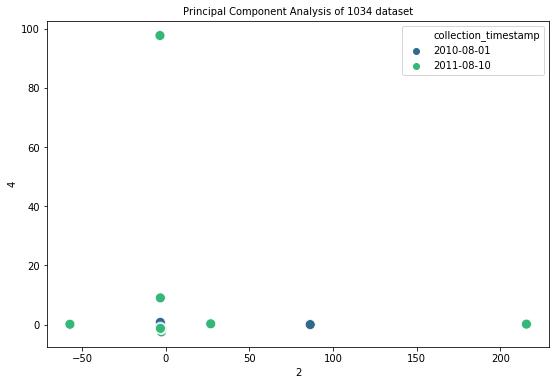

In [291]:
plt.figure(figsize=(9,6))
plt.title("Principal Component Analysis of 1034 dataset",fontsize=10)
sns.scatterplot(merged_principal_1034_Df[2],merged_principal_1034_Df[4], 
                data = merged_principal_1034_Df, hue = 'collection_timestamp', 
                palette='viridis', s=100)

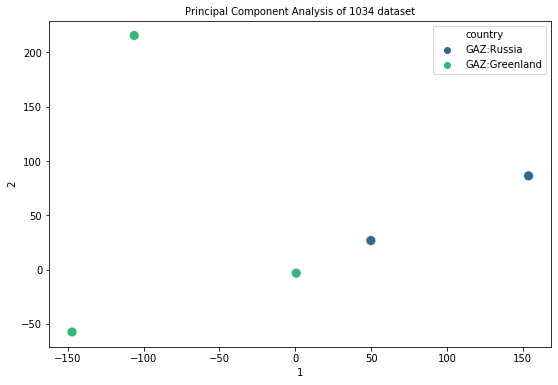

In [292]:
plt.figure(figsize=(9,6))
plt.title("Principal Component Analysis of 1034 dataset",fontsize=10)
sns.scatterplot(merged_principal_1034_Df[1],merged_principal_1034_Df[2], 
                data = merged_principal_1034_Df, hue = 'country', 
                palette='viridis', s=100)

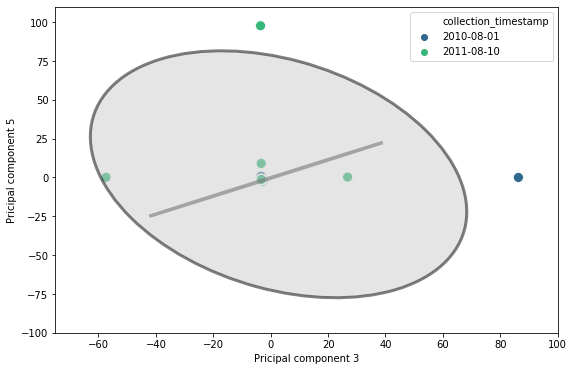

In [295]:
fig, ax = plt.subplots(figsize=(9,6))
collection_timestamp = list(merged_principal_1034_Df['collection_timestamp'].unique())

sns.scatterplot(merged_principal_1034_Df[2],merged_principal_1034_Df[4], 
                data = merged_principal_1034_Df, hue = 'collection_timestamp', 
                palette='viridis', s=100)

for category in collection_timestamp:
    sdata = merged_principal_1034_Df[merged_principal_1034_Df['collection_timestamp']==category]
    x_mean = np.mean(sdata[2])
    y_mean = np.mean(sdata[4])
    
    cov = np.cov(sdata[1], sdata[2])
    
    e = get_cov_ellipse(cov, (x_mean, y_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.5)
    ax.add_artist(e)

ax.set_xlim(-75, 100)
ax.set_ylim(-100, 110)
ax.set_xlabel('Pricipal component 3')
ax.set_ylabel('Pricipal component 5')
ax.legend(loc='upper right', scatterpoints=1)

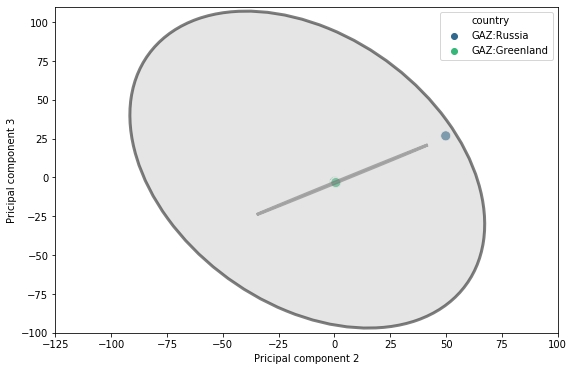

In [296]:
fig, ax = plt.subplots(figsize=(9,6))
country = list(merged_principal_1034_Df['country'].unique())

sns.scatterplot(merged_principal_1034_Df[1],merged_principal_1034_Df[2], 
                data = merged_principal_1034_Df, hue = 'country', 
                palette='viridis', s=100)

for category in country:
    sdata = merged_principal_1034_Df[merged_principal_1034_Df['country']==category]
    x_mean = np.mean(sdata[1])
    y_mean = np.mean(sdata[2])
    
    cov = np.cov(sdata[1], sdata[2])
    
    e = get_cov_ellipse(cov, (x_mean, y_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.5)
    ax.add_artist(e)

ax.set_xlim(-125, 100)
ax.set_ylim(-100, 110)
ax.set_xlabel('Pricipal component 2')
ax.set_ylabel('Pricipal component 3')
ax.legend(loc='upper right', scatterpoints=1)

In [297]:
dicoda_embedding_log_1034 = pd.read_csv('1034_z_1_log_ratio.csv', 
                                              names=rel_feature_table_1034.index)
dicoda_embedding_topo_1034 = pd.read_csv('1034_z_1_topology.csv', 
                                             names=rel_feature_table_1034.index)
dicoda_embedding_log_1034['#SampleID'] = rel_feature_table_1034.columns
dicoda_embedding_topo_1034['#SampleID'] = rel_feature_table_1034.columns
dicoda_embedding_log_1034_category = pd.merge(dicoda_embedding_log_1034,
                                              category_metadata_1034, on='#SampleID')
dicoda_embedding_topo_1034_category = pd.merge(dicoda_embedding_topo_1034,
                                               category_metadata_1034, on='#SampleID')

In [298]:
dicoda_embedding_log_1034_category.set_index('#SampleID', inplace=True)
dicoda_embedding_topo_1034_category.set_index('#SampleID', inplace=True)
dicoda_embedding_log_1034_category.head()

pca_1034_dicoda_embedding_log = PCA(n_components=5)
pca_1034_dicoda_embedding_topo = PCA(n_components=5)
pc_1034_dicoda_embedding_log = pca_1034_dicoda_embedding_log.fit_transform(dicoda_embedding_log_1034_category.drop(['geo_loc_name', 'collection_timestamp', 'country', 'elevation', 'longitude'], axis=1))
pc_1034_dicoda_embedding_topo = pca_1034_dicoda_embedding_topo.fit_transform(dicoda_embedding_topo_1034_category.drop(['geo_loc_name', 'collection_timestamp', 'country', 'elevation', 'longitude'], axis=1))

pc_1034_dicoda_embedding_log_df = pd.DataFrame(data = pc_1034_dicoda_embedding_log)
merged_pc_1034_dicoda_embedding_log_df = pd.merge(pc_1034_dicoda_embedding_log_df,category_metadata_1034, left_index=True, right_index=True)
pc_1034_dicoda_embedding_topo_df = pd.DataFrame(data = pc_1034_dicoda_embedding_topo)
merged_pc_1034_dicoda_embedding_topo_df = pd.merge(pc_1034_dicoda_embedding_topo_df,category_metadata_1034, left_index=True, right_index=True)
merged_pc_1034_dicoda_embedding_log_df.set_index('#SampleID', inplace=True)
merged_pc_1034_dicoda_embedding_topo_df.set_index('#SampleID', inplace=True)
print(pca_1034_dicoda_embedding_log.explained_variance_ratio_, pca_1034_dicoda_embedding_topo.explained_variance_ratio_)

[0.39192305 0.29039215 0.17301457 0.14186745 0.00181355] [0.32853031 0.17209699 0.16510598 0.14719768 0.03285934]


#### Silhouette value for different metadata categories after DiCoDa embedding

In [308]:
print(silhouette_score(pc_1034_dicoda_embedding_log_df[[3,4]], 
                       rel_abundance_with_category_1034['collection_timestamp'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(pc_1034_dicoda_embedding_topo_df[[3,4]], 
                       rel_abundance_with_category_1034['collection_timestamp'], 
                       metric='euclidean', sample_size=None))

0.27893570731789197 -0.02670059914122072


In [318]:
print(silhouette_score(pc_1034_dicoda_embedding_log_df[[3,4]], 
                       rel_abundance_with_category_1034['country'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(pc_1034_dicoda_embedding_topo_df[[3,4]], 
                       rel_abundance_with_category_1034['country'], 
                       metric='euclidean', sample_size=None))

0.5605026970318225 0.10167977287838248


#### PCA plots for different metadata categories after DiCoDa embedding

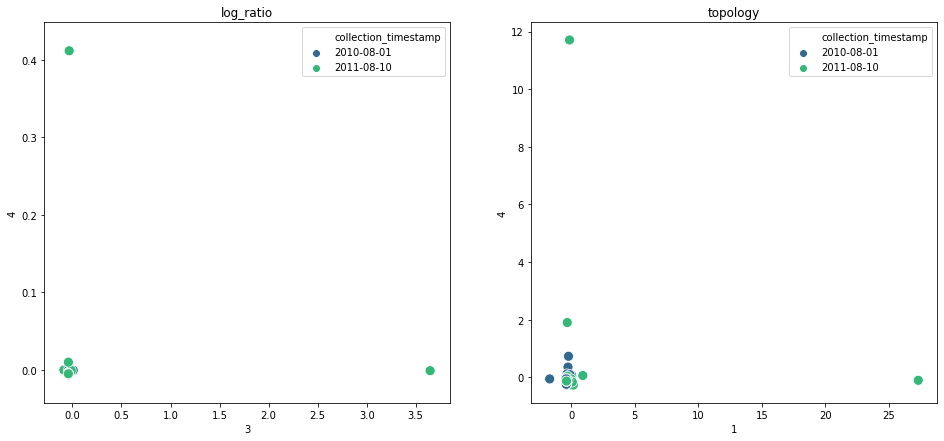

In [319]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].set_title('log_ratio')
sns.scatterplot(x=merged_pc_1034_dicoda_embedding_log_df[3], 
                y=merged_pc_1034_dicoda_embedding_log_df[4], 
                data = merged_pc_1034_dicoda_embedding_log_df, hue='collection_timestamp', 
                ax=axes[0], palette='viridis', s=100)
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_1034_dicoda_embedding_topo_df[1], 
                y=merged_pc_1034_dicoda_embedding_topo_df[4], 
                data = merged_pc_1034_dicoda_embedding_topo_df, hue='collection_timestamp', 
                ax=axes[1], palette='viridis', s=100)

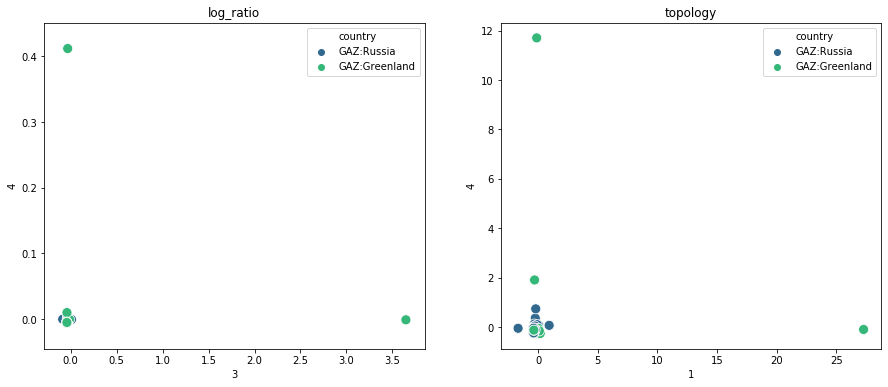

In [320]:
fig , axes = plt.subplots(1, 2, figsize=(15,6))
axes[0].set_title('log_ratio')
sns.scatterplot(x=merged_pc_1034_dicoda_embedding_log_df[3], 
                y=merged_pc_1034_dicoda_embedding_log_df[4], 
                data = merged_pc_1034_dicoda_embedding_log_df, hue='country', 
                ax=axes[0], palette='viridis', s=100)
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_1034_dicoda_embedding_topo_df[1], 
                y=merged_pc_1034_dicoda_embedding_topo_df[4], 
                data = merged_pc_1034_dicoda_embedding_topo_df, hue='country', 
                ax=axes[1], palette='viridis', s=100)

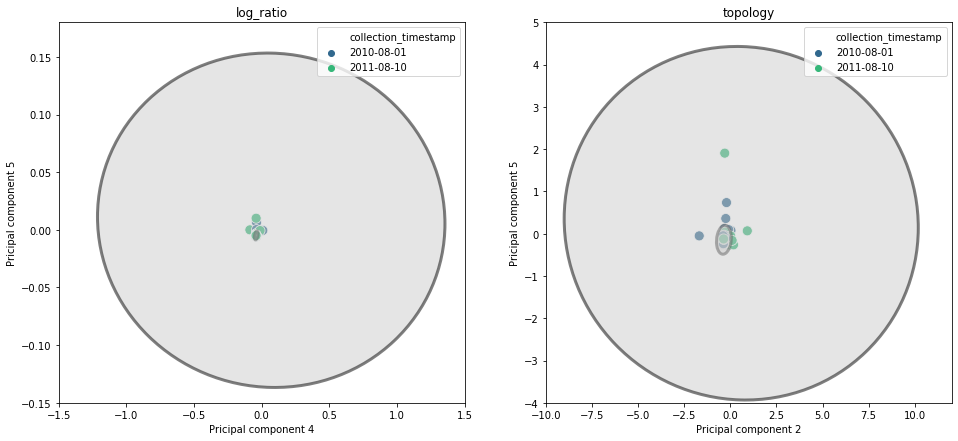

In [327]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
collection_timestamp = list(merged_pc_1034_dicoda_embedding_log_df['collection_timestamp'].unique())
axes[0].set_title('log_ratio')
axes[1].set_title("topology")

sns.scatterplot(x=merged_pc_1034_dicoda_embedding_log_df[3], 
                y=merged_pc_1034_dicoda_embedding_log_df[4], 
                data = merged_pc_1034_dicoda_embedding_log_df, hue='collection_timestamp', 
                ax=axes[0], palette='viridis', s=100)

sns.scatterplot(x=merged_pc_1034_dicoda_embedding_topo_df[1], 
                y=merged_pc_1034_dicoda_embedding_topo_df[4], 
                data = merged_pc_1034_dicoda_embedding_topo_df, hue='collection_timestamp', 
                ax=axes[1], palette='viridis', s=100)

for category in collection_timestamp:
    log_data = merged_pc_1034_dicoda_embedding_log_df[merged_pc_1034_dicoda_embedding_log_df['collection_timestamp']==category]
    topo_data = merged_pc_1034_dicoda_embedding_topo_df[merged_pc_1034_dicoda_embedding_topo_df['collection_timestamp']==category]
    log_x_mean = np.mean(log_data[3])
    log_y_mean = np.mean(log_data[4])
    topo_x_mean = np.mean(topo_data[1])
    topo_y_mean = np.mean(topo_data[4])
    
    log_cov = np.cov(log_data[3], log_data[4])
    topo_cov = np.cov(topo_data[1], topo_data[4])
    
    log_e = get_cov_ellipse(log_cov, (log_x_mean, log_y_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.5)
    topo_e = get_cov_ellipse(topo_cov, (topo_x_mean, topo_y_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.5)
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)

axes[0].set_xlim(-1.5, 1.5)
axes[0].set_ylim(-0.15, 0.18)
axes[1].set_xlim(-10, 12)
axes[1].set_ylim(-4,5)

axes[0].set_xlabel('Pricipal component 4')
axes[0].set_ylabel('Pricipal component 5')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 2')
axes[1].set_ylabel('Pricipal component 5')
axes[1].legend(loc='upper right', scatterpoints=1)

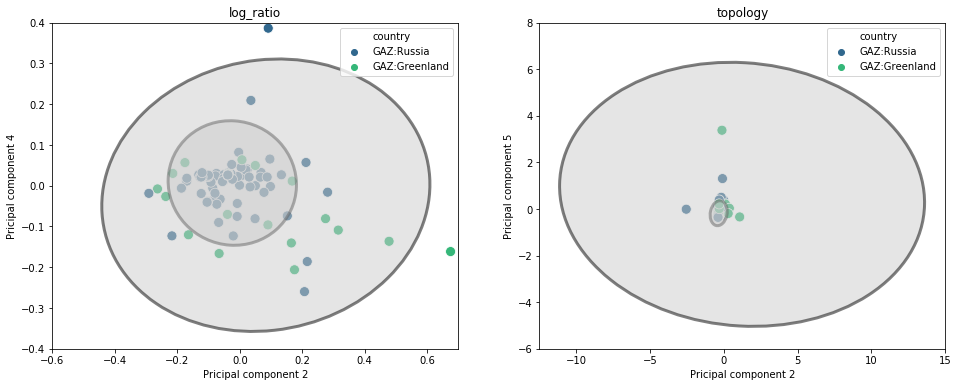

In [311]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
country = list(merged_pc_1034_dicoda_embedding_log_df['country'].unique())
axes[0].set_title('log_ratio')
axes[1].set_title("topology")

sns.scatterplot(x=merged_pc_1034_dicoda_embedding_log_df[3], 
                y=merged_pc_1034_dicoda_embedding_log_df[4], 
                data = merged_pc_1034_dicoda_embedding_log_df, hue='country', 
                ax=axes[0], palette='viridis', s=100)

sns.scatterplot(x=merged_pc_1034_dicoda_embedding_topo_df[1], 
                y=merged_pc_1034_dicoda_embedding_topo_df[4], 
                data = merged_pc_1034_dicoda_embedding_topo_df, hue='country', 
                ax=axes[1], palette='viridis', s=100)

for category in country:
    log_data = merged_pc_1034_dicoda_embedding_log_df[merged_pc_1034_dicoda_embedding_log_df['country']==category]
    topo_data = merged_pc_1034_dicoda_embedding_topo_df[merged_pc_1034_dicoda_embedding_topo_df['country']==category]
    log_x_mean = np.mean(log_data[3])
    log_y_mean = np.mean(log_data[4])
    topo_x_mean = np.mean(topo_data[1])
    topo_y_mean = np.mean(topo_data[4])
    
    log_cov = np.cov(log_data[3], log_data[4])
    topo_cov = np.cov(topo_data[1], topo_data[4])
    
    log_e = get_cov_ellipse(log_cov, (log_x_mean, log_y_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.5)
    topo_e = get_cov_ellipse(topo_cov, (topo_x_mean, topo_y_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.5)
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)

axes[0].set_xlim(-0.6, 0.7)
axes[0].set_ylim(-0.4, 0.4)
axes[1].set_xlim(-12.5, 15)
axes[1].set_ylim(-6,8)

axes[0].set_xlabel('Pricipal component 4')
axes[0].set_ylabel('Pricipal component 5')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 2')
axes[1].set_ylabel('Pricipal component 5')
axes[1].legend(loc='upper right', scatterpoints=1)

## Study 1579 EMP

In [328]:
rel_feature_table_1579 = pd.read_csv('1579-rel-feature-table.tsv', sep='\t')
rel_feature_table_1579.set_index('#OTU ID', inplace=True)
rel_feature_table_1579.head()

1579.C.1.0  1579.C.2.0  1579.C.3.0  \
#OTU ID                                                                
3235fcc103953270c22e1361109f17c5    0.003331    0.004317    0.010408   
6ecd6ae4608256b437515e6ad6fb02cb    0.024381    0.007344    0.000588   
a0ef8d47be342d4ecf14266c3141cd9b    0.022556    0.016661    0.021600   
32e118c9e7869894bab8e4bbeb29e2ec    0.000000    0.000000    0.000000   
ecc95de27390f17481f22552111f4519    0.003207    0.005293    0.008114   

                                  1579.C.3.15  1579.C.3.30  1579.C.4.0  \
#OTU ID                                                                  
3235fcc103953270c22e1361109f17c5     0.007244     0.004366    0.007057   
6ecd6ae4608256b437515e6ad6fb02cb     0.000893     0.001127    0.004442   
a0ef8d47be342d4ecf14266c3141cd9b     0.057673     0.031831    0.018259   
32e118c9e7869894bab8e4bbeb29e2ec     0.000000     0.000000    0.000000   
ecc95de27390f17481f22552111f4519     0.002908     0.002237    0.005779   

                                  1579.C.4.15  1579.C.4.30  1579.D.1.0  \
#OTU ID                                                                  
3235fcc103953270c22e1361109f17c5     0.008961     0.001779    0.004010   
6ecd6ae4608256b437515e6ad6fb02cb     0.000454     0.000000    0.008149   
a0ef8d47be342d4ecf14266c3141cd9b     0.045143     0.009818    0.000000   
32e118c9e7869894bab8e4bbeb29e2ec     0.000000     0.000000    0.000000   
ecc95de27390f17481f22552111f4519     0.004263     0.000753    0.001556   

                                  1579.D.1.15  ...  1579.WM.1.0  1579.WM.1.15  \
#OTU ID                                        ...                              
3235fcc103953270c22e1361109f17c5     0.005520  ...     0.032313      0.029359   
6ecd6ae4608256b437515e6ad6fb02cb     0.001262  ...     0.023024      0.017794   
a0ef8d47be342d4ecf14266c3141cd9b     0.002247  ...     0.007057      0.000000   
32e118c9e7869894bab8e4bbeb29e2ec     0.000000  ...     0.000000      0.000000   
ecc95de27390f17481f22552111f4519     0.008063  ...     0.005462      0.004893   

                                  1579.WM.1.30  1579.WM.2.15  1579.WM.2.30  \
#OTU ID                                                                      
3235fcc103953270c22e1361109f17c5      0.027253      0.033717      0.025639   
6ecd6ae4608256b437515e6ad6fb02cb      0.019637      0.006747      0.040628   
a0ef8d47be342d4ecf14266c3141cd9b      0.002590      0.005696      0.004371   
32e118c9e7869894bab8e4bbeb29e2ec      0.000124      0.000000      0.002432   
ecc95de27390f17481f22552111f4519      0.006468      0.010215      0.008393   

                                  1579.WM.3.15  1579.WM.3.30  1579.WM.4.0  \
#OTU ID                                                                     
3235fcc103953270c22e1361109f17c5      0.007029      0.003578     0.018038   
6ecd6ae4608256b437515e6ad6fb02cb      0.003005      0.000775     0.018511   
a0ef8d47be342d4ecf14266c3141cd9b      0.037809      0.009155     0.013343   
32e118c9e7869894bab8e4bbeb29e2ec      0.000068      0.006661     0.000000   
ecc95de27390f17481f22552111f4519      0.002988      0.001874     0.010208   

                                  1579.WM.4.30  1579.WM.Cow  
#OTU ID                                                      
3235fcc103953270c22e1361109f17c5      0.011975     0.000000  
6ecd6ae4608256b437515e6ad6fb02cb      0.001934     0.006808  
a0ef8d47be342d4ecf14266c3141cd9b      0.010302     0.000000  
32e118c9e7869894bab8e4bbeb29e2ec      0.015694     0.000000  
ecc95de27390f17481f22552111f4519      0.003124     0.000000  

[5 rows x 128 columns]

In [329]:
metadata_1579 = pd.read_csv('1579_mapping_file.txt', sep='\t')
rel_feature_table_1579_transpose = rel_feature_table_1579.transpose()
rel_feature_table_1579_transpose.reset_index(inplace=True)
rel_feature_table_1579_transpose.head()

#OTU ID        index  3235fcc103953270c22e1361109f17c5  \
0         1579.C.1.0                          0.003331   
1         1579.C.2.0                          0.004317   
2         1579.C.3.0                          0.010408   
3        1579.C.3.15                          0.007244   
4        1579.C.3.30                          0.004366   

#OTU ID  6ecd6ae4608256b437515e6ad6fb02cb  a0ef8d47be342d4ecf14266c3141cd9b  \
0                                0.024381                          0.022556   
1                                0.007344                          0.016661   
2                                0.000588                          0.021600   
3                                0.000893                          0.057673   
4                                0.001127                          0.031831   

#OTU ID  32e118c9e7869894bab8e4bbeb29e2ec  ecc95de27390f17481f22552111f4519  \
0                                     0.0                          0.003207   
1                                     0.0                          0.005293   
2                                     0.0                          0.008114   
3                                     0.0                          0.002908   
4                                     0.0                          0.002237   

#OTU ID  e0d18e0b56cd25d24aca29244df5919c  eba510472114252ffee7e2ad66ec62ff  \
0                                0.000000                               0.0   
1                                0.000078                               0.0   
2                                0.000000                               0.0   
3                                0.005280                               0.0   
4                                0.148312                               0.0   

#OTU ID  e4407ac8b2249dd7f1c992a151f77c4e  c99fd78be71e0b278491d74501921d99  \
0                                     0.0                          0.000000   
1                                     0.0                          0.000137   
2                                     0.0                          0.000000   
3                                     0.0                          0.000000   
4                                     0.0                          0.000000   

#OTU ID  ...  9f25a0c4fbcc10367cc5ba370bd971b9  \
0        ...                               0.0   
1        ...                               0.0   
2        ...                               0.0   
3        ...                               0.0   
4        ...                               0.0   

#OTU ID  6066e0d9b04013e565a7081e916cb60e  35576f5b62f2868adc547a61829f020e  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  48e06f0f771560f66491559e44064b67  f16cf5913b02ee2c36c2e282eaf3e8ba  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  e89a7b2e481c36173474053ed3b80061  b4471670126e1034cc225d76fadb0ddf  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  1b703cd532ff33ae

#### Soil elevation metadata category added from description

In [330]:
def description(desc):
    desc_list = desc.split()
    elevation = desc_list[-1]
    elevation = elevation[0:len(elevation)-1]
    if int(elevation)>1000:
        return 'Greater than 1000'
    elif int(elevation)<=1000:
        return 'Less than 1000'

#### Latitude rounded off to 2 decimal units (to decrease number of unique values)

In [332]:
category_metadata_1579 = metadata_1579[['#SampleID', 'Description', 'latitude', 'depth_range']]
category_metadata_1579['soil_elevation'] = [description(x) for x in category_metadata_1579['Description']]
category_metadata_1579['Latitude'] = [round(x, 2) for x in category_metadata_1579['latitude']]
category_metadata_1579.drop('latitude',axis=1, inplace=True)
category_metadata_1579.head()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

#SampleID           Description depth_range     soil_elevation  Latitude
0  1579.H.3.30   soil elevation 992m   0.30-0.50     Less than 1000     20.11
1   1579.H.4.0   soil elevation 992m      0-0.15     Less than 1000     20.11
2  1579.H.4.30   soil elevation 992m   0.30-0.50     Less than 1000     20.11
3  1579.F.3.30   soil elevation 833m   0.30-0.50     Less than 1000     20.10
4   1579.I.1.0  soil elevation 1090m      0-0.15  Greater than 1000     20.11

In [333]:
rel_abundance_with_category_1579 = pd.merge(rel_feature_table_1579_transpose,category_metadata_1579, left_on = 'index', right_on='#SampleID')
rel_abundance_with_category_1579.set_index('#SampleID',inplace=True)
rel_abundance_with_category_1579.drop('index',axis=1, inplace=True)
rel_abundance_with_category_1579.head()

3235fcc103953270c22e1361109f17c5  \
#SampleID                                       
1579.C.1.0                           0.003331   
1579.C.2.0                           0.004317   
1579.C.3.0                           0.010408   
1579.C.3.15                          0.007244   
1579.C.3.30                          0.004366   

             6ecd6ae4608256b437515e6ad6fb02cb  \
#SampleID                                       
1579.C.1.0                           0.024381   
1579.C.2.0                           0.007344   
1579.C.3.0                           0.000588   
1579.C.3.15                          0.000893   
1579.C.3.30                          0.001127   

             a0ef8d47be342d4ecf14266c3141cd9b  \
#SampleID                                       
1579.C.1.0                           0.022556   
1579.C.2.0                           0.016661   
1579.C.3.0                           0.021600   
1579.C.3.15                          0.057673   
1579.C.3.30                          0.031831   

             32e118c9e7869894bab8e4bbeb29e2ec  \
#SampleID                                       
1579.C.1.0                                0.0   
1579.C.2.0                                0.0   
1579.C.3.0                                0.0   
1579.C.3.15                               0.0   
1579.C.3.30                               0.0   

             ecc95de27390f17481f22552111f4519  \
#SampleID                                       
1579.C.1.0                           0.003207   
1579.C.2.0                           0.005293   
1579.C.3.0                           0.008114   
1579.C.3.15                          0.002908   
1579.C.3.30                          0.002237   

             e0d18e0b56cd25d24aca29244df5919c  \
#SampleID                                       
1579.C.1.0                           0.000000   
1579.C.2.0                           0.000078   
1579.C.3.0                           0.000000   
1579.C.3.15                          0.005280   
1579.C.3.30                          0.148312   

             eba510472114252ffee7e2ad66ec62ff  \
#SampleID                                       
1579.C.1.0                                0.0   
1579.C.2.0                                0.0   
1579.C.3.0                                0.0   
1579.C.3.15                               0.0   
1579.C.3.30                               0.0   

             e4407ac8b2249dd7f1c992a151f77c4e  \
#SampleID                                       
1579.C.1.0                                0.0   
1579.C.2.0                                0.0   
1579.C.3.0                                0.0   
1579.C.3.15                               0.0   
1579.C.3.30                               0.0   

             c99fd78be71e0b278491d74501921d99  \
#SampleID                                       
1579.C.1.0                           0.000000   
1579.C.2.0                           0.000137   
1579.C.3.0                           0.000000   
1579.C.3.15                          0.000000   
1579.C.3.30                          0.000000   

             be326adf331fd70310e3aaa3d661055c  ...  \
#SampleID                                      ...   
1579.C.1.0                           0.000000  ...   
1579.C.2.0                           0.001172  ...   
1579.C.3.0                           0.000000  ...   
1579.C.3.15                          0.000000  ...   
1579.C.3.30                          0.000000  ...   

             f16cf5913b02ee2c36c2e282eaf3e8ba  \
#SampleID                                       
1579.C.1.0                                0.0   
1579.C.2.0                                0.0   
1579.C.3.0                                0.0   
1579.C.3.15                               0.0   
1579.C.3.30                               0.0   

             e89a7b2e481c36173474053ed3b80061  \
#SampleID                                       
1579.C.1.0                                0.0   
1579.C.2.0                                0.0  

In [334]:
from sklearn.preprocessing import StandardScaler
all_columns = rel_abundance_with_category_1579.columns
features = np.array(all_columns[0:len(all_columns)-4])
x_1579 = rel_abundance_with_category_1579.loc[:, features].values
scaled_x_1579 = StandardScaler().fit_transform(x_1579)
scaled_x_1579.shape

(128, 24723)

In [335]:
np.mean(scaled_x_1579), np.std(scaled_x_1579)
from sklearn.decomposition import PCA
pca_1579 = PCA(n_components=5)
principalComponents_1579 = pca_1579.fit_transform(scaled_x_1579)

principal_1579_Df = pd.DataFrame(data = principalComponents_1579)
merged_principal_1579_Df = pd.merge(principal_1579_Df,category_metadata_1579, left_index=True, right_index=True)
merged_principal_1579_Df.describe()
pca_1579.explained_variance_ratio_

array([0.02783369, 0.02463532, 0.02300139, 0.02238212, 0.01989269])

#### Silhouette value for different metadata categories (different combinations of principal components checked)

In [350]:
silhouette_score(principal_1579_Df[[3,4]], rel_abundance_with_category_1579['Description'], 
                       metric='euclidean', sample_size=None)

-0.2483712506856307

In [361]:
silhouette_score(principal_1579_Df[[2,4]], rel_abundance_with_category_1579['depth_range'], 
                       metric='euclidean', sample_size=None)

-0.265480578108757

In [374]:
silhouette_score(principal_1579_Df[[0,4]], rel_abundance_with_category_1579['Latitude'], 
                       metric='euclidean', sample_size=None)

-0.1701351969691198

In [377]:
silhouette_score(principal_1579_Df[[0,1]], rel_abundance_with_category_1579['soil_elevation'], 
                       metric='euclidean', sample_size=None)

0.27928861138443

#### PCA plots of different metadata categories (principal components with best silhouette score taken on x-y axis)

<Figure size 432x288 with 0 Axes>

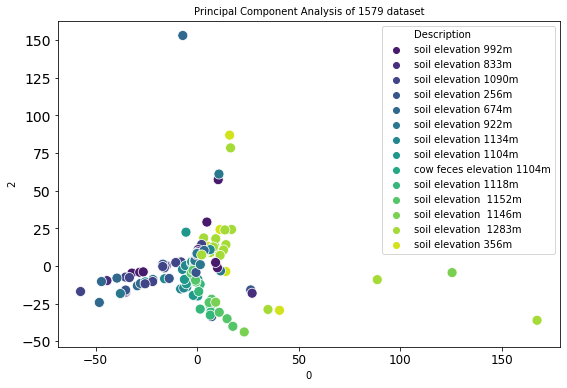

In [378]:
plt.figure()
plt.figure(figsize=(9,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title("Principal Component Analysis of 1579 dataset",fontsize=10)
sns.scatterplot(merged_principal_1579_Df[0],merged_principal_1579_Df[2], 
                data = merged_principal_1579_Df, hue = 'Description', palette='viridis', s=100)
plt.legend(loc='upper right')

<Figure size 432x288 with 0 Axes>

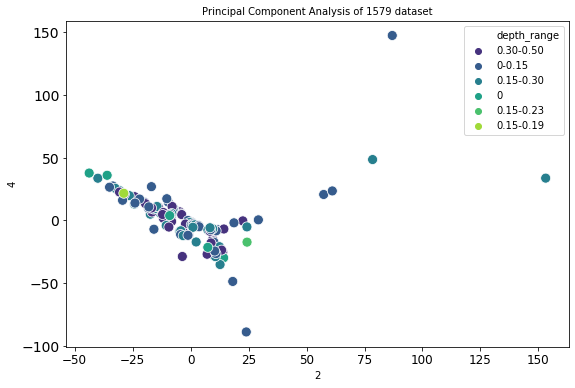

In [379]:
plt.figure()
plt.figure(figsize=(9,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title("Principal Component Analysis of 1579 dataset",fontsize=10)
sns.scatterplot(merged_principal_1579_Df[2],merged_principal_1579_Df[4], 
                data = merged_principal_1579_Df, hue = 'depth_range', palette='viridis', s=100)
plt.legend(loc='upper right')

<Figure size 432x288 with 0 Axes>

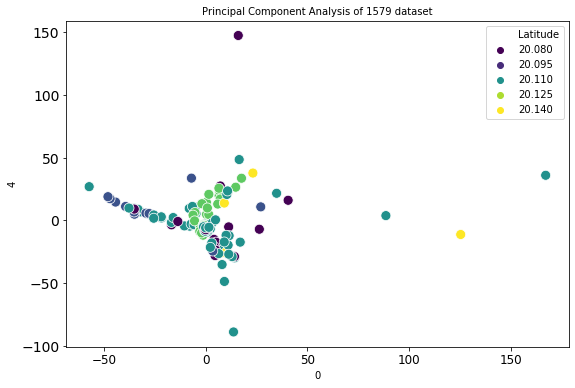

In [380]:
plt.figure()
plt.figure(figsize=(9,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title("Principal Component Analysis of 1579 dataset",fontsize=10)
sns.scatterplot(merged_principal_1579_Df[0],merged_principal_1579_Df[4], 
                data = merged_principal_1579_Df, hue = 'Latitude', palette='viridis', s=100)
plt.legend(loc='upper right')

<Figure size 432x288 with 0 Axes>

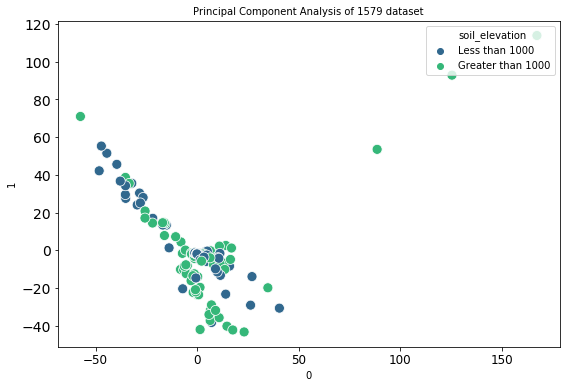

In [381]:
plt.figure()
plt.figure(figsize=(9,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title("Principal Component Analysis of 1579 dataset",fontsize=10)
sns.scatterplot(merged_principal_1579_Df[0],merged_principal_1579_Df[1], 
                data = merged_principal_1579_Df, hue = 'soil_elevation', palette='viridis', s=100)
plt.legend(loc='upper right')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: Degrees of freedom <= 0 for slice
  if sys.path[0] == '':


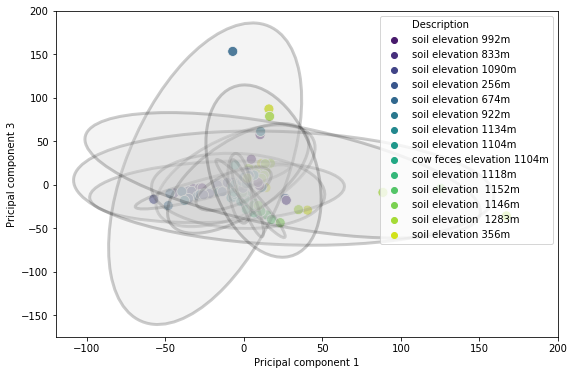

In [386]:
fig, ax = plt.subplots(figsize=(9,6))
Description = list(merged_principal_1579_Df['Description'].unique())

sns.scatterplot(merged_principal_1579_Df[0],merged_principal_1579_Df[2], 
                data = merged_principal_1579_Df, hue = 'Description', palette='viridis', s=100)

for category in Description:
    sdata = merged_principal_1579_Df[merged_principal_1579_Df['Description']==category]
    x_mean = np.mean(sdata[0])
    y_mean = np.mean(sdata[2])
    
    cov = np.cov(sdata[0], sdata[2])

    e = get_cov_ellipse(cov, (x_mean, y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.2)
    ax.add_artist(e)

ax.set_xlim(-120, 200)
ax.set_ylim(-175, 200)
ax.set_xlabel('Pricipal component 1')
ax.set_ylabel('Pricipal component 3')
ax.legend(loc='upper right', scatterpoints=1)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: Degrees of freedom <= 0 for slice
  if sys.path[0] == '':


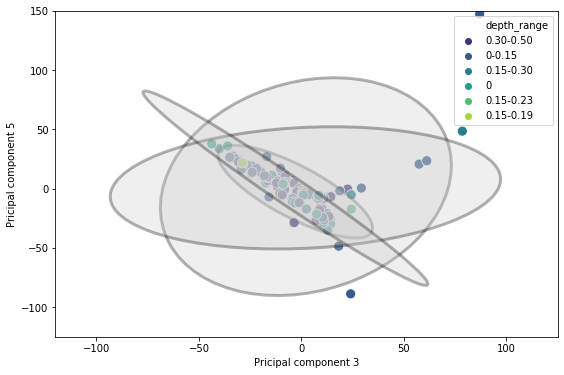

In [388]:
fig, ax = plt.subplots(figsize=(9,6))
depth_range = list(merged_principal_1579_Df['depth_range'].unique())

sns.scatterplot(merged_principal_1579_Df[2],merged_principal_1579_Df[4], 
                data = merged_principal_1579_Df, hue = 'depth_range', palette='viridis', s=100)

for category in depth_range:
    sdata = merged_principal_1579_Df[merged_principal_1579_Df['depth_range']==category]
    x_mean = np.mean(sdata[2])
    y_mean = np.mean(sdata[4])
    
    cov = np.cov(sdata[2], sdata[4])

    e = get_cov_ellipse(cov, (x_mean, y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    ax.add_artist(e)

ax.set_xlim(-120, 125)
ax.set_ylim(-125, 150)
ax.set_xlabel('Pricipal component 3')
ax.set_ylabel('Pricipal component 5')
ax.legend(loc='upper right', scatterpoints=1)

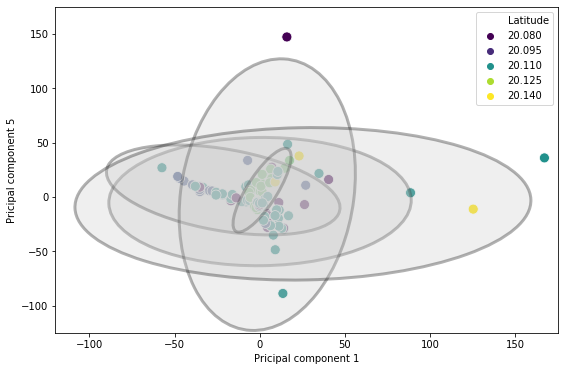

In [389]:
fig, ax = plt.subplots(figsize=(9,6))
Latitude = list(merged_principal_1579_Df['Latitude'].unique())

sns.scatterplot(merged_principal_1579_Df[0],merged_principal_1579_Df[4], 
                data = merged_principal_1579_Df, hue = 'Latitude', palette='viridis', s=100)

for category in Latitude:
    sdata = merged_principal_1579_Df[merged_principal_1579_Df['Latitude']==category]
    x_mean = np.mean(sdata[0])
    y_mean = np.mean(sdata[4])
    
    cov = np.cov(sdata[0], sdata[4])

    e = get_cov_ellipse(cov, (x_mean, y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    ax.add_artist(e)

ax.set_xlim(-120, 175)
ax.set_ylim(-125, 175)
ax.set_xlabel('Pricipal component 1')
ax.set_ylabel('Pricipal component 5')
ax.legend(loc='upper right', scatterpoints=1)

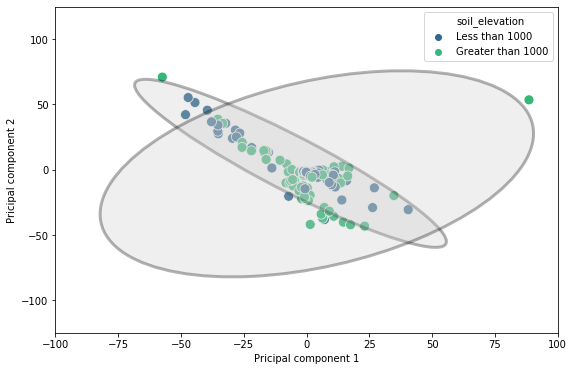

In [393]:
fig, ax = plt.subplots(figsize=(9,6))
soil_elevation = list(merged_principal_1579_Df['soil_elevation'].unique())

sns.scatterplot(merged_principal_1579_Df[0],merged_principal_1579_Df[1], 
                data = merged_principal_1579_Df, hue = 'soil_elevation', palette='viridis', s=100)

for category in soil_elevation:
    sdata = merged_principal_1579_Df[merged_principal_1579_Df['soil_elevation']==category]
    x_mean = np.mean(sdata[0])
    y_mean = np.mean(sdata[1])
    
    cov = np.cov(sdata[0], sdata[1])

    e = get_cov_ellipse(cov, (x_mean, y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    ax.add_artist(e)

ax.set_xlim(-100, 100)
ax.set_ylim(-125, 125)
ax.set_xlabel('Pricipal component 1')
ax.set_ylabel('Pricipal component 2')
ax.legend(loc='upper right', scatterpoints=1)

In [394]:
dicoda_embedding_log_1579 = pd.read_csv('1579_z_1_log_ratio.csv', 
                                              names=rel_feature_table_1579.index)
dicoda_embedding_topo_1579 = pd.read_csv('1579_z_1_topology.csv', 
                                             names=rel_feature_table_1579.index)
dicoda_embedding_log_1579['#SampleID'] = rel_feature_table_1579.columns
dicoda_embedding_topo_1579['#SampleID'] = rel_feature_table_1579.columns
dicoda_embedding_log_1579_category = pd.merge(dicoda_embedding_log_1579,
                                              category_metadata_1579, on='#SampleID')
dicoda_embedding_topo_1579_category = pd.merge(dicoda_embedding_topo_1579,
                                               category_metadata_1579, on='#SampleID')

In [395]:
dicoda_embedding_log_1579_category.set_index('#SampleID', inplace=True)
dicoda_embedding_topo_1579_category.set_index('#SampleID', inplace=True)
dicoda_embedding_log_1579_category.head()

pca_1579_dicoda_embedding_log = PCA(n_components=5)
pca_1579_dicoda_embedding_topo = PCA(n_components=5)
pc_1579_dicoda_embedding_log = pca_1579_dicoda_embedding_log.fit_transform(dicoda_embedding_log_1579_category.drop(['Description', 'Latitude', 'depth_range', 'soil_elevation'], axis=1))
pc_1579_dicoda_embedding_topo = pca_1579_dicoda_embedding_topo.fit_transform(dicoda_embedding_topo_1579_category.drop(['Description', 'Latitude', 'depth_range', 'soil_elevation'], axis=1))

pc_1579_dicoda_embedding_log_df = pd.DataFrame(data = pc_1579_dicoda_embedding_log)
merged_pc_1579_dicoda_embedding_log_df = pd.merge(pc_1579_dicoda_embedding_log_df,category_metadata_1579, left_index=True, right_index=True)
pc_1579_dicoda_embedding_topo_df = pd.DataFrame(data = pc_1579_dicoda_embedding_topo)
merged_pc_1579_dicoda_embedding_topo_df = pd.merge(pc_1579_dicoda_embedding_topo_df,category_metadata_1579, left_index=True, right_index=True)
merged_pc_1579_dicoda_embedding_log_df.set_index('#SampleID', inplace=True)
merged_pc_1579_dicoda_embedding_topo_df.set_index('#SampleID', inplace=True)
print(pca_1579_dicoda_embedding_log.explained_variance_ratio_, pca_1579_dicoda_embedding_topo.explained_variance_ratio_)

[0.08230172 0.05303466 0.03846603 0.03617162 0.02881325] [0.08672191 0.07869859 0.04313782 0.03390451 0.03039233]


#### Silhouette values for different metadata categories (different combinations of principal components checked)

In [405]:
print(silhouette_score(pc_1579_dicoda_embedding_log_df[[3,4]], 
                       rel_abundance_with_category_1579['Description'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(pc_1579_dicoda_embedding_topo_df[[3,4]], 
                       rel_abundance_with_category_1579['Description'], 
                       metric='euclidean', sample_size=None))

-0.3907079918330262 -0.25101980531405677


In [419]:
print(silhouette_score(pc_1579_dicoda_embedding_log_df[[3,4]], 
                       rel_abundance_with_category_1579['depth_range'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(pc_1579_dicoda_embedding_topo_df[[3,4]], 
                       rel_abundance_with_category_1579['depth_range'], 
                       metric='euclidean', sample_size=None))

-0.48333211603218323 -0.2853703773163685


In [431]:
print(silhouette_score(pc_1579_dicoda_embedding_log_df[[3,4]], 
                       rel_abundance_with_category_1579['Latitude'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(pc_1579_dicoda_embedding_topo_df[[3,4]], 
                       rel_abundance_with_category_1579['Latitude'], 
                       metric='euclidean', sample_size=None))

-0.3600656697194292 -0.15403923295804367


In [443]:
print(silhouette_score(pc_1579_dicoda_embedding_log_df[[3,4]], 
                       rel_abundance_with_category_1579['soil_elevation'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(pc_1579_dicoda_embedding_topo_df[[3,4]], 
                       rel_abundance_with_category_1579['soil_elevation'], 
                       metric='euclidean', sample_size=None))

-0.051867381544966146 0.09742469933380103


#### PCA plots for different metadata categories after DiCoDa embedding

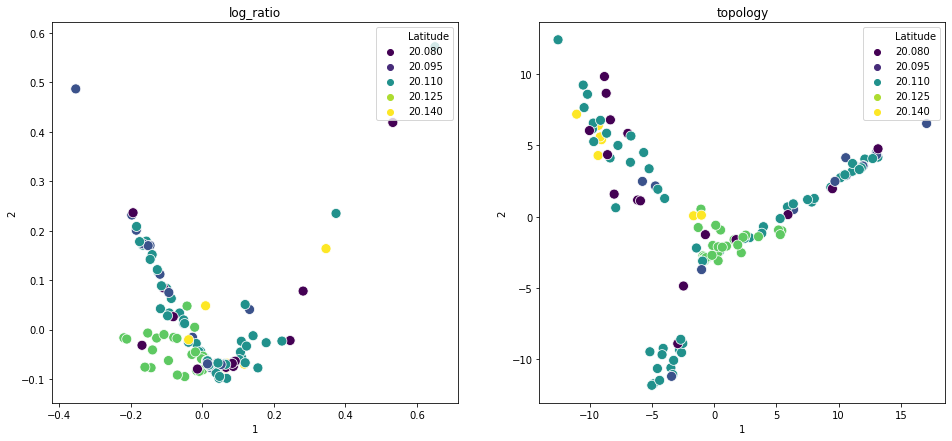

In [445]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].set_title('log_ratio')
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_1579_dicoda_embedding_log_df[1], 
                y=merged_pc_1579_dicoda_embedding_log_df[2], 
                data = merged_pc_1579_dicoda_embedding_log_df, hue='Latitude', 
                ax=axes[0], palette='viridis', s=100)
sns.scatterplot(x=merged_pc_1579_dicoda_embedding_topo_df[1], 
                y=merged_pc_1579_dicoda_embedding_topo_df[2], 
                data = merged_pc_1579_dicoda_embedding_topo_df, hue='Latitude', 
                ax=axes[1], palette='viridis', s=100)
axes[0].legend(loc='upper right')

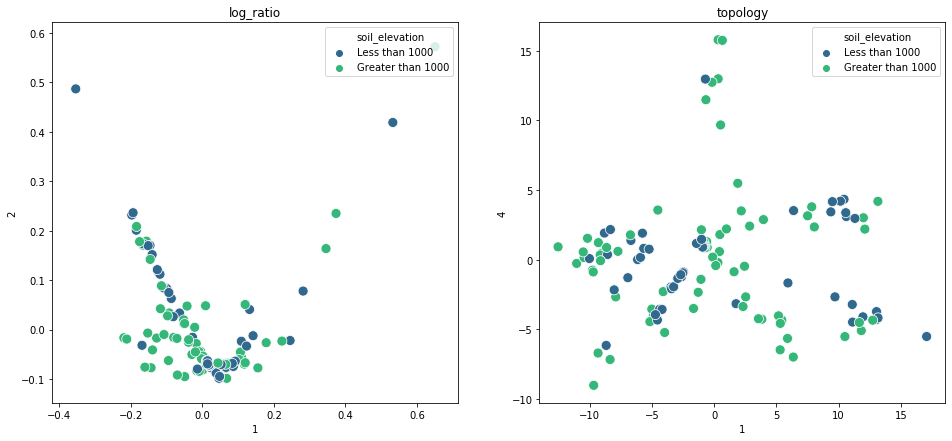

In [447]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].set_title('log_ratio')
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_1579_dicoda_embedding_log_df[1], 
                y=merged_pc_1579_dicoda_embedding_log_df[2], 
                data = merged_pc_1579_dicoda_embedding_log_df, hue='soil_elevation', 
                ax=axes[0], palette='viridis', s=100)
sns.scatterplot(x=merged_pc_1579_dicoda_embedding_topo_df[1], 
                y=merged_pc_1579_dicoda_embedding_topo_df[4], 
                data = merged_pc_1579_dicoda_embedding_topo_df, hue='soil_elevation', 
                ax=axes[1], palette='viridis', s=100)
axes[0].legend(loc='upper right')

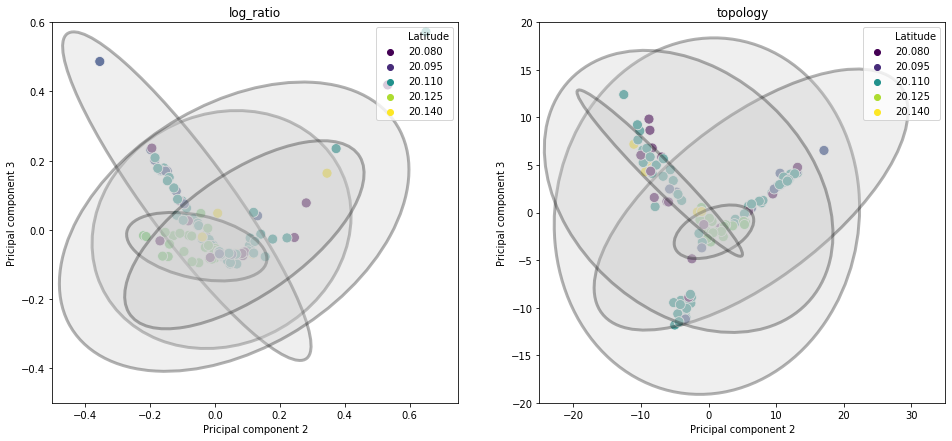

In [456]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
Latitude = list(merged_pc_1579_dicoda_embedding_log_df['Latitude'].unique())

axes[0].set_title('log_ratio')
axes[1].set_title("topology")

sns.scatterplot(x=merged_pc_1579_dicoda_embedding_log_df[1], 
                y=merged_pc_1579_dicoda_embedding_log_df[2], 
                data = merged_pc_1579_dicoda_embedding_log_df, hue='Latitude', 
                ax=axes[0], palette='viridis', s=100)
sns.scatterplot(x=merged_pc_1579_dicoda_embedding_topo_df[1], 
                y=merged_pc_1579_dicoda_embedding_topo_df[2], 
                data = merged_pc_1579_dicoda_embedding_topo_df, hue='Latitude', 
                ax=axes[1], palette='viridis', s=100)

for category in Latitude:
    log_data = merged_pc_1579_dicoda_embedding_log_df[merged_pc_1579_dicoda_embedding_log_df['Latitude']==category]
    topo_data = merged_pc_1579_dicoda_embedding_topo_df[merged_pc_1579_dicoda_embedding_topo_df['Latitude']==category]
    log_x_mean = np.mean(log_data[1])
    log_y_mean = np.mean(log_data[2])
    topo_x_mean = np.mean(topo_data[1])
    topo_y_mean = np.mean(topo_data[2])
    
    log_cov = np.cov(log_data[1], log_data[2])
    topo_cov = np.cov(topo_data[1], topo_data[2])
    
    log_e = get_cov_ellipse(log_cov, (log_x_mean, log_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    topo_e = get_cov_ellipse(topo_cov, (topo_x_mean, topo_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)

axes[0].set_xlim(-0.5, 0.75)
axes[0].set_ylim(-0.5, 0.6)
axes[1].set_xlim(-25, 35)
axes[1].set_ylim(-20, 20)

axes[0].set_xlabel('Pricipal component 2')
axes[0].set_ylabel('Pricipal component 3')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 2')
axes[1].set_ylabel('Pricipal component 3')
axes[1].legend(loc='upper right', scatterpoints=1)

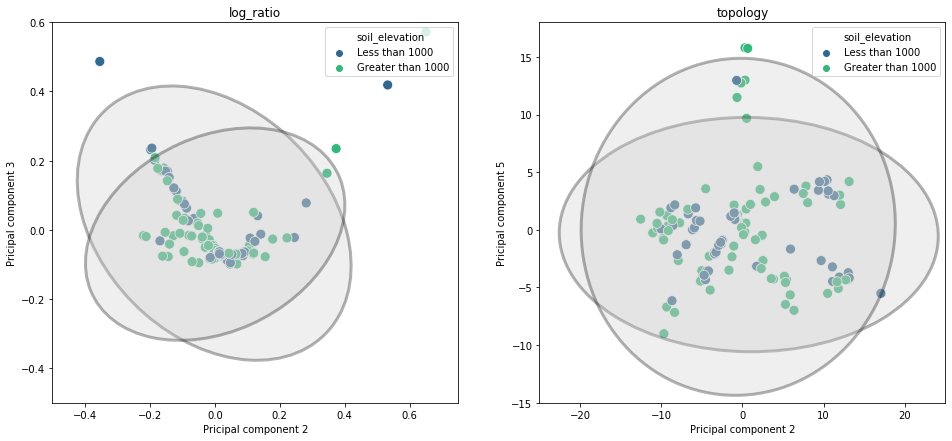

In [457]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
soil_elevation = list(merged_pc_1579_dicoda_embedding_log_df['soil_elevation'].unique())

axes[0].set_title('log_ratio')
axes[1].set_title("topology")

sns.scatterplot(x=merged_pc_1579_dicoda_embedding_log_df[1], 
                y=merged_pc_1579_dicoda_embedding_log_df[2], 
                data = merged_pc_1579_dicoda_embedding_log_df, hue='soil_elevation', 
                ax=axes[0], palette='viridis', s=100)
sns.scatterplot(x=merged_pc_1579_dicoda_embedding_topo_df[1], 
                y=merged_pc_1579_dicoda_embedding_topo_df[4], 
                data = merged_pc_1579_dicoda_embedding_topo_df, hue='soil_elevation', 
                ax=axes[1], palette='viridis', s=100)

for category in soil_elevation:
    log_data = merged_pc_1579_dicoda_embedding_log_df[merged_pc_1579_dicoda_embedding_log_df['soil_elevation']==category]
    topo_data = merged_pc_1579_dicoda_embedding_topo_df[merged_pc_1579_dicoda_embedding_topo_df['soil_elevation']==category]
    log_x_mean = np.mean(log_data[1])
    log_y_mean = np.mean(log_data[2])
    topo_x_mean = np.mean(topo_data[1])
    topo_y_mean = np.mean(topo_data[4])
    
    log_cov = np.cov(log_data[1], log_data[2])
    topo_cov = np.cov(topo_data[1], topo_data[4])
    
    log_e = get_cov_ellipse(log_cov, (log_x_mean, log_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    topo_e = get_cov_ellipse(topo_cov, (topo_x_mean, topo_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)

axes[0].set_xlim(-0.5, 0.75)
axes[0].set_ylim(-0.5, 0.6)
axes[1].set_xlim(-25, 25)
axes[1].set_ylim(-15, 18)

axes[0].set_xlabel('Pricipal component 2')
axes[0].set_ylabel('Pricipal component 3')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 2')
axes[1].set_ylabel('Pricipal component 5')
axes[1].legend(loc='upper right', scatterpoints=1)

## Study 662 EMP

In [458]:
rel_feature_table_662 = pd.read_csv('662-rel-feature-table.tsv', sep='\t')
rel_feature_table_662.set_index('#OTU ID', inplace=True)
rel_feature_table_662.head()

662.C1    662.C2    662.M1   662.M10  \
#OTU ID                                                                    
806f07222b2ee06190d1ed0232cb1246  0.099178  0.144333  0.033895  0.007538   
4c7817b6390ccf9ff48bc118b91836f1  0.176916  0.119365  0.004133  0.000932   
1d55aced8cd1c9a1acc8d57e4e126b1b  0.000948  0.000000  0.237229  0.000185   
034a3d249fe2c4f09503e0dc82ff3185  0.004877  0.031146  0.040542  0.000311   
9b4716f3e2a2dfdd307b02890dad480d  0.015569  0.007657  0.004648  0.001746   

                                   662.M11   662.M12   662.M13   662.M14  \
#OTU ID                                                                    
806f07222b2ee06190d1ed0232cb1246  0.000883  0.016008  0.396589  0.026009   
4c7817b6390ccf9ff48bc118b91836f1  0.000000  0.000952  0.082834  0.004951   
1d55aced8cd1c9a1acc8d57e4e126b1b  0.000000  0.003125  0.014543  0.001359   
034a3d249fe2c4f09503e0dc82ff3185  0.000406  0.000000  0.000000  0.000000   
9b4716f3e2a2dfdd307b02890dad480d  0.000212  0.000832  0.001766  0.000949   

                                   662.M15   662.M16  ...   662.M41   662.M42  \
#OTU ID                                               ...                       
806f07222b2ee06190d1ed0232cb1246  0.131672  0.352920  ...  0.000289  0.000000   
4c7817b6390ccf9ff48bc118b91836f1  0.620542  0.411490  ...  0.000000  0.000000   
1d55aced8cd1c9a1acc8d57e4e126b1b  0.000000  0.000000  ...  0.001412  0.001369   
034a3d249fe2c4f09503e0dc82ff3185  0.000182  0.000000  ...  0.000000  0.000000   
9b4716f3e2a2dfdd307b02890dad480d  0.013526  0.036444  ...  0.000070  0.000239   

                                   662.M43   662.M44   662.M5a   662.M5b  \
#OTU ID                                                                    
806f07222b2ee06190d1ed0232cb1246  0.000165  0.000226  0.001564  0.000565   
4c7817b6390ccf9ff48bc118b91836f1  0.000000  0.000000  0.000000  0.000000   
1d55aced8cd1c9a1acc8d57e4e126b1b  0.003084  0.000000  0.000533  0.000661   
034a3d249fe2c4f09503e0dc82ff3185  0.002649  0.000000  0.036467  0.049545   
9b4716f3e2a2dfdd307b02890dad480d  0.000118  0.000369  0.000841  0.000224   

                                    662.M6    662.M7    662.M8    662.M9  
#OTU ID                                                                   
806f07222b2ee06190d1ed0232cb1246  0.000641  0.010513  0.107001  0.000439  
4c7817b6390ccf9ff48bc118b91836f1  0.000000  0.000545  0.009399  0.000000  
1d55aced8cd1c9a1acc8d57e4e126b1b  0.203195  0.002280  0.005315  0.017328  
034a3d249fe2c4f09503e0dc82ff3185  0.097780  0.001109  0.013542  0.035044  
9b4716f3e2a2dfdd307b02890dad480d  0.000088  0.001158  0.014578  0.000340  

[5 rows x 47 columns]

In [459]:
metadata_662 = pd.read_csv('662_mapping_file.txt', sep='\t')
rel_feature_table_662_transpose = rel_feature_table_662.transpose()
rel_feature_table_662_transpose.reset_index(inplace=True)
rel_feature_table_662_transpose.head()

#OTU ID    index  806f07222b2ee06190d1ed0232cb1246  \
0         662.C1                          0.099178   
1         662.C2                          0.144333   
2         662.M1                          0.033895   
3        662.M10                          0.007538   
4        662.M11                          0.000883   

#OTU ID  4c7817b6390ccf9ff48bc118b91836f1  1d55aced8cd1c9a1acc8d57e4e126b1b  \
0                                0.176916                          0.000948   
1                                0.119365                          0.000000   
2                                0.004133                          0.237229   
3                                0.000932                          0.000185   
4                                0.000000                          0.000000   

#OTU ID  034a3d249fe2c4f09503e0dc82ff3185  9b4716f3e2a2dfdd307b02890dad480d  \
0                                0.004877                          0.015569   
1                                0.031146                          0.007657   
2                                0.040542                          0.004648   
3                                0.000311                          0.001746   
4                                0.000406                          0.000212   

#OTU ID  a3ab62ff725bac0f9e83ea0541aac2aa  d1ca2ca6050e76f1527b4d403dd69734  \
0                                0.018075                          0.001611   
1                                0.000788                          0.001276   
2                                0.017551                          0.001644   
3                                0.005852                          0.008789   
4                                0.000000                          0.000000   

#OTU ID  27cc054547519452d57055b6b898d318  115c613109e1feba04bffc274c570f0f  \
0                                0.000859                          0.000000   
1                                0.000000                          0.000000   
2                                0.170829                          0.048099   
3                                0.000178                          0.000000   
4                                0.000871                          0.000000   

#OTU ID  ...  4811b09678969a1f688c63937576f721  \
0        ...                               0.0   
1        ...                               0.0   
2        ...                               0.0   
3        ...                               0.0   
4        ...                               0.0   

#OTU ID  f0d30b0330e91362ece12d759d824af0  e7bc2ee20527590bdc3d1cb705ae4581  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  a58528ad7ea1201b2b6dd69dce0a8f61  3e60319cfa12852d96e87a46e7ceff79  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  129dfe43370ea6b231316d018ca30f15  d8cca9e77d3617ed276768247774448d  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  528a0cd9f9f00b972eb181c34722ad31  b07355

In [460]:
category_metadata_662 = metadata_662[['#SampleID', 'substrate_sampled', 'area_sampled', 'collection_timestamp', 'env_feature', 'latitude', 'longitude', 'sample_type']]
category_metadata_662.head()

#SampleID   substrate_sampled      area_sampled collection_timestamp  \
0   662.M5b  glass crucible lid  rocky intertidal           2009-08-06   
1    662.M6  glass crucible lid          tidepool           2009-08-06   
2    662.M7  glass crucible lid          tidepool           2009-08-06   
3    662.M8                rock          tidepool           2009-08-06   
4    662.M9                rock          tidepool           2009-08-06   

       env_feature  latitude  longitude sample_type  
0  intertidal zone     48.38    -124.73     biofilm  
1  intertidal zone     48.38    -124.73     biofilm  
2  intertidal zone     48.38    -124.73     biofilm  
3  intertidal zone     48.38    -124.73     biofilm  
4  intertidal zone     48.38    -124.73     biofilm

In [461]:
rel_abundance_with_category_662 = pd.merge(rel_feature_table_662_transpose,category_metadata_662, left_on = 'index', right_on='#SampleID')
rel_abundance_with_category_662.set_index('#SampleID',inplace=True)
rel_abundance_with_category_662.drop('index',axis=1, inplace=True)
rel_abundance_with_category_662.head()

806f07222b2ee06190d1ed0232cb1246  4c7817b6390ccf9ff48bc118b91836f1  \
#SampleID                                                                       
662.C1                             0.099178                          0.176916   
662.C2                             0.144333                          0.119365   
662.M1                             0.033895                          0.004133   
662.M10                            0.007538                          0.000932   
662.M11                            0.000883                          0.000000   

           1d55aced8cd1c9a1acc8d57e4e126b1b  034a3d249fe2c4f09503e0dc82ff3185  \
#SampleID                                                                       
662.C1                             0.000948                          0.004877   
662.C2                             0.000000                          0.031146   
662.M1                             0.237229                          0.040542   
662.M10                            0.000185                          0.000311   
662.M11                            0.000000                          0.000406   

           9b4716f3e2a2dfdd307b02890dad480d  a3ab62ff725bac0f9e83ea0541aac2aa  \
#SampleID                                                                       
662.C1                             0.015569                          0.018075   
662.C2                             0.007657                          0.000788   
662.M1                             0.004648                          0.017551   
662.M10                            0.001746                          0.005852   
662.M11                            0.000212                          0.000000   

           d1ca2ca6050e76f1527b4d403dd69734  27cc054547519452d57055b6b898d318  \
#SampleID                                                                       
662.C1                             0.001611                          0.000859   
662.C2                             0.001276                          0.000000   
662.M1                             0.001644                          0.170829   
662.M10                            0.008789                          0.000178   
662.M11                            0.000000                          0.000871   

           115c613109e1feba04bffc274c570f0f  e18d454c7188ec54fd1304db5386c19a  \
#SampleID                                                                       
662.C1                             0.000000                               0.0   
662.C2                             0.000000                               0.0   
662.M1                             0.048099                               0.0   
662.M10                            0.000000                               0.0   
662.M11                            0.000000                               0.0   

           ...  528a0cd9f9f00b972eb181c34722ad31  \
#SampleID  ...                                     
662.C1     ...                               0.0   
662.C2     ...                               0.0   
662.M1     ...                               0.0   
662.M10    ...                               0.0   
662.M11    ...                               0.0   

           b07355062f87f1a7e4778cb9c1c4e82a  c59a18415fb6aeeadb5c1295ccd81e3c  \
#SampleID                                                                       
662.C1                                  0.0                               0.0   
662.C2                                  0.0                               0.0   
662.M1                                  0.0                               0.0   
662.M10                                 0.0                               0.0   
662.M11                                 0.0                               0.0   

                     substrate_sampled      area_sampled  \
#SampleID                                                  
662.C1     Mytilus californianus shell          tidepool   
662.C2     Mytilus californianus shell  rocky intertidal  

In [462]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
all_columns = rel_abundance_with_category_662.columns
features = np.array(all_columns[0:len(all_columns)-7])
x_662 = rel_abundance_with_category_662.loc[:, features].values
scaled_x_662 = StandardScaler().fit_transform(x_662)
scaled_x_662.shape

(47, 7701)

In [464]:
np.mean(scaled_x_662), np.std(scaled_x_662)
from sklearn.decomposition import PCA
pca_662 = PCA(n_components=5)
principalComponents_662 = pca_662.fit_transform(scaled_x_662)

principal_662_Df = pd.DataFrame(data = principalComponents_662)
merged_principal_662_Df = pd.merge(principal_662_Df,category_metadata_662, left_index=True, right_index=True)
merged_principal_662_Df.describe()
pca_662.explained_variance_ratio_

array([0.10764756, 0.08905648, 0.07772321, 0.05943604, 0.05377655])

#### Silhouette value for different metadata categories (different combinations of principal components checked)

In [474]:
silhouette_score(principal_662_Df[[0,2]], rel_abundance_with_category_662['substrate_sampled'], 
                       metric='euclidean', sample_size=None)

-0.054867143131740334

In [477]:
silhouette_score(principal_662_Df[[1,3]], rel_abundance_with_category_662['area_sampled'], 
                       metric='euclidean', sample_size=None)

-0.3213267021427451

In [480]:
silhouette_score(principal_662_Df[[1,2]], rel_abundance_with_category_662['env_feature'], 
                       metric='euclidean', sample_size=None)

0.46614596304479217

In [483]:
silhouette_score(principal_662_Df[[2,3]], rel_abundance_with_category_662['latitude'], 
                       metric='euclidean', sample_size=None)

0.052392910899814286

#### PCA plots of different metadata categories (principal components with best silhouette score taken on x-y axis)

<Figure size 432x288 with 0 Axes>

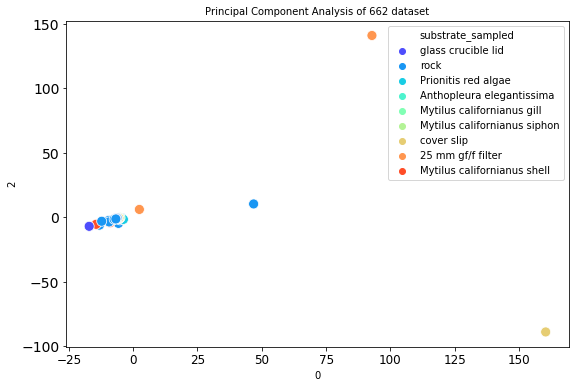

In [484]:
plt.figure()
plt.figure(figsize=(9,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title("Principal Component Analysis of 662 dataset",fontsize=10)
sns.scatterplot(merged_principal_662_Df[0],merged_principal_662_Df[2], 
                data = merged_principal_662_Df, hue = 'substrate_sampled', palette='rainbow', s=100)
plt.legend(loc='upper right')

<Figure size 432x288 with 0 Axes>

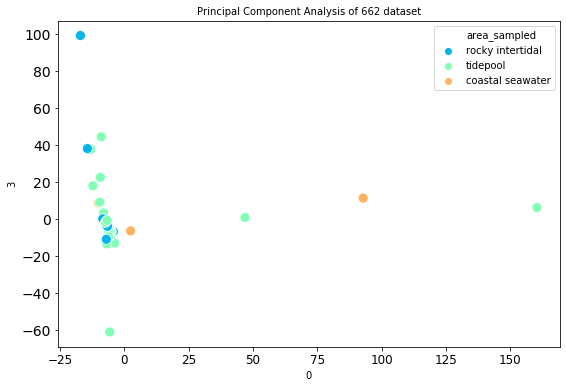

In [485]:
plt.figure()
plt.figure(figsize=(9,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title("Principal Component Analysis of 662 dataset",fontsize=10)
sns.scatterplot(merged_principal_662_Df[0],merged_principal_662_Df[3], 
                data = merged_principal_662_Df, hue = 'area_sampled', palette='rainbow', s=100)
plt.legend(loc='upper right')

<Figure size 432x288 with 0 Axes>

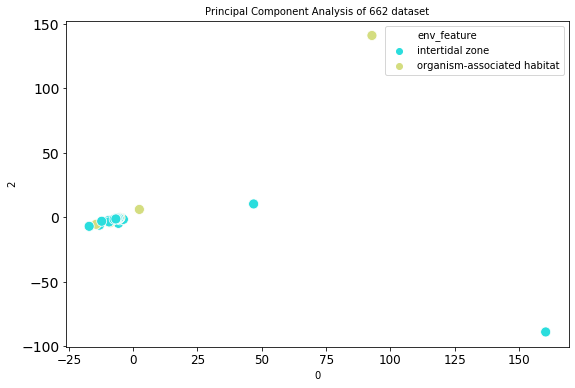

In [486]:
plt.figure()
plt.figure(figsize=(9,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title("Principal Component Analysis of 662 dataset",fontsize=10)
sns.scatterplot(merged_principal_662_Df[0],merged_principal_662_Df[2], 
                data = merged_principal_662_Df, hue = 'env_feature', palette='rainbow', s=100)
plt.legend(loc='upper right')

<Figure size 432x288 with 0 Axes>

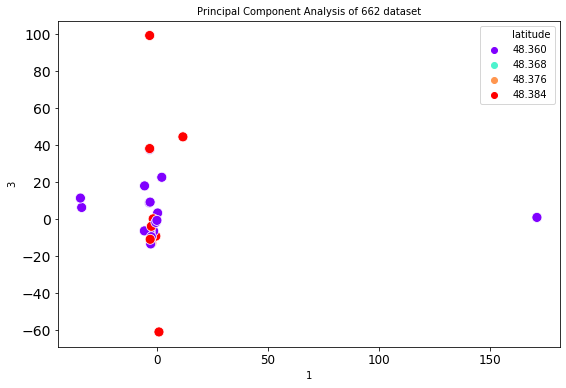

In [487]:
plt.figure()
plt.figure(figsize=(9,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title("Principal Component Analysis of 662 dataset",fontsize=10)
sns.scatterplot(merged_principal_662_Df[1],merged_principal_662_Df[3], 
                data = merged_principal_662_Df, hue = 'latitude', palette='rainbow', s=100)
plt.legend(loc='upper right')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Degrees of freedom <= 0 for slice
  del sys.path[0]


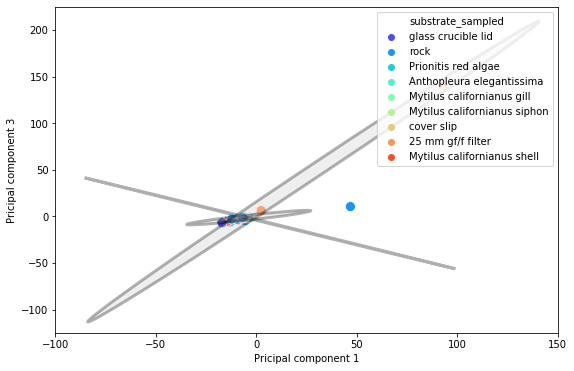

In [494]:
fig, ax = plt.subplots(figsize=(9,6))
substrate_sampled = list(merged_principal_662_Df['substrate_sampled'].unique())


sns.scatterplot(merged_principal_662_Df[0],merged_principal_662_Df[2], 
                data = merged_principal_662_Df, hue = 'substrate_sampled', palette='rainbow', s=100)

for category in substrate_sampled:
    sdata = merged_principal_662_Df[merged_principal_662_Df['substrate_sampled']==category]
    x_mean = np.mean(sdata[0])
    y_mean = np.mean(sdata[2])

    cov = np.cov(sdata[0], sdata[2])

    e = get_cov_ellipse(cov, (x_mean, y_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    ax.add_artist(e)

ax.set_xlim(-100, 150)
ax.set_ylim(-125, 225)
ax.set_xlabel('Pricipal component 1')
ax.set_ylabel('Pricipal component 3')
ax.legend(loc='upper right', scatterpoints=1)

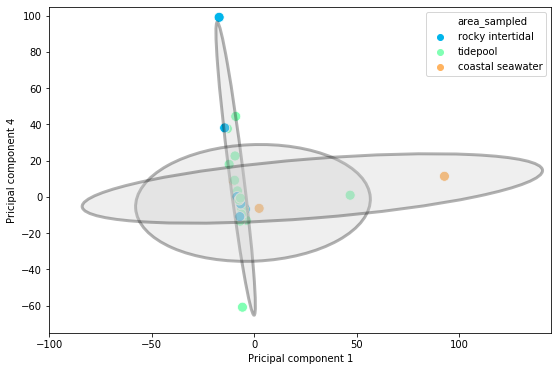

In [499]:
fig, ax = plt.subplots(figsize=(9,6))
area_sampled = list(merged_principal_662_Df['area_sampled'].unique())


sns.scatterplot(merged_principal_662_Df[0],merged_principal_662_Df[3], 
                data = merged_principal_662_Df, hue = 'area_sampled', palette='rainbow', s=100)

for category in area_sampled:
    sdata = merged_principal_662_Df[merged_principal_662_Df['area_sampled']==category]
    x_mean = np.mean(sdata[0])
    y_mean = np.mean(sdata[3])

    cov = np.cov(sdata[0], sdata[3])
    
    e = get_cov_ellipse(cov, (x_mean, y_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    ax.add_artist(e)

ax.set_xlim(-100, 145)
ax.set_ylim(-75, 105)
ax.set_xlabel('Pricipal component 1')
ax.set_ylabel('Pricipal component 4')
ax.legend(loc='upper right', scatterpoints=1)

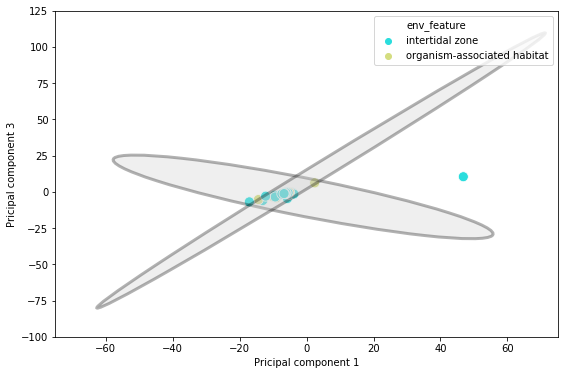

In [500]:
fig, ax = plt.subplots(figsize=(9,6))
env_feature = list(merged_principal_662_Df['env_feature'].unique())


sns.scatterplot(merged_principal_662_Df[0],merged_principal_662_Df[2], 
                data = merged_principal_662_Df, hue = 'env_feature', palette='rainbow', s=100)

for category in env_feature:
    sdata = merged_principal_662_Df[merged_principal_662_Df['env_feature']==category]
    x_mean = np.mean(sdata[0])
    y_mean = np.mean(sdata[2])

    cov = np.cov(sdata[0], sdata[2])
    
    e = get_cov_ellipse(cov, (x_mean, y_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    ax.add_artist(e)

ax.set_xlim(-75, 75)
ax.set_ylim(-100, 125)
ax.set_xlabel('Pricipal component 1')
ax.set_ylabel('Pricipal component 3')
ax.legend(loc='upper right', scatterpoints=1)

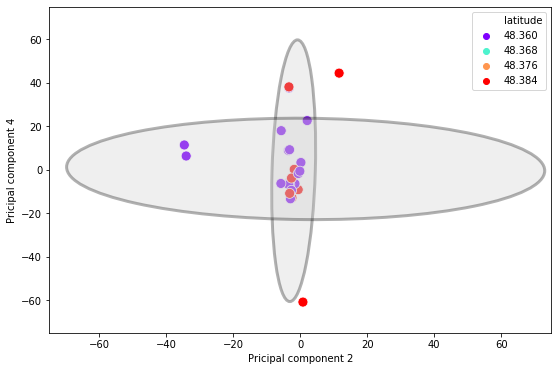

In [501]:
fig, ax = plt.subplots(figsize=(9,6))
latitude = list(merged_principal_662_Df['latitude'].unique())


sns.scatterplot(merged_principal_662_Df[1],merged_principal_662_Df[3], 
                data = merged_principal_662_Df, hue = 'latitude', palette='rainbow', s=100)

for category in latitude:
    sdata = merged_principal_662_Df[merged_principal_662_Df['latitude']==category]
    x_mean = np.mean(sdata[1])
    y_mean = np.mean(sdata[3])

    cov = np.cov(sdata[1], sdata[3])
    color = np.random.rand(3,)
    e = get_cov_ellipse(cov, (x_mean, y_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    ax.add_artist(e)

ax.set_xlim(-75, 75)
ax.set_ylim(-75, 75)
ax.set_xlabel('Pricipal component 2')
ax.set_ylabel('Pricipal component 4')
ax.legend(loc='upper right', scatterpoints=1)

### DiCoDa embedding Results (Study 662)

In [502]:
dicoda_embedding_log_662 = pd.read_csv('662_z_1_log_ratio.csv', 
                                              names=rel_feature_table_662.index)
dicoda_embedding_topo_662 = pd.read_csv('662_z_1_topology.csv', 
                                             names=rel_feature_table_662.index)
dicoda_embedding_log_662['#SampleID'] = rel_feature_table_662.columns
dicoda_embedding_topo_662['#SampleID'] = rel_feature_table_662.columns
dicoda_embedding_log_662_category = pd.merge(dicoda_embedding_log_662,
                                              category_metadata_662, on='#SampleID')
dicoda_embedding_topo_662_category = pd.merge(dicoda_embedding_topo_662,
                                               category_metadata_662, on='#SampleID')

In [503]:
dicoda_embedding_log_662_category.set_index('#SampleID', inplace=True)
dicoda_embedding_topo_662_category.set_index('#SampleID', inplace=True)
dicoda_embedding_log_662_category.head()

pca_662_dicoda_embedding_log = PCA(n_components=5)
pca_662_dicoda_embedding_topo = PCA(n_components=5)
pc_662_dicoda_embedding_log = pca_662_dicoda_embedding_log.fit_transform(dicoda_embedding_log_662_category.drop(['substrate_sampled', 'area_sampled', 'collection_timestamp', 'env_feature', 'latitude', 'longitude', 'sample_type'], axis=1))
pc_662_dicoda_embedding_topo = pca_662_dicoda_embedding_topo.fit_transform(dicoda_embedding_topo_662_category.drop(['substrate_sampled', 'area_sampled', 'collection_timestamp', 'env_feature', 'latitude', 'longitude', 'sample_type'], axis=1))

pc_662_dicoda_embedding_log_df = pd.DataFrame(data = pc_662_dicoda_embedding_log)
merged_pc_662_dicoda_embedding_log_df = pd.merge(pc_662_dicoda_embedding_log_df,category_metadata_662, left_index=True, right_index=True)
pc_662_dicoda_embedding_topo_df = pd.DataFrame(data = pc_662_dicoda_embedding_topo)
merged_pc_662_dicoda_embedding_topo_df = pd.merge(pc_662_dicoda_embedding_topo_df,category_metadata_662, left_index=True, right_index=True)
merged_pc_662_dicoda_embedding_log_df.set_index('#SampleID', inplace=True)
merged_pc_662_dicoda_embedding_topo_df.set_index('#SampleID', inplace=True)
print(pca_662_dicoda_embedding_log.explained_variance_ratio_, pca_662_dicoda_embedding_topo.explained_variance_ratio_)

[0.18432991 0.14124843 0.10474877 0.09632893 0.06702546] [0.10625989 0.09090837 0.06169946 0.05736848 0.04967076]


#### Silhouette values for different metadata categories after DiCoDa embedding

In [518]:
print(silhouette_score(pc_662_dicoda_embedding_log_df[[3,4]], 
                       rel_abundance_with_category_662['substrate_sampled'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(pc_662_dicoda_embedding_topo_df[[3,4]], 
                       rel_abundance_with_category_662['substrate_sampled'], 
                       metric='euclidean', sample_size=None))

-0.39683669788223214 -0.30868431697691057


In [532]:
print(silhouette_score(pc_662_dicoda_embedding_log_df[[4,3]], 
                       rel_abundance_with_category_662['area_sampled'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(pc_662_dicoda_embedding_topo_df[[4,3]], 
                       rel_abundance_with_category_662['area_sampled'], 
                       metric='euclidean', sample_size=None))

-0.4068666552041263 0.06406280874521007


In [542]:
print(silhouette_score(pc_662_dicoda_embedding_log_df[[3,4]], 
                       rel_abundance_with_category_662['env_feature'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(pc_662_dicoda_embedding_topo_df[[3,4]], 
                       rel_abundance_with_category_662['env_feature'], 
                       metric='euclidean', sample_size=None))

0.24219517717404074 -0.17101041639295841


In [552]:
print(silhouette_score(pc_662_dicoda_embedding_log_df[[3,4]], 
                       rel_abundance_with_category_662['latitude'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(pc_662_dicoda_embedding_topo_df[[3,4]], 
                       rel_abundance_with_category_662['latitude'], 
                       metric='euclidean', sample_size=None))

0.006961952983757961 0.02848989484608023


#### PCA plots of different metadata categories after DiCoDa embedding

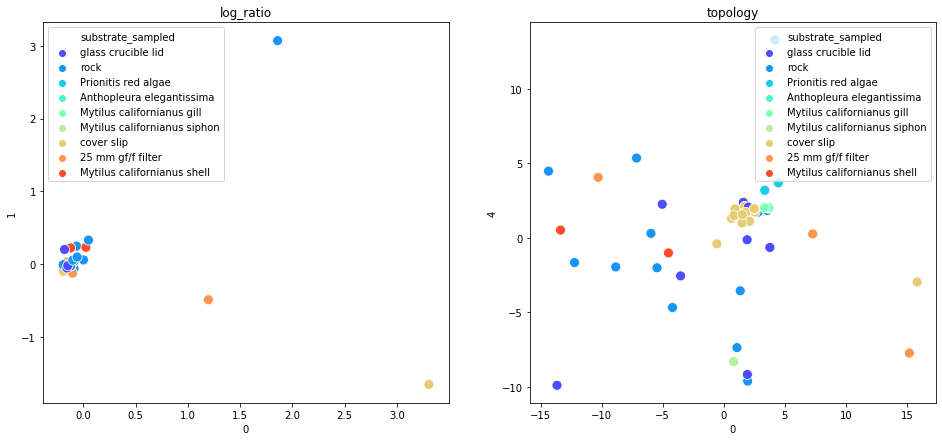

In [553]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].set_title('log_ratio')
sns.scatterplot(x=merged_pc_662_dicoda_embedding_log_df[0], 
                y=merged_pc_662_dicoda_embedding_log_df[1], 
                data = merged_pc_662_dicoda_embedding_log_df, hue='substrate_sampled', 
                ax=axes[0], palette='rainbow', s=100)
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_662_dicoda_embedding_topo_df[0], 
                y=merged_pc_662_dicoda_embedding_topo_df[4], 
                data = merged_pc_662_dicoda_embedding_topo_df, hue='substrate_sampled', 
                ax=axes[1], palette='rainbow', s=100)

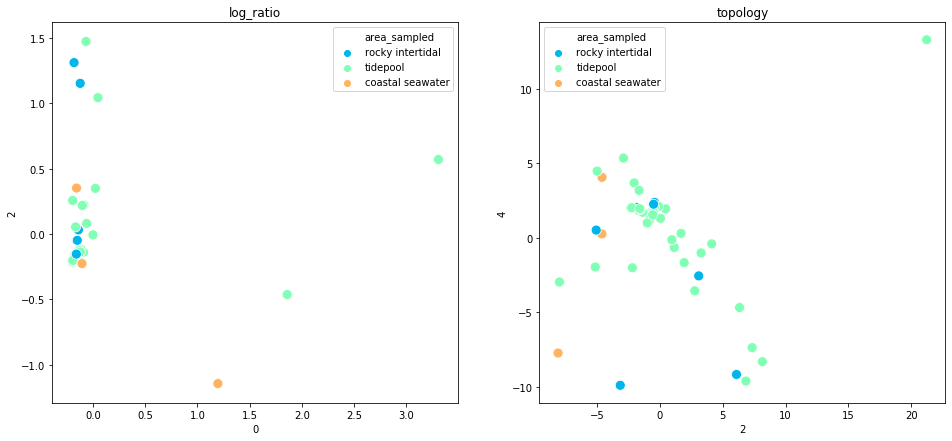

In [554]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].set_title('log_ratio')
sns.scatterplot(x=merged_pc_662_dicoda_embedding_log_df[0], 
                y=merged_pc_662_dicoda_embedding_log_df[2], 
                data = merged_pc_662_dicoda_embedding_log_df, hue='area_sampled', 
                ax=axes[0], palette='rainbow', s=100)
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_662_dicoda_embedding_topo_df[2], 
                y=merged_pc_662_dicoda_embedding_topo_df[4], 
                data = merged_pc_662_dicoda_embedding_topo_df, hue='area_sampled', 
                ax=axes[1], palette='rainbow', s=100)

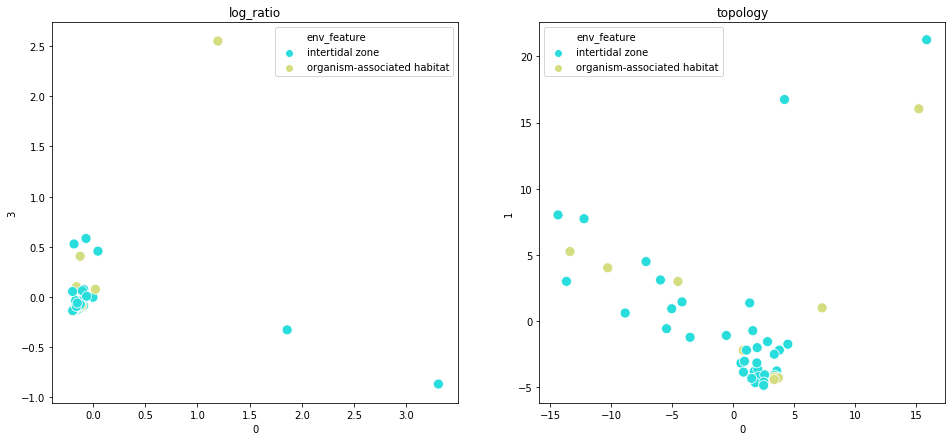

In [555]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].set_title('log_ratio')
sns.scatterplot(x=merged_pc_662_dicoda_embedding_log_df[0], 
                y=merged_pc_662_dicoda_embedding_log_df[3], 
                data = merged_pc_662_dicoda_embedding_log_df, hue='env_feature', 
                ax=axes[0], palette='rainbow', s=100)
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_662_dicoda_embedding_topo_df[0], 
                y=merged_pc_662_dicoda_embedding_topo_df[1], 
                data = merged_pc_662_dicoda_embedding_topo_df, hue='env_feature', 
                ax=axes[1], palette='rainbow', s=100)

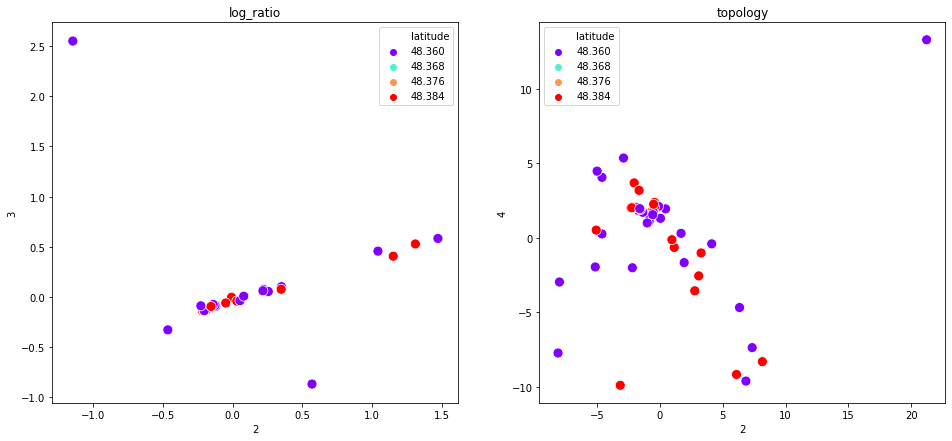

In [556]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].set_title('log_ratio')
sns.scatterplot(x=merged_pc_662_dicoda_embedding_log_df[2], 
                y=merged_pc_662_dicoda_embedding_log_df[3], 
                data = merged_pc_662_dicoda_embedding_log_df, hue='latitude', 
                ax=axes[0], palette='rainbow', s=100)
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_662_dicoda_embedding_topo_df[2], 
                y=merged_pc_662_dicoda_embedding_topo_df[4], 
                data = merged_pc_662_dicoda_embedding_topo_df, hue='latitude', 
                ax=axes[1], palette='rainbow', s=100)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: Degrees of freedom <= 0 for slice
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: Degrees of freedom <= 0 for slice


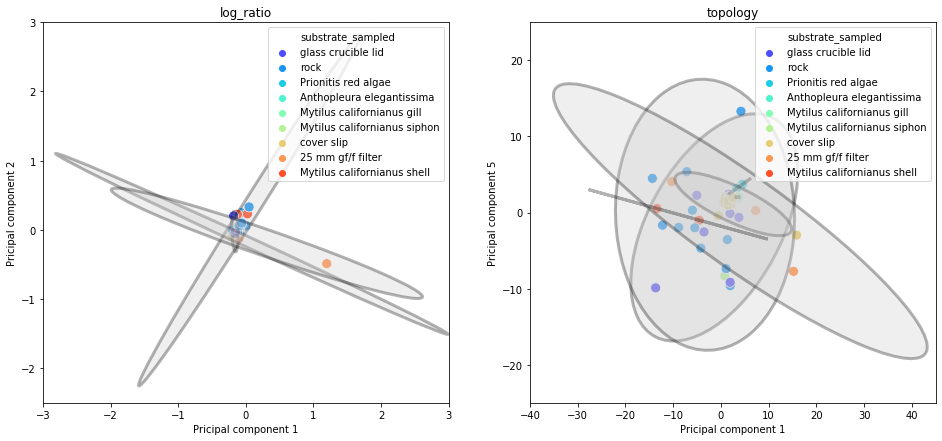

In [559]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
substrate_sampled = list(merged_pc_662_dicoda_embedding_log_df['substrate_sampled'].unique())

axes[0].set_title('log_ratio')
axes[1].set_title("topology")

sns.scatterplot(x=merged_pc_662_dicoda_embedding_log_df[0], 
                y=merged_pc_662_dicoda_embedding_log_df[1], 
                data = merged_pc_662_dicoda_embedding_log_df, hue='substrate_sampled', 
                ax=axes[0], palette='rainbow', s=100)

sns.scatterplot(x=merged_pc_662_dicoda_embedding_topo_df[0], 
                y=merged_pc_662_dicoda_embedding_topo_df[4], 
                data = merged_pc_662_dicoda_embedding_topo_df, hue='substrate_sampled', 
                ax=axes[1], palette='rainbow', s=100)

for category in substrate_sampled:
    log_data = merged_pc_662_dicoda_embedding_log_df[merged_pc_662_dicoda_embedding_log_df['substrate_sampled']==category]
    topo_data = merged_pc_662_dicoda_embedding_topo_df[merged_pc_662_dicoda_embedding_topo_df['substrate_sampled']==category]
    log_x_mean = np.mean(log_data[0])
    log_y_mean = np.mean(log_data[1])
    topo_x_mean = np.mean(topo_data[0])
    topo_y_mean = np.mean(topo_data[4])
    
    log_cov = np.cov(log_data[0], log_data[1])
    topo_cov = np.cov(topo_data[0], topo_data[4])
    
    log_e = get_cov_ellipse(log_cov, (log_x_mean, log_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    topo_e = get_cov_ellipse(topo_cov, (topo_x_mean, topo_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)

axes[0].set_xlim(-3, 3)
axes[0].set_ylim(-2.5,3)
axes[1].set_xlim(-40, 45)
axes[1].set_ylim(-25, 25)

axes[0].set_xlabel('Pricipal component 1')
axes[0].set_ylabel('Pricipal component 2')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 1')
axes[1].set_ylabel('Pricipal component 5')
axes[1].legend(loc='upper right', scatterpoints=1)

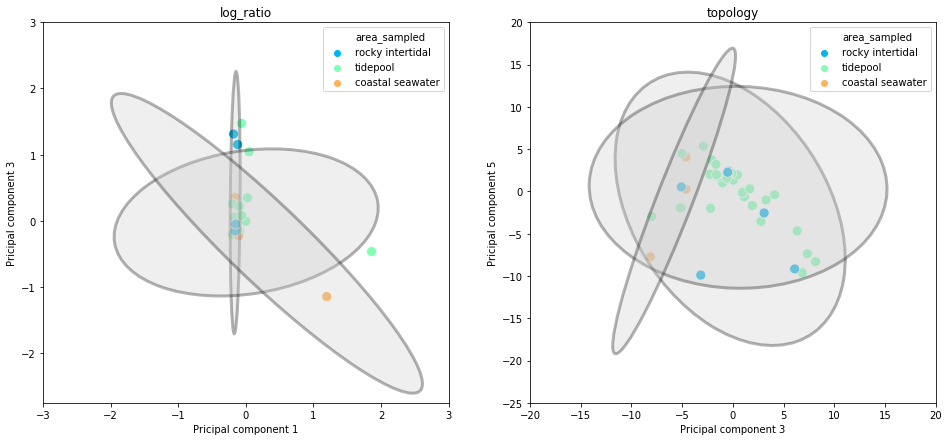

In [562]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
area_sampled = list(merged_pc_662_dicoda_embedding_log_df['area_sampled'].unique())

axes[0].set_title('log_ratio')
axes[1].set_title("topology")

sns.scatterplot(x=merged_pc_662_dicoda_embedding_log_df[0], 
                y=merged_pc_662_dicoda_embedding_log_df[2], 
                data = merged_pc_662_dicoda_embedding_log_df, hue='area_sampled', 
                ax=axes[0], palette='rainbow', s=100)

sns.scatterplot(x=merged_pc_662_dicoda_embedding_topo_df[2], 
                y=merged_pc_662_dicoda_embedding_topo_df[4], 
                data = merged_pc_662_dicoda_embedding_topo_df, hue='area_sampled', 
                ax=axes[1], palette='rainbow', s=100)

for category in area_sampled:
    log_data = merged_pc_662_dicoda_embedding_log_df[merged_pc_662_dicoda_embedding_log_df['area_sampled']==category]
    topo_data = merged_pc_662_dicoda_embedding_topo_df[merged_pc_662_dicoda_embedding_topo_df['area_sampled']==category]
    log_x_mean = np.mean(log_data[0])
    log_y_mean = np.mean(log_data[2])
    topo_x_mean = np.mean(topo_data[2])
    topo_y_mean = np.mean(topo_data[4])
    
    log_cov = np.cov(log_data[0], log_data[2])
    topo_cov = np.cov(topo_data[2], topo_data[4])
    
    log_e = get_cov_ellipse(log_cov, (log_x_mean, log_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    topo_e = get_cov_ellipse(topo_cov, (topo_x_mean, topo_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)

axes[0].set_xlim(-3, 3)
axes[0].set_ylim(-2.75,3)
axes[1].set_xlim(-20, 20)
axes[1].set_ylim(-25, 20)

axes[0].set_xlabel('Pricipal component 1')
axes[0].set_ylabel('Pricipal component 3')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 3')
axes[1].set_ylabel('Pricipal component 5')
axes[1].legend(loc='upper right', scatterpoints=1)

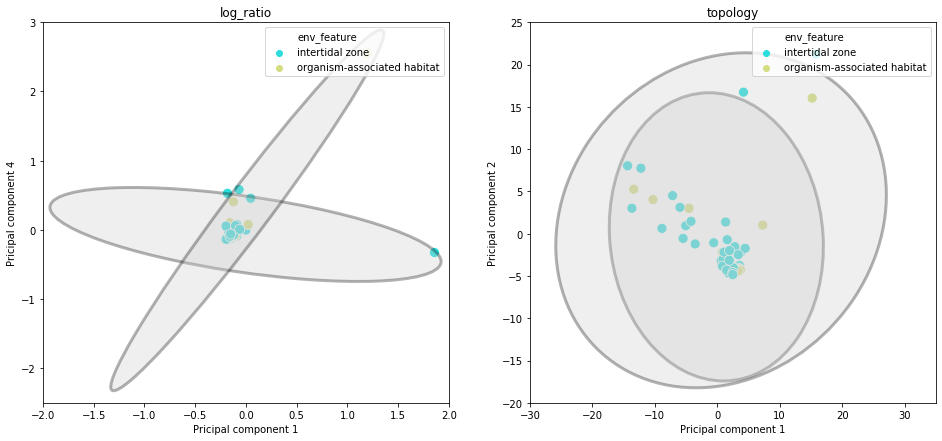

In [565]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
env_feature = list(merged_pc_662_dicoda_embedding_log_df['env_feature'].unique())

axes[0].set_title('log_ratio')
axes[1].set_title("topology")

sns.scatterplot(x=merged_pc_662_dicoda_embedding_log_df[0], 
                y=merged_pc_662_dicoda_embedding_log_df[3], 
                data = merged_pc_662_dicoda_embedding_log_df, hue='env_feature', 
                ax=axes[0], palette='rainbow', s=100)

sns.scatterplot(x=merged_pc_662_dicoda_embedding_topo_df[0], 
                y=merged_pc_662_dicoda_embedding_topo_df[1], 
                data = merged_pc_662_dicoda_embedding_topo_df, hue='env_feature', 
                ax=axes[1], palette='rainbow', s=100)

for category in env_feature:
    log_data = merged_pc_662_dicoda_embedding_log_df[merged_pc_662_dicoda_embedding_log_df['env_feature']==category]
    topo_data = merged_pc_662_dicoda_embedding_topo_df[merged_pc_662_dicoda_embedding_topo_df['env_feature']==category]
    log_x_mean = np.mean(log_data[0])
    log_y_mean = np.mean(log_data[3])
    topo_x_mean = np.mean(topo_data[0])
    topo_y_mean = np.mean(topo_data[1])
    
    log_cov = np.cov(log_data[0], log_data[3])
    topo_cov = np.cov(topo_data[0], topo_data[1])
    
    log_e = get_cov_ellipse(log_cov, (log_x_mean, log_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    topo_e = get_cov_ellipse(topo_cov, (topo_x_mean, topo_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)

axes[0].set_xlim(-2, 2)
axes[0].set_ylim(-2.5,3)
axes[1].set_xlim(-30, 35)
axes[1].set_ylim(-20, 25)

axes[0].set_xlabel('Pricipal component 1')
axes[0].set_ylabel('Pricipal component 4')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 1')
axes[1].set_ylabel('Pricipal component 2')
axes[1].legend(loc='upper right', scatterpoints=1)

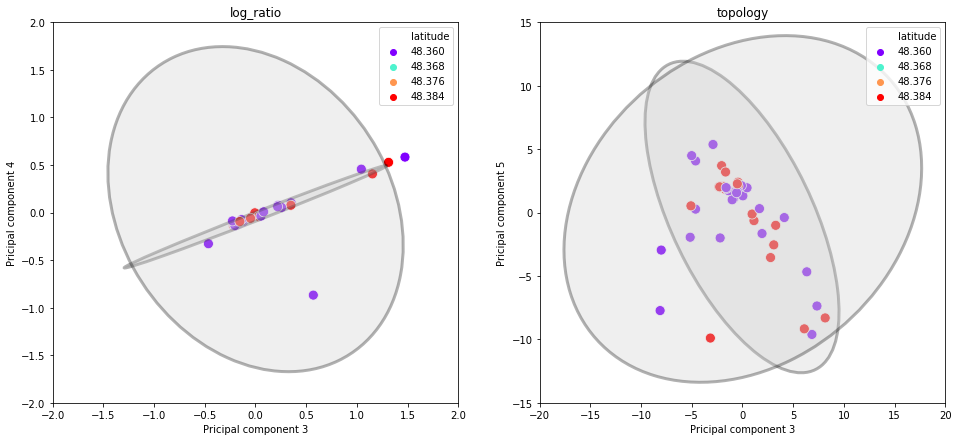

In [567]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
latitude = list(merged_pc_662_dicoda_embedding_log_df['latitude'].unique())

axes[0].set_title('log_ratio')
axes[1].set_title("topology")

sns.scatterplot(x=merged_pc_662_dicoda_embedding_log_df[2], 
                y=merged_pc_662_dicoda_embedding_log_df[3], 
                data = merged_pc_662_dicoda_embedding_log_df, hue='latitude', 
                ax=axes[0], palette='rainbow', s=100)

sns.scatterplot(x=merged_pc_662_dicoda_embedding_topo_df[2], 
                y=merged_pc_662_dicoda_embedding_topo_df[4], 
                data = merged_pc_662_dicoda_embedding_topo_df, hue='latitude', 
                ax=axes[1], palette='rainbow', s=100)

for category in latitude:
    log_data = merged_pc_662_dicoda_embedding_log_df[merged_pc_662_dicoda_embedding_log_df['latitude']==category]
    topo_data = merged_pc_662_dicoda_embedding_topo_df[merged_pc_662_dicoda_embedding_topo_df['latitude']==category]
    log_x_mean = np.mean(log_data[2])
    log_y_mean = np.mean(log_data[3])
    topo_x_mean = np.mean(topo_data[2])
    topo_y_mean = np.mean(topo_data[4])
    
    log_cov = np.cov(log_data[2], log_data[3])
    topo_cov = np.cov(topo_data[2], topo_data[4])
    
    log_e = get_cov_ellipse(log_cov, (log_x_mean, log_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    topo_e = get_cov_ellipse(topo_cov, (topo_x_mean, topo_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)

axes[0].set_xlim(-2, 2)
axes[0].set_ylim(-2,2)
axes[1].set_xlim(-20, 20)
axes[1].set_ylim(-15, 15)

axes[0].set_xlabel('Pricipal component 3')
axes[0].set_ylabel('Pricipal component 4')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 3')
axes[1].set_ylabel('Pricipal component 5')
axes[1].legend(loc='upper right', scatterpoints=1)

## Study PRJEB11496 ENA

In [568]:
rel_feature_table_11496 = pd.read_csv('rel-feature-table-PRJEB11496.tsv', sep='\t')
rel_feature_table_11496.set_index('#OTU ID', inplace=True)
rel_feature_table_11496.head()

ERR1144112  ERR1144113  ERR1144114  \
#OTU ID                                                                
0fd37bd1907b7290a345be00eea52f4f    0.000000    0.000000    0.000000   
b51805b804b6cc246d245c4337156c73    0.000153    0.003170    0.000000   
ad7cea3f47c9e64cbe5f5544c27fb1c5    0.038262    0.004982    0.035244   
a7c0e5b81d8f91d217059d6d45bb4a9c    0.018380    0.009375    0.021555   
3f1cc8a0edd0da50ade33268031fe9df    0.016333    0.002315    0.025403   

                                  ERR1144115  ERR1144116  ERR1144117  \
#OTU ID                                                                
0fd37bd1907b7290a345be00eea52f4f    0.000000    0.000000    0.000000   
b51805b804b6cc246d245c4337156c73    0.000000    0.036352    0.034680   
ad7cea3f47c9e64cbe5f5544c27fb1c5    0.024896    0.008682    0.004269   
a7c0e5b81d8f91d217059d6d45bb4a9c    0.014255    0.010490    0.007970   
3f1cc8a0edd0da50ade33268031fe9df    0.009847    0.015197    0.006608   

                                  ERR1144118  ERR1144119  ERR1144120  \
#OTU ID                                                                
0fd37bd1907b7290a345be00eea52f4f    0.000000    0.000000    0.000000   
b51805b804b6cc246d245c4337156c73    0.004864    0.035705    0.047230   
ad7cea3f47c9e64cbe5f5544c27fb1c5    0.009261    0.008861    0.005133   
a7c0e5b81d8f91d217059d6d45bb4a9c    0.008752    0.008217    0.008015   
3f1cc8a0edd0da50ade33268031fe9df    0.003643    0.013913    0.020756   

                                  ERR1144121  ...  ERR1144126  ERR1144127  \
#OTU ID                                       ...                           
0fd37bd1907b7290a345be00eea52f4f    0.000000  ...    0.060171    0.107931   
b51805b804b6cc246d245c4337156c73    0.001686  ...    0.000000    0.000000   
ad7cea3f47c9e64cbe5f5544c27fb1c5    0.010354  ...    0.006765    0.010229   
a7c0e5b81d8f91d217059d6d45bb4a9c    0.010117  ...    0.014077    0.016514   
3f1cc8a0edd0da50ade33268031fe9df    0.004201  ...    0.000000    0.000000   

                                  ERR1144128  ERR1144129  ERR1144130  \
#OTU ID                                                                
0fd37bd1907b7290a345be00eea52f4f    0.353671    0.090455    0.445159   
b51805b804b6cc246d245c4337156c73    0.000000    0.000000    0.000000   
ad7cea3f47c9e64cbe5f5544c27fb1c5    0.005702    0.004906    0.003547   
a7c0e5b81d8f91d217059d6d45bb4a9c    0.011572    0.006844    0.005312   
3f1cc8a0edd0da50ade33268031fe9df    0.000000    0.000000    0.000000   

                                  ERR1144131  ERR1144132  ERR1144133  \
#OTU ID                                                                
0fd37bd1907b7290a345be00eea52f4f    0.449914    0.571211    0.073912   
b51805b804b6cc246d245c4337156c73    0.000000    0.000000    0.000000   
ad7cea3f47c9e64cbe5f5544c27fb1c5    0.003245    0.002963    0.004863   
a7c0e5b81d8f91d217059d6d45bb4a9c    0.008883    0.008495    0.012478   
3f1cc8a0edd0da50ade33268031fe9df    0.000000    0.000000    0.000000   

                                  ERR1144134  ERR1144135  
#OTU ID                                                   
0fd37bd1907b7290a345be00eea52f4f    0.345528    0.278411  
b51805b804b6cc246d245c4337156c73    0.000000    0.000000  
ad7cea3f47c9e64cbe5f5544c27fb1c5    0.006020    0.006939  
a7c0e5b81d8f91d217059d6d45bb4a9c    0.016758    0.010602  
3f1cc8a0edd0da50ade33268031fe9df    0.000000    0.000000  

[5 rows x 24 columns]

In [569]:
metadata_11496 = pd.read_csv('Metadata_PRJEB11496.tsv', sep='\t')
rel_feature_table_11496_transpose = rel_feature_table_11496.transpose()
rel_feature_table_11496_transpose.reset_index(inplace=True)
rel_feature_table_11496_transpose.head()

#OTU ID       index  0fd37bd1907b7290a345be00eea52f4f  \
0        ERR1144112                               0.0   
1        ERR1144113                               0.0   
2        ERR1144114                               0.0   
3        ERR1144115                               0.0   
4        ERR1144116                               0.0   

#OTU ID  b51805b804b6cc246d245c4337156c73  ad7cea3f47c9e64cbe5f5544c27fb1c5  \
0                                0.000153                          0.038262   
1                                0.003170                          0.004982   
2                                0.000000                          0.035244   
3                                0.000000                          0.024896   
4                                0.036352                          0.008682   

#OTU ID  a7c0e5b81d8f91d217059d6d45bb4a9c  3f1cc8a0edd0da50ade33268031fe9df  \
0                                0.018380                          0.016333   
1                                0.009375                          0.002315   
2                                0.021555                          0.025403   
3                                0.014255                          0.009847   
4                                0.010490                          0.015197   

#OTU ID  bd704202329f8ef0e1b2266e6861ca88  e45a612e36aeaa4e8fa5d18d8f151c36  \
0                                0.019255                          0.007772   
1                                0.004234                          0.015470   
2                                0.010007                          0.002291   
3                                0.028610                          0.007178   
4                                0.007358                          0.004487   

#OTU ID  29e8ae0f8c939e1939fe1a0c2ef72098  74968ebe072e538fb82e979d8986ad5b  \
0                                0.002837                          0.001239   
1                                0.010336                          0.011180   
2                                0.002164                          0.003743   
3                                0.002723                          0.008685   
4                                0.003530                          0.000068   

#OTU ID  ...  7d139418652e90c73e343977a1652d09  \
0        ...                               0.0   
1        ...                               0.0   
2        ...                               0.0   
3        ...                               0.0   
4        ...                               0.0   

#OTU ID  a184da5c7047b642e112318742d8eb48  692ee7d08aaed815096dfdc07dfb75ad  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  94f1e6257691d7238e0b7c09365296dc  7722d7c1d8137d0c7d6f099922a216a9  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  ae4ddc78c03d4ff972b5483d8856244b  ca944e5c7b821bdf1cf53b6301db39be  \
0                                0.000002                          0.000002   
1                                0.000000                          0.000000   
2                                0.000000                          0.000000   
3                                0.000000                          0.000000   
4                                0.000000                          0.000000   

#OTU ID  8000868f9758de0ae6f2f7

In [570]:
category_metadata_11496 = metadata_11496[['#SampleID', 'site_name', 'site_id']]
category_metadata_11496.head()

#SampleID           site_name site_id
0  ERR1144112  Western Antarctica      C1
1  ERR1144113  Western Antarctica      C1
2  ERR1144114  Western Antarctica      C1
3  ERR1144115  Western Antarctica      C1
4  ERR1144116  Western Antarctica      C1

In [571]:
rel_abundance_with_category_11496 = pd.merge(rel_feature_table_11496_transpose,category_metadata_11496, left_on = 'index', right_on='#SampleID')
rel_abundance_with_category_11496.set_index('#SampleID',inplace=True)
rel_abundance_with_category_11496.drop('index',axis=1, inplace=True)
rel_abundance_with_category_11496.head()

0fd37bd1907b7290a345be00eea52f4f  \
#SampleID                                      
ERR1144112                               0.0   
ERR1144113                               0.0   
ERR1144114                               0.0   
ERR1144115                               0.0   
ERR1144116                               0.0   

            b51805b804b6cc246d245c4337156c73  \
#SampleID                                      
ERR1144112                          0.000153   
ERR1144113                          0.003170   
ERR1144114                          0.000000   
ERR1144115                          0.000000   
ERR1144116                          0.036352   

            ad7cea3f47c9e64cbe5f5544c27fb1c5  \
#SampleID                                      
ERR1144112                          0.038262   
ERR1144113                          0.004982   
ERR1144114                          0.035244   
ERR1144115                          0.024896   
ERR1144116                          0.008682   

            a7c0e5b81d8f91d217059d6d45bb4a9c  \
#SampleID                                      
ERR1144112                          0.018380   
ERR1144113                          0.009375   
ERR1144114                          0.021555   
ERR1144115                          0.014255   
ERR1144116                          0.010490   

            3f1cc8a0edd0da50ade33268031fe9df  \
#SampleID                                      
ERR1144112                          0.016333   
ERR1144113                          0.002315   
ERR1144114                          0.025403   
ERR1144115                          0.009847   
ERR1144116                          0.015197   

            bd704202329f8ef0e1b2266e6861ca88  \
#SampleID                                      
ERR1144112                          0.019255   
ERR1144113                          0.004234   
ERR1144114                          0.010007   
ERR1144115                          0.028610   
ERR1144116                          0.007358   

            e45a612e36aeaa4e8fa5d18d8f151c36  \
#SampleID                                      
ERR1144112                          0.007772   
ERR1144113                          0.015470   
ERR1144114                          0.002291   
ERR1144115                          0.007178   
ERR1144116                          0.004487   

            29e8ae0f8c939e1939fe1a0c2ef72098  \
#SampleID                                      
ERR1144112                          0.002837   
ERR1144113                          0.010336   
ERR1144114                          0.002164   
ERR1144115                          0.002723   
ERR1144116                          0.003530   

            74968ebe072e538fb82e979d8986ad5b  \
#SampleID                                      
ERR1144112                          0.001239   
ERR1144113                          0.011180   
ERR1144114                          0.003743   
ERR1144115                          0.008685   
ERR1144116                          0.000068   

            f34e6f052a17ab4cf55a0494faefbbda  ...  \
#SampleID                                     ...   
ERR1144112                          0.002658  ...   
ERR1144113                          0.005788  ...   
ERR1144114                          0.003318  ...   
ERR1144115                          0.002175  ...   
ERR1144116                          0.007211  ...   

            692ee7d08aaed815096dfdc07dfb75ad  \
#SampleID                                      
ERR1144112                               0.0   
ERR1144113                               0.0   
ERR1144114                               0.0   
ERR1144115                               0.0   
ERR1144116                               0.0   

            94f1e6257691d7238e0b7c09365296dc  \
#SampleID                                      
ERR1144112                               0.0   
ERR1144113                               0.0   
ERR1144114                               0.0   
ERR1144115                    

In [572]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
all_columns = rel_abundance_with_category_11496.columns
features = np.array(all_columns[0:len(all_columns)-2])
x_11496 = rel_abundance_with_category_11496.loc[:, features].values
scaled_x_11496 = StandardScaler().fit_transform(x_11496)
scaled_x_11496.shape
silhouette_score(scaled_x_11496, rel_abundance_with_category_11496['site_id'], 
                 metric='euclidean', sample_size=None)

0.026143927610341223

In [573]:
np.mean(scaled_x_11496), np.std(scaled_x_11496)
from sklearn.decomposition import PCA
pca_11496 = PCA(n_components=5)
principalComponents_11496 = pca_11496.fit_transform(scaled_x_11496)

principal_11496_Df = pd.DataFrame(data = principalComponents_11496)
merged_principal_11496_Df = pd.merge(principal_11496_Df,category_metadata_11496, left_index=True, right_index=True)
merged_principal_11496_Df.describe()
pca_11496.explained_variance_ratio_

array([0.08527318, 0.06958338, 0.06214935, 0.05597461, 0.05176377])

#### Silhouette value for site_name (different combinations of principal components were checked)

In [576]:
silhouette_score(principal_11496_Df[[0,1]], rel_abundance_with_category_11496['site_name'], 
                       metric='euclidean', sample_size=None)

0.3792241625983403

#### PCA plots for site_name (principal components with best silhouette score taken on x-y axis)

<Figure size 432x288 with 0 Axes>

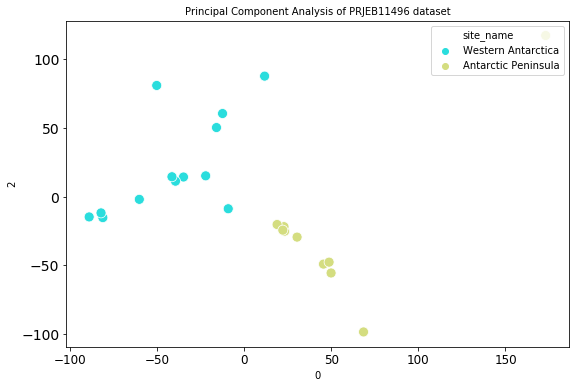

In [401]:
plt.figure()
plt.figure(figsize=(9,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title("Principal Component Analysis of PRJEB11496 dataset",fontsize=10)
sns.scatterplot(merged_principal_11496_Df[0],merged_principal_11496_Df[2], 
                data = merged_principal_11496_Df, hue = 'site_name', palette='rainbow', s=100)
plt.legend(loc='upper right')

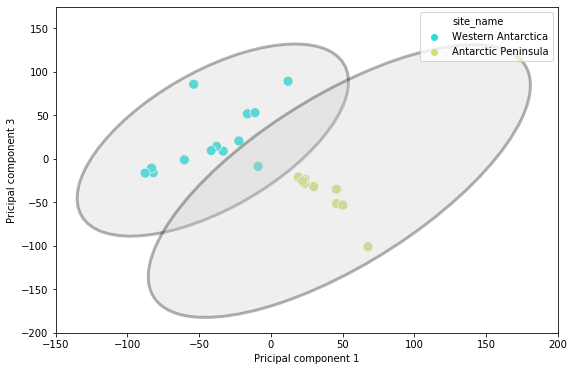

In [577]:
fig, ax = plt.subplots(figsize=(9,6))
site_name = list(merged_principal_11496_Df['site_name'].unique())

sns.scatterplot(merged_principal_11496_Df[0],merged_principal_11496_Df[2], 
                data = merged_principal_11496_Df, hue = 'site_name', palette='rainbow', s=100)

for category in site_name:
    sdata = merged_principal_11496_Df[merged_principal_11496_Df['site_name']==category]
    x_mean = np.mean(sdata[0])
    y_mean = np.mean(sdata[2])
    
    cov = np.cov(sdata[0], sdata[2])
    
    e = get_cov_ellipse(cov, (x_mean, y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    ax.add_artist(e)

ax.set_xlim(-150, 200)
ax.set_ylim(-200, 175)
ax.set_xlabel('Pricipal component 1')
ax.set_ylabel('Pricipal component 3')
ax.legend(loc='upper right', scatterpoints=1)

### DiCoDa embedding Results (Study PRJEB11496)

In [586]:
dicoda_embedding_log_11496 = pd.read_csv('PRJEB11496_z_1_log_ratio.csv', 
                                              names=rel_feature_table_11496.index)
dicoda_embedding_topo_11496 = pd.read_csv('PRJEB11496_z_1_topology.csv', 
                                             names=rel_feature_table_11496.index)
dicoda_embedding_log_11496['#SampleID'] = rel_feature_table_11496.columns
dicoda_embedding_topo_11496['#SampleID'] = rel_feature_table_11496.columns
dicoda_embedding_log_11496_category = pd.merge(dicoda_embedding_log_11496,
                                              category_metadata_11496, on='#SampleID')
dicoda_embedding_topo_11496_category = pd.merge(dicoda_embedding_topo_11496,
                                               category_metadata_11496, on='#SampleID')
dicoda_embedding_log_11496_category.dropna(axis=1, inplace=True)
dicoda_embedding_topo_11496_category.dropna(axis=1, inplace=True)

In [587]:
dicoda_embedding_log_11496_category.set_index('#SampleID', inplace=True)
dicoda_embedding_topo_11496_category.set_index('#SampleID', inplace=True)

pca_11496_dicoda_embedding_log = PCA(n_components=5)
pca_11496_dicoda_embedding_topo = PCA(n_components=5)
pc_11496_dicoda_embedding_log = pca_11496_dicoda_embedding_log.fit_transform(dicoda_embedding_log_11496_category.drop(['site_name', 'site_id'], axis=1))
pc_11496_dicoda_embedding_topo = pca_11496_dicoda_embedding_topo.fit_transform(dicoda_embedding_topo_11496_category.drop(['site_name', 'site_id'], axis=1))

pc_11496_dicoda_embedding_log_df = pd.DataFrame(data = pc_11496_dicoda_embedding_log)
merged_pc_11496_dicoda_embedding_log_df = pd.merge(pc_11496_dicoda_embedding_log_df,category_metadata_11496, left_index=True, right_index=True)
pc_11496_dicoda_embedding_topo_df = pd.DataFrame(data = pc_11496_dicoda_embedding_topo)
merged_pc_11496_dicoda_embedding_topo_df = pd.merge(pc_11496_dicoda_embedding_topo_df,category_metadata_11496, left_index=True, right_index=True)
merged_pc_11496_dicoda_embedding_log_df.set_index('#SampleID', inplace=True)
merged_pc_11496_dicoda_embedding_topo_df.set_index('#SampleID', inplace=True)
print(pca_11496_dicoda_embedding_log.explained_variance_ratio_, pca_11496_dicoda_embedding_topo.explained_variance_ratio_)

[0.21315616 0.11840599 0.08361024 0.07169977 0.0675892 ] [0.17911081 0.08777733 0.0563359  0.05168732 0.04969998]


In [589]:
dicoda_embedding_log_11496_category.head()

0fd37bd1907b7290a345be00eea52f4f  \
#SampleID                                      
ERR1144112                               0.0   
ERR1144113                               0.0   
ERR1144114                               0.0   
ERR1144115                               0.0   
ERR1144116                               0.0   

            b51805b804b6cc246d245c4337156c73  \
#SampleID                                      
ERR1144112                               0.0   
ERR1144113                               0.0   
ERR1144114                               0.0   
ERR1144115                               0.0   
ERR1144116                               0.0   

            ad7cea3f47c9e64cbe5f5544c27fb1c5  \
#SampleID                                      
ERR1144112                               0.0   
ERR1144113                               0.0   
ERR1144114                               0.0   
ERR1144115                               0.0   
ERR1144116                               0.0   

            a7c0e5b81d8f91d217059d6d45bb4a9c  \
#SampleID                                      
ERR1144112                               0.0   
ERR1144113                               0.0   
ERR1144114                               0.0   
ERR1144115                               0.0   
ERR1144116                               0.0   

            3f1cc8a0edd0da50ade33268031fe9df  \
#SampleID                                      
ERR1144112                               0.0   
ERR1144113                               0.0   
ERR1144114                               0.0   
ERR1144115                               0.0   
ERR1144116                               0.0   

            bd704202329f8ef0e1b2266e6861ca88  \
#SampleID                                      
ERR1144112                               0.0   
ERR1144113                               0.0   
ERR1144114                               0.0   
ERR1144115                               0.0   
ERR1144116                               0.0   

            e45a612e36aeaa4e8fa5d18d8f151c36  \
#SampleID                                      
ERR1144112                               0.0   
ERR1144113                               0.0   
ERR1144114                               0.0   
ERR1144115                               0.0   
ERR1144116                               0.0   

            29e8ae0f8c939e1939fe1a0c2ef72098  \
#SampleID                                      
ERR1144112                          0.000000   
ERR1144113                          0.000000   
ERR1144114                          0.000000   
ERR1144115                          0.005001   
ERR1144116                          0.003751   

            74968ebe072e538fb82e979d8986ad5b  \
#SampleID                                      
ERR1144112                               0.0   
ERR1144113                               0.0   
ERR1144114                               0.0   
ERR1144115                               0.0   
ERR1144116                               0.0   

            f34e6f052a17ab4cf55a0494faefbbda  ...  \
#SampleID                                     ...   
ERR1144112                          0.000000  ...   
ERR1144113                          0.000000  ...   
ERR1144114                          0.002767  ...   
ERR1144115                          0.000000  ...   
ERR1144116                          0.000000  ...   

            87d89048acdbc0aa86d661d379fac689  \
#SampleID                                      
ERR1144112                               0.0   
ERR1144113                               0.0   
ERR1144114                               0.0   
ERR1144115                               0.0   
ERR1144116                               0.0   

            8a406a98d26134d053f648709a632a5b  \
#SampleID                                      
ERR1144112                               0.0   
ERR1144113                               0.0   
ERR1144114                               0.0   
ERR1144115                    

#### Silhouette value after DiCoDa embedding

In [602]:
print(silhouette_score(pc_11496_dicoda_embedding_log_df[[0,3]], 
                       rel_abundance_with_category_11496['site_name'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(pc_11496_dicoda_embedding_topo_df[[0,4]], 
                       rel_abundance_with_category_11496['site_name'], 
                       metric='euclidean', sample_size=None))

0.5593064410420345 0.6183621542523753


#### PCA plots after DiCoDa embedding

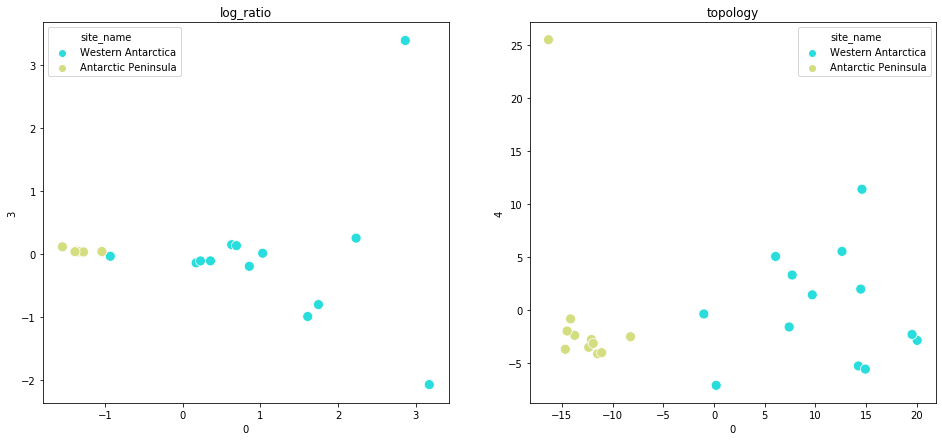

In [601]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].set_title('log_ratio')
sns.scatterplot(x=merged_pc_11496_dicoda_embedding_log_df[0], 
                y=merged_pc_11496_dicoda_embedding_log_df[3], 
                data = merged_pc_11496_dicoda_embedding_log_df, hue='site_name', 
                ax=axes[0], palette='rainbow', s=100)
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_11496_dicoda_embedding_topo_df[0], 
                y=merged_pc_11496_dicoda_embedding_topo_df[4], 
                data = merged_pc_11496_dicoda_embedding_topo_df, hue='site_name', 
                ax=axes[1], palette='rainbow', s=100)

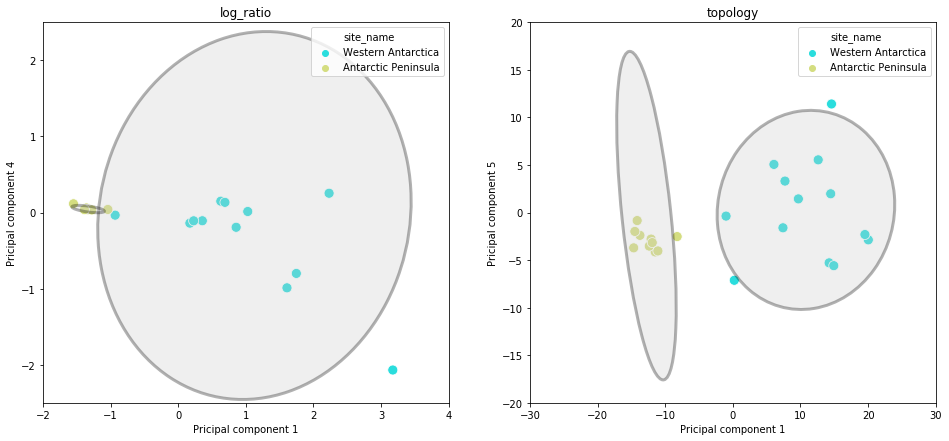

In [608]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
site_name = list(merged_pc_11496_dicoda_embedding_log_df['site_name'].unique())

axes[0].set_title('log_ratio')
axes[1].set_title('topology')

sns.scatterplot(x=merged_pc_11496_dicoda_embedding_log_df[0], 
                y=merged_pc_11496_dicoda_embedding_log_df[3], 
                data = merged_pc_11496_dicoda_embedding_log_df, hue='site_name', 
                ax=axes[0], palette='rainbow', s=100)

sns.scatterplot(x=merged_pc_11496_dicoda_embedding_topo_df[0], 
                y=merged_pc_11496_dicoda_embedding_topo_df[4], 
                data = merged_pc_11496_dicoda_embedding_topo_df, hue='site_name', 
                ax=axes[1], palette='rainbow', s=100)

for category in site_name:
    log_data = merged_pc_11496_dicoda_embedding_log_df[merged_pc_11496_dicoda_embedding_log_df['site_name']==category]
    topo_data = merged_pc_11496_dicoda_embedding_topo_df[merged_pc_11496_dicoda_embedding_topo_df['site_name']==category]
    log_x_mean = np.mean(log_data[0])
    log_y_mean = np.mean(log_data[3])
    topo_x_mean = np.mean(topo_data[0])
    topo_y_mean = np.mean(topo_data[4])
    
    log_cov = np.cov(log_data[0], log_data[3])
    topo_cov = np.cov(topo_data[0], topo_data[4])
    
    log_e = get_cov_ellipse(log_cov, (log_x_mean, log_y_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    topo_e = get_cov_ellipse(topo_cov, (topo_x_mean, topo_y_mean), 2, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)

axes[0].set_xlim(-2, 4)
axes[0].set_ylim(-2.5, 2.5)
axes[1].set_xlim(-30, 30)
axes[1].set_ylim(-20, 20)

axes[0].set_xlabel('Pricipal component 1')
axes[0].set_ylabel('Pricipal component 4')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 1')
axes[1].set_ylabel('Pricipal component 5')
axes[1].legend(loc='upper right', scatterpoints=1)

## Study PRJEB11689 ENA

In [609]:
rel_feature_table_11689 = pd.read_csv('rel-feature-table-PRJEB11689.tsv', sep='\t')
rel_feature_table_11689.set_index('#OTU ID', inplace=True)
rel_feature_table_11689.head()

ERR1111102  ERR1111103  ERR1111104  \
#OTU ID                                                                
fd0e885fd40b0b4de65f8799316bcaef         0.0         0.0         0.0   
8e6ccbb08e88e07f63cd3472762e1c9c         0.0         0.0         0.0   
2582d66440cf25acb90350b2ff4a71cc         0.0         0.0         0.0   
dbac5f0a8c79c0c6a4879ea77e1a389b         0.0         0.0         0.0   
e64afb2ca7d2f51d117d7f8cb6fe5e7c         0.0         0.0         0.0   

                                  ERR1111105  ERR1111106  ERR1111107  \
#OTU ID                                                                
fd0e885fd40b0b4de65f8799316bcaef    0.000000    0.000000    0.000000   
8e6ccbb08e88e07f63cd3472762e1c9c    0.000000    0.000000    0.000000   
2582d66440cf25acb90350b2ff4a71cc    0.000000    0.000000    0.000000   
dbac5f0a8c79c0c6a4879ea77e1a389b    0.006106    0.006065    0.006312   
e64afb2ca7d2f51d117d7f8cb6fe5e7c    0.000000    0.000000    0.000522   

                                  ERR1111108  ERR1111109  ERR1111110  \
#OTU ID                                                                
fd0e885fd40b0b4de65f8799316bcaef         0.0         0.0         0.0   
8e6ccbb08e88e07f63cd3472762e1c9c         0.0         0.0         0.0   
2582d66440cf25acb90350b2ff4a71cc         0.0         0.0         0.0   
dbac5f0a8c79c0c6a4879ea77e1a389b         0.0         0.0         0.0   
e64afb2ca7d2f51d117d7f8cb6fe5e7c         0.0         0.0         0.0   

                                  ERR1111111  ...  ERR1111130  ERR1111131  \
#OTU ID                                       ...                           
fd0e885fd40b0b4de65f8799316bcaef         0.0  ...    0.053397    0.049148   
8e6ccbb08e88e07f63cd3472762e1c9c         0.0  ...    0.024445    0.021859   
2582d66440cf25acb90350b2ff4a71cc         0.0  ...    0.019651    0.018629   
dbac5f0a8c79c0c6a4879ea77e1a389b         0.0  ...    0.007249    0.006827   
e64afb2ca7d2f51d117d7f8cb6fe5e7c         0.0  ...    0.002742    0.002814   

                                  ERR1111132  ERR1111133  ERR1111135  \
#OTU ID                                                                
fd0e885fd40b0b4de65f8799316bcaef         0.0         0.0    0.096042   
8e6ccbb08e88e07f63cd3472762e1c9c         0.0         0.0    0.058319   
2582d66440cf25acb90350b2ff4a71cc         0.0         0.0    0.037965   
dbac5f0a8c79c0c6a4879ea77e1a389b         0.0         0.0    0.050466   
e64afb2ca7d2f51d117d7f8cb6fe5e7c         0.0         0.0    0.038923   

                                  ERR1111136  ERR1111137  ERR1111138  \
#OTU ID                                                                
fd0e885fd40b0b4de65f8799316bcaef    0.080778    0.094899         0.0   
8e6ccbb08e88e07f63cd3472762e1c9c    0.062648    0.048238         0.0   
2582d66440cf25acb90350b2ff4a71cc    0.038792    0.036497         0.0   
dbac5f0a8c79c0c6a4879ea77e1a389b    0.037156    0.039395         0.0   
e64afb2ca7d2f51d117d7f8cb6fe5e7c    0.035614    0.035821         0.0   

                                  ERR1111139  ERR1111140  
#OTU ID                                                   
fd0e885fd40b0b4de65f8799316bcaef         0.0         0.0  
8e6ccbb08e88e07f63cd3472762e1c9c         0.0         0.0  
2582d66440cf25acb90350b2ff4a71cc         0.0         0.0  
dbac5f0a8c79c0c6a4879ea77e1a389b         0.0         0.0  
e64afb2ca7d2f51d117d7f8cb6fe5e7c         0.0         0.0  

[5 rows x 37 columns]

In [610]:
metadata_11689 = pd.read_csv('Metadata_PRJEB11689.tsv', sep='\t')
metadata_11689['sample_region'] = [x.split('_')[0] for x in list(metadata_11689['sample_title'])]
metadata_11689.head()
rel_feature_table_11689_transpose = rel_feature_table_11689.transpose()
rel_feature_table_11689_transpose.reset_index(inplace=True)
rel_feature_table_11689_transpose.head()

#OTU ID       index  fd0e885fd40b0b4de65f8799316bcaef  \
0        ERR1111102                               0.0   
1        ERR1111103                               0.0   
2        ERR1111104                               0.0   
3        ERR1111105                               0.0   
4        ERR1111106                               0.0   

#OTU ID  8e6ccbb08e88e07f63cd3472762e1c9c  2582d66440cf25acb90350b2ff4a71cc  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  dbac5f0a8c79c0c6a4879ea77e1a389b  e64afb2ca7d2f51d117d7f8cb6fe5e7c  \
0                                0.000000                               0.0   
1                                0.000000                               0.0   
2                                0.000000                               0.0   
3                                0.006106                               0.0   
4                                0.006065                               0.0   

#OTU ID  3f964b178605207ec32a51655d8de83e  d643cea99036e0d176323da90ff0a74e  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  d1316b26e5350da36e6456499ecdfe18  3a7955cd408d0a5afd89184a32229416  \
0                                0.004753                               0.0   
1                                0.002499                               0.0   
2                                0.004013                               0.0   
3                                0.003717                               0.0   
4                                0.000000                               0.0   

#OTU ID  ...  fa72c33dc9f447c1e15f91c10c90196f  \
0        ...                               0.0   
1        ...                               0.0   
2        ...                               0.0   
3        ...                               0.0   
4        ...                               0.0   

#OTU ID  f2ee97305b29aaf07c8194fcb79bac1e  b579981c0299b31ff14f17ea8ac5aa43  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  ac3c0d17a168d496a6295d26b166ad97  8e5a37ac542435b33f8cc22bbbfbf996  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  779e50fc8a372654161db34d8fcbd2bd  ca7f7b684a7856cbc2266a3171a8f2ba  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  27a7096a8a342a81c823c9

In [611]:
category_metadata_11689 = metadata_11689[['#SampleID', 'sample_title', 'sample_region']]
category_metadata_11689.head()

#SampleID sample_title sample_region
0  ERR1111102      iceland       iceland
1  ERR1111103      iceland       iceland
2  ERR1111104      iceland       iceland
3  ERR1111105     Trinidad      Trinidad
4  ERR1111106     Trinidad      Trinidad

In [612]:
rel_abundance_with_category_11689 = pd.merge(rel_feature_table_11689_transpose,category_metadata_11689, left_on = 'index', right_on='#SampleID')
rel_abundance_with_category_11689.set_index('#SampleID',inplace=True)
rel_abundance_with_category_11689.drop('index',axis=1, inplace=True)
rel_abundance_with_category_11689.head()

fd0e885fd40b0b4de65f8799316bcaef  \
#SampleID                                      
ERR1111102                               0.0   
ERR1111103                               0.0   
ERR1111104                               0.0   
ERR1111105                               0.0   
ERR1111106                               0.0   

            8e6ccbb08e88e07f63cd3472762e1c9c  \
#SampleID                                      
ERR1111102                               0.0   
ERR1111103                               0.0   
ERR1111104                               0.0   
ERR1111105                               0.0   
ERR1111106                               0.0   

            2582d66440cf25acb90350b2ff4a71cc  \
#SampleID                                      
ERR1111102                               0.0   
ERR1111103                               0.0   
ERR1111104                               0.0   
ERR1111105                               0.0   
ERR1111106                               0.0   

            dbac5f0a8c79c0c6a4879ea77e1a389b  \
#SampleID                                      
ERR1111102                          0.000000   
ERR1111103                          0.000000   
ERR1111104                          0.000000   
ERR1111105                          0.006106   
ERR1111106                          0.006065   

            e64afb2ca7d2f51d117d7f8cb6fe5e7c  \
#SampleID                                      
ERR1111102                               0.0   
ERR1111103                               0.0   
ERR1111104                               0.0   
ERR1111105                               0.0   
ERR1111106                               0.0   

            3f964b178605207ec32a51655d8de83e  \
#SampleID                                      
ERR1111102                               0.0   
ERR1111103                               0.0   
ERR1111104                               0.0   
ERR1111105                               0.0   
ERR1111106                               0.0   

            d643cea99036e0d176323da90ff0a74e  \
#SampleID                                      
ERR1111102                               0.0   
ERR1111103                               0.0   
ERR1111104                               0.0   
ERR1111105                               0.0   
ERR1111106                               0.0   

            d1316b26e5350da36e6456499ecdfe18  \
#SampleID                                      
ERR1111102                          0.004753   
ERR1111103                          0.002499   
ERR1111104                          0.004013   
ERR1111105                          0.003717   
ERR1111106                          0.000000   

            3a7955cd408d0a5afd89184a32229416  \
#SampleID                                      
ERR1111102                               0.0   
ERR1111103                               0.0   
ERR1111104                               0.0   
ERR1111105                               0.0   
ERR1111106                               0.0   

            326dc7c05781ad276b807bbd2eadd84e  ...  \
#SampleID                                     ...   
ERR1111102                               0.0  ...   
ERR1111103                               0.0  ...   
ERR1111104                               0.0  ...   
ERR1111105                               0.0  ...   
ERR1111106                               0.0  ...   

            b579981c0299b31ff14f17ea8ac5aa43  \
#SampleID                                      
ERR1111102                               0.0   
ERR1111103                               0.0   
ERR1111104                               0.0   
ERR1111105                               0.0   
ERR1111106                               0.0   

            ac3c0d17a168d496a6295d26b166ad97  \
#SampleID                                      
ERR1111102                               0.0   
ERR1111103                               0.0   
ERR1111104                               0.0   
ERR1111105                    

In [613]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
all_columns = rel_abundance_with_category_11689.columns
features = np.array(all_columns[0:len(all_columns)-2])
x_11689 = rel_abundance_with_category_11689.loc[:, features].values
scaled_x_11689 = StandardScaler().fit_transform(x_11689)
scaled_x_11689.shape

(37, 34782)

In [614]:
np.mean(scaled_x_11689), np.std(scaled_x_11689)
from sklearn.decomposition import PCA
pca_11689 = PCA(n_components=5)
principalComponents_11689 = pca_11689.fit_transform(scaled_x_11689)

principal_11689_Df = pd.DataFrame(data = principalComponents_11689)
merged_principal_11689_Df = pd.merge(principal_11689_Df,category_metadata_11689, left_index=True, right_index=True)
merged_principal_11689_Df.describe()
pca_11689.explained_variance_ratio_

array([0.07100959, 0.06678902, 0.05687486, 0.0521464 , 0.05007293])

#### Silhouette values for different metadata categories (different combinations of principal components checked)

In [624]:
silhouette_score(principal_11689_Df[[0,3]], rel_abundance_with_category_11689['sample_title'], 
                       metric='euclidean', sample_size=None)

0.28025709629523343

In [625]:
silhouette_score(principal_11689_Df[[0,3]], rel_abundance_with_category_11689['sample_region'], 
                       metric='euclidean', sample_size=None)

0.11998262444514027

#### PCA plots for different metadata categories (principal components with best silhouette score taken on x-y axis)

<Figure size 432x288 with 0 Axes>

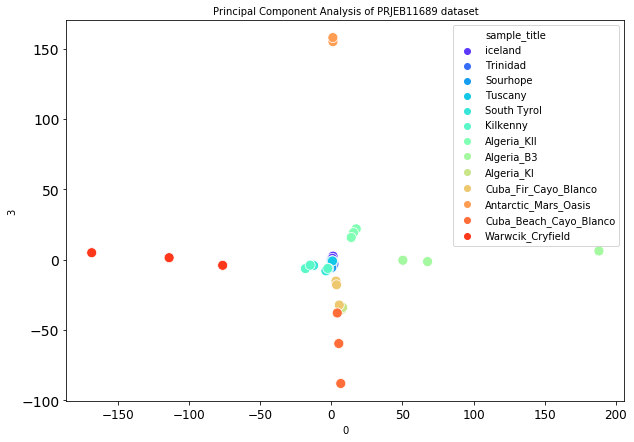

In [629]:
plt.figure()
plt.figure(figsize=(10,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title("Principal Component Analysis of PRJEB11689 dataset",fontsize=10)
sns.scatterplot(merged_principal_11689_Df[0],merged_principal_11689_Df[3], 
                data = merged_principal_11689_Df, hue = 'sample_title', palette='rainbow', s=100)
#plt.legend(loc='upper right')

<Figure size 432x288 with 0 Axes>

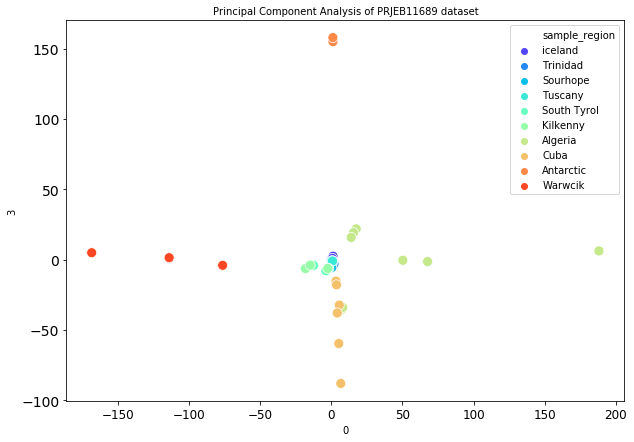

In [630]:
plt.figure()
plt.figure(figsize=(10,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=10)
plt.ylabel('Principal Component - 2',fontsize=10)
plt.title("Principal Component Analysis of PRJEB11689 dataset",fontsize=10)
sns.scatterplot(merged_principal_11689_Df[0],merged_principal_11689_Df[3], 
                data = merged_principal_11689_Df, hue = 'sample_region', palette='rainbow', s=100)
plt.legend(loc='upper right')

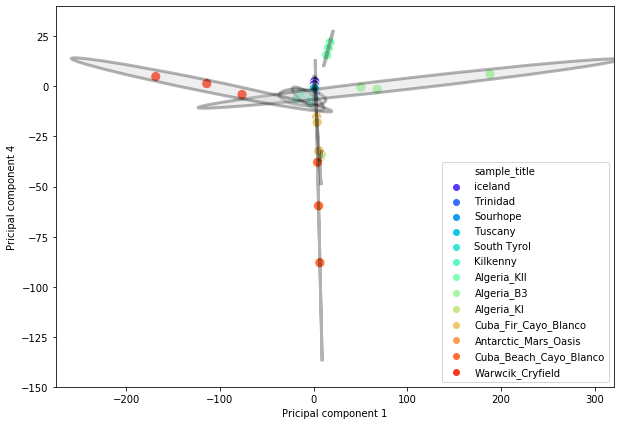

In [635]:
fig, ax = plt.subplots(figsize=(10,7))
sample_title = list(merged_principal_11689_Df['sample_title'].unique())

sns.scatterplot(merged_principal_11689_Df[0],merged_principal_11689_Df[3], 
                data = merged_principal_11689_Df, hue = 'sample_title', palette='rainbow', s=100)

for category in sample_title:
    sdata = merged_principal_11689_Df[merged_principal_11689_Df['sample_title']==category]
    x_mean = np.mean(sdata[0])
    y_mean = np.mean(sdata[3])
    
    cov = np.cov(sdata[0], sdata[3])
    e = get_cov_ellipse(cov, (x_mean, y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    ax.add_artist(e)

ax.set_xlim(-275, 320)
ax.set_ylim(-150, 40)
ax.set_xlabel('Pricipal component 1')
ax.set_ylabel('Pricipal component 4')
ax.legend(loc='lower right', scatterpoints=1)

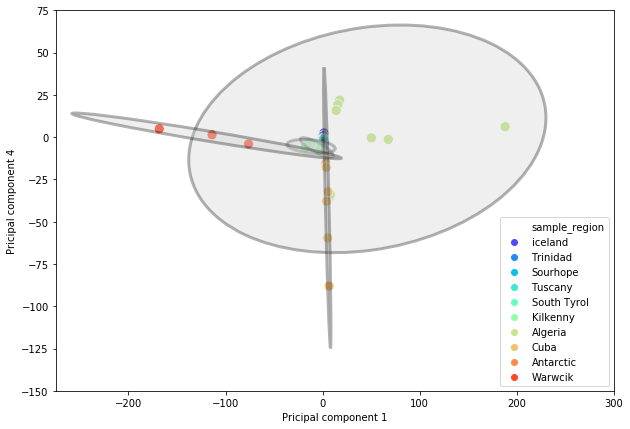

In [638]:
fig, ax = plt.subplots(figsize=(10,7))
sample_region = list(merged_principal_11689_Df['sample_region'].unique())

sns.scatterplot(merged_principal_11689_Df[0],merged_principal_11689_Df[3], 
                data = merged_principal_11689_Df, hue = 'sample_region', palette='rainbow', s=100)

for category in sample_region:
    sdata = merged_principal_11689_Df[merged_principal_11689_Df['sample_region']==category]
    x_mean = np.mean(sdata[0])
    y_mean = np.mean(sdata[3])
    
    cov = np.cov(sdata[0], sdata[3])
    e = get_cov_ellipse(cov, (x_mean, y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    ax.add_artist(e)

ax.set_xlim(-275, 300)
ax.set_ylim(-150, 75)
ax.set_xlabel('Pricipal component 1')
ax.set_ylabel('Pricipal component 4')
ax.legend(loc='lower right', scatterpoints=1)

### DiCoDa embedding Results (Study PRJEB11689)

In [639]:
dicoda_embedding_log_11689 = pd.read_csv('PRJEB11689_z_1_log_ratio.csv', 
                                              names=rel_feature_table_11689.index)
dicoda_embedding_topo_11689 = pd.read_csv('PRJEB11689_z_1_topology.csv', 
                                             names=rel_feature_table_11689.index)
dicoda_embedding_log_11689['#SampleID'] = rel_feature_table_11689.columns
dicoda_embedding_topo_11689['#SampleID'] = rel_feature_table_11689.columns
dicoda_embedding_log_11689_category = pd.merge(dicoda_embedding_log_11689,
                                              category_metadata_11689, on='#SampleID')
dicoda_embedding_topo_11689_category = pd.merge(dicoda_embedding_topo_11689,
                                               category_metadata_11689, on='#SampleID')
dicoda_embedding_log_11689_category.dropna(axis=1, inplace=True)
dicoda_embedding_topo_11689_category.dropna(axis=1, inplace=True)

In [640]:
dicoda_embedding_log_11689_category.set_index('#SampleID', inplace=True)
dicoda_embedding_topo_11689_category.set_index('#SampleID', inplace=True)
dicoda_embedding_log_11689_category.head()

pca_11689_dicoda_embedding_log = PCA(n_components=5)
pca_11689_dicoda_embedding_topo = PCA(n_components=5)
pc_11689_dicoda_embedding_log = pca_11689_dicoda_embedding_log.fit_transform(dicoda_embedding_log_11689_category.drop(['sample_title', 'sample_region'], axis=1))
pc_11689_dicoda_embedding_topo = pca_11689_dicoda_embedding_topo.fit_transform(dicoda_embedding_topo_11689_category.drop(['sample_title', 'sample_region'], axis=1))

pc_11689_dicoda_embedding_log_df = pd.DataFrame(data = pc_11689_dicoda_embedding_log)
merged_pc_11689_dicoda_embedding_log_df = pd.merge(pc_11689_dicoda_embedding_log_df,category_metadata_11689, left_index=True, right_index=True)
pc_11689_dicoda_embedding_topo_df = pd.DataFrame(data = pc_11689_dicoda_embedding_topo)
merged_pc_11689_dicoda_embedding_topo_df = pd.merge(pc_11689_dicoda_embedding_topo_df,category_metadata_11689, left_index=True, right_index=True)
merged_pc_11689_dicoda_embedding_log_df.set_index('#SampleID', inplace=True)
merged_pc_11689_dicoda_embedding_topo_df.set_index('#SampleID', inplace=True)
print(pca_11689_dicoda_embedding_log.explained_variance_ratio_, pca_11689_dicoda_embedding_topo.explained_variance_ratio_)

[0.22880331 0.14719177 0.08985824 0.06770609 0.06298458] [0.1098595  0.08531281 0.0784863  0.06994112 0.05600237]


#### Silhouette values for different metadata categories after DiCoDa embedding

In [650]:
print(silhouette_score(pc_11689_dicoda_embedding_log_df[[3,4]], 
                       rel_abundance_with_category_11689['sample_title'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(pc_11689_dicoda_embedding_topo_df[[3,4]], 
                       rel_abundance_with_category_11689['sample_title'], 
                       metric='euclidean', sample_size=None))

-0.06540369071318318 0.1629148695933974


In [670]:
print(silhouette_score(pc_11689_dicoda_embedding_log_df[[0,3]], 
                       rel_abundance_with_category_11689['sample_region'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(pc_11689_dicoda_embedding_topo_df[[0,4]], 
                       rel_abundance_with_category_11689['sample_region'], 
                       metric='euclidean', sample_size=None))

0.036594948611563156 0.2837211507200302


#### PCA plots for different metadata categories after DiCoDa embedding

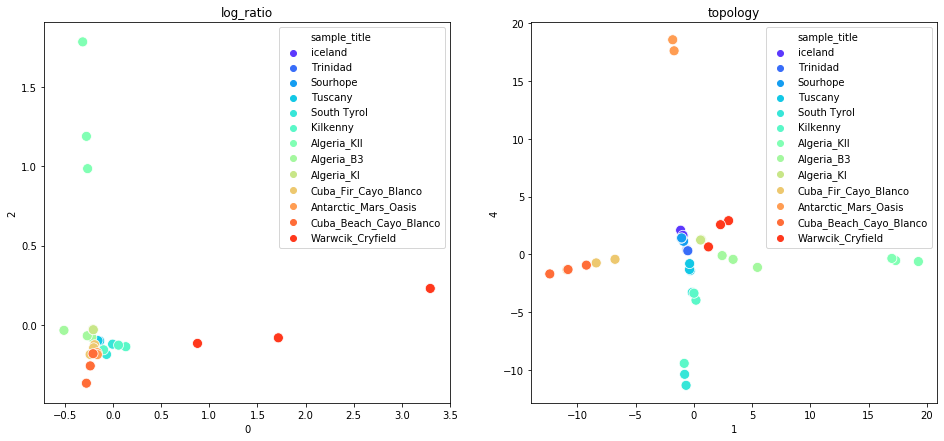

In [671]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].set_title('log_ratio')
sns.scatterplot(x=merged_pc_11689_dicoda_embedding_log_df[0], 
                y=merged_pc_11689_dicoda_embedding_log_df[2], 
                data = merged_pc_11689_dicoda_embedding_log_df, hue='sample_title', 
                ax=axes[0], palette='rainbow', s=100)
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_11689_dicoda_embedding_topo_df[1], 
                y=merged_pc_11689_dicoda_embedding_topo_df[4], 
                data = merged_pc_11689_dicoda_embedding_topo_df, hue='sample_title', 
                ax=axes[1], palette='rainbow', s=100)
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')

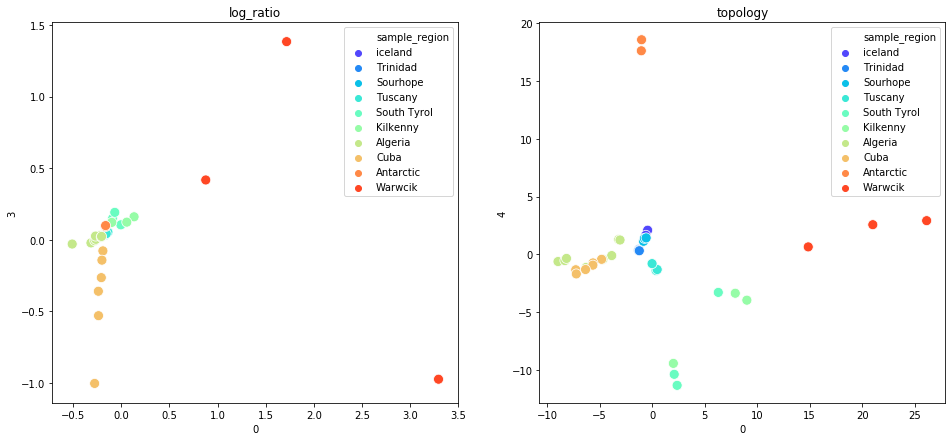

In [672]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].set_title('log_ratio')
sns.scatterplot(x=merged_pc_11689_dicoda_embedding_log_df[0], 
                y=merged_pc_11689_dicoda_embedding_log_df[3], 
                data = merged_pc_11689_dicoda_embedding_log_df, hue='sample_region', 
                ax=axes[0], palette='rainbow', s=100)
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_11689_dicoda_embedding_topo_df[0], 
                y=merged_pc_11689_dicoda_embedding_topo_df[4], 
                data = merged_pc_11689_dicoda_embedding_topo_df, hue='sample_region', 
                ax=axes[1], palette='rainbow', s=100)
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')

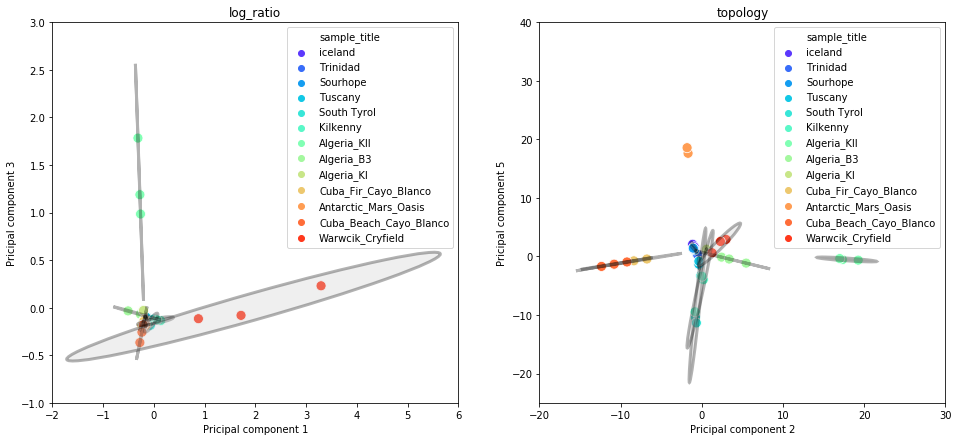

In [677]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
sample_title = list(merged_pc_11689_dicoda_embedding_log_df['sample_title'].unique())

axes[0].set_title('log_ratio')
axes[1].set_title('topology')

sns.scatterplot(x=merged_pc_11689_dicoda_embedding_log_df[0], 
                y=merged_pc_11689_dicoda_embedding_log_df[2], 
                data = merged_pc_11689_dicoda_embedding_log_df, hue='sample_title', 
                ax=axes[0], palette='rainbow', s=100)
sns.scatterplot(x=merged_pc_11689_dicoda_embedding_topo_df[1], 
                y=merged_pc_11689_dicoda_embedding_topo_df[4], 
                data = merged_pc_11689_dicoda_embedding_topo_df, hue='sample_title', 
                ax=axes[1], palette='rainbow', s=100)

for category in sample_title:
    log_data = merged_pc_11689_dicoda_embedding_log_df[merged_pc_11689_dicoda_embedding_log_df['sample_title']==category]
    topo_data = merged_pc_11689_dicoda_embedding_topo_df[merged_pc_11689_dicoda_embedding_topo_df['sample_title']==category]
    log_x_mean = np.mean(log_data[0])
    log_y_mean = np.mean(log_data[2])
    topo_x_mean = np.mean(topo_data[1])
    topo_y_mean = np.mean(topo_data[4])
    
    log_cov = np.cov(log_data[0], log_data[2])
    topo_cov = np.cov(topo_data[1], topo_data[4])
    
    log_e = get_cov_ellipse(log_cov, (log_x_mean, log_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    topo_e = get_cov_ellipse(topo_cov, (topo_x_mean, topo_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)

axes[0].set_xlim(-2, 6)
axes[0].set_ylim(-1, 3)
axes[1].set_xlim(-20, 30)
axes[1].set_ylim(-25, 40)

axes[0].set_xlabel('Pricipal component 1')
axes[0].set_ylabel('Pricipal component 3')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 2')
axes[1].set_ylabel('Pricipal component 5')
axes[1].legend(loc='upper right', scatterpoints=1)

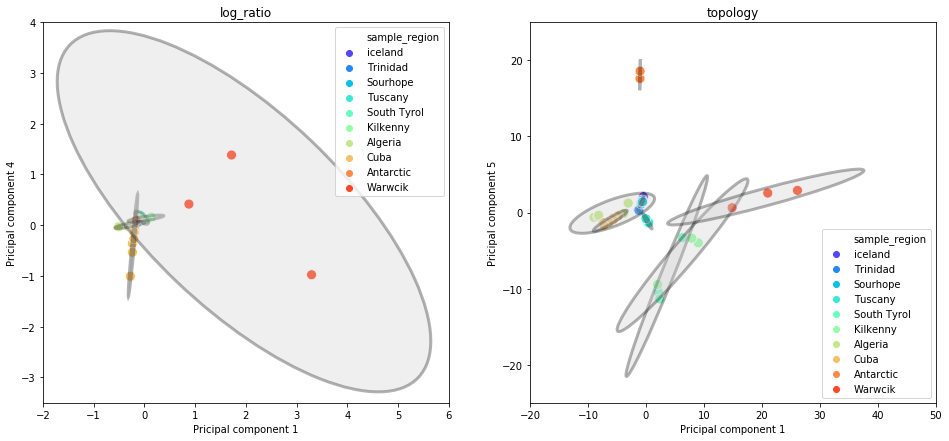

In [681]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
sample_region = list(merged_pc_11689_dicoda_embedding_log_df['sample_region'].unique())

axes[0].set_title('log_ratio')
axes[1].set_title('topology')

sns.scatterplot(x=merged_pc_11689_dicoda_embedding_log_df[0], 
                y=merged_pc_11689_dicoda_embedding_log_df[3], 
                data = merged_pc_11689_dicoda_embedding_log_df, hue='sample_region', 
                ax=axes[0], palette='rainbow', s=100)
sns.scatterplot(x=merged_pc_11689_dicoda_embedding_topo_df[0], 
                y=merged_pc_11689_dicoda_embedding_topo_df[4], 
                data = merged_pc_11689_dicoda_embedding_topo_df, hue='sample_region', 
                ax=axes[1], palette='rainbow', s=100)

for category in sample_region:
    log_data = merged_pc_11689_dicoda_embedding_log_df[merged_pc_11689_dicoda_embedding_log_df['sample_region']==category]
    topo_data = merged_pc_11689_dicoda_embedding_topo_df[merged_pc_11689_dicoda_embedding_topo_df['sample_region']==category]
    log_x_mean = np.mean(log_data[0])
    log_y_mean = np.mean(log_data[3])
    topo_x_mean = np.mean(topo_data[0])
    topo_y_mean = np.mean(topo_data[4])
    
    log_cov = np.cov(log_data[0], log_data[3])
    topo_cov = np.cov(topo_data[0], topo_data[4])
    
    log_e = get_cov_ellipse(log_cov, (log_x_mean, log_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    topo_e = get_cov_ellipse(topo_cov, (topo_x_mean, topo_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)

axes[0].set_xlim(-2, 6)
axes[0].set_ylim(-3.5, 4)
axes[1].set_xlim(-20, 50)
axes[1].set_ylim(-25, 25)

axes[0].set_xlabel('Pricipal component 1')
axes[0].set_ylabel('Pricipal component 4')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 1')
axes[1].set_ylabel('Pricipal component 5')
axes[1].legend(loc='lower right', scatterpoints=1)

## Study PRJEB15093 ENA

In [2]:
rel_feature_table_15093 = pd.read_csv('rel-feature-table-PRJEB15093.tsv', sep='\t')
rel_feature_table_15093.set_index('#OTU ID', inplace=True)
rel_feature_table_15093.head()

ERR2233229  ERR2233230  ERR2233231  \
#OTU ID                                                                
ac164649e33237f799c1ffee4f344d5d         0.0         0.0         0.0   
d509392ff84091c6dc20167e4169ec66         0.0         0.0         0.0   
1e716566f31283625b594cdbb6a02c21         0.0         0.0         0.0   
076e6e3664a7f92c3890096c31d6d23e         0.0         0.0         0.0   
61969e23b798da778708ed62bd1ec109         0.0         0.0         0.0   

                                  ERR2233232  ERR2233233  ERR2233234  \
#OTU ID                                                                
ac164649e33237f799c1ffee4f344d5d    0.122471         0.0    0.150123   
d509392ff84091c6dc20167e4169ec66    0.000000         0.0    0.000000   
1e716566f31283625b594cdbb6a02c21    0.000000         0.0    0.000000   
076e6e3664a7f92c3890096c31d6d23e    0.000000         0.0    0.000000   
61969e23b798da778708ed62bd1ec109    0.000000         0.0    0.000000   

                                  ERR2233235  ERR2233236  ERR2233237  \
#OTU ID                                                                
ac164649e33237f799c1ffee4f344d5d         0.0         0.0         0.0   
d509392ff84091c6dc20167e4169ec66         0.0         0.0         0.0   
1e716566f31283625b594cdbb6a02c21         0.0         0.0         0.0   
076e6e3664a7f92c3890096c31d6d23e         0.0         0.0         0.0   
61969e23b798da778708ed62bd1ec109         0.0         0.0         0.0   

                                  ERR2233238  ...  ERR2233317  ERR2233318  \
#OTU ID                                       ...                           
ac164649e33237f799c1ffee4f344d5d         0.0  ...         0.0         0.0   
d509392ff84091c6dc20167e4169ec66         0.0  ...         0.0         0.0   
1e716566f31283625b594cdbb6a02c21         0.0  ...         0.0         0.0   
076e6e3664a7f92c3890096c31d6d23e         0.0  ...         0.0         0.0   
61969e23b798da778708ed62bd1ec109         0.0  ...         0.0         0.0   

                                  ERR2233319  ERR2233320  ERR2233321  \
#OTU ID                                                                
ac164649e33237f799c1ffee4f344d5d         0.0         0.0         0.0   
d509392ff84091c6dc20167e4169ec66         0.0         0.0         0.0   
1e716566f31283625b594cdbb6a02c21         0.0         0.0         0.0   
076e6e3664a7f92c3890096c31d6d23e         0.0         0.0         0.0   
61969e23b798da778708ed62bd1ec109         0.0         0.0         0.0   

                                  ERR2233322  ERR2233323  ERR2233324  \
#OTU ID                                                                
ac164649e33237f799c1ffee4f344d5d    0.096154    0.066667         0.0   
d509392ff84091c6dc20167e4169ec66    0.000000    0.000000         0.0   
1e716566f31283625b594cdbb6a02c21    0.000000    0.000000         0.0   
076e6e3664a7f92c3890096c31d6d23e    0.000000    0.000000         0.0   
61969e23b798da778708ed62bd1ec109    0.000000    0.000000         0.0   

                                  ERR2233325  ERR2233326  
#OTU ID                                                   
ac164649e33237f799c1ffee4f344d5d         0.0         0.0  
d509392ff84091c6dc20167e4169ec66         0.0         0.0  
1e716566f31283625b594cdbb6a02c21         0.0         0.0  
076e6e3664a7f92c3890096c31d6d23e         0.0         0.0  
61969e23b798da778708ed62bd1ec109         0.0         0.0  

[5 rows x 98 columns]

In [3]:
metadata_15093 = pd.read_csv('Metadata_PRJEB15093.tsv', sep='\t')
metadata_15093['sample_type'] = [x.upper() for x in list(metadata_15093['sample_description'])]
metadata_15093.head()
rel_feature_table_15093_transpose = rel_feature_table_15093.transpose()
rel_feature_table_15093_transpose.reset_index(inplace=True)
rel_feature_table_15093_transpose.head()

#OTU ID       index  ac164649e33237f799c1ffee4f344d5d  \
0        ERR2233229                          0.000000   
1        ERR2233230                          0.000000   
2        ERR2233231                          0.000000   
3        ERR2233232                          0.122471   
4        ERR2233233                          0.000000   

#OTU ID  d509392ff84091c6dc20167e4169ec66  1e716566f31283625b594cdbb6a02c21  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  076e6e3664a7f92c3890096c31d6d23e  61969e23b798da778708ed62bd1ec109  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  52cc06f3ee5164463beb6eba107a3a0f  c0bcefe77f6dc874bf1c009a28d970e8  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  6ab73c4f04811cce50c13f7fe0221df5  7202fe403bae1f219c232f96e4741efd  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  ...  132d9898e2a04f8f9a8e599fb85428a9  \
0        ...                               0.0   
1        ...                               0.0   
2        ...                               0.0   
3        ...                               0.0   
4        ...                               0.0   

#OTU ID  6ff8a1489ef2b70d5008cf7c98675335  b0d771fbb237ca0c23d1ef6e83daec5c  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  559befcf731c36b8e30483cba4e110f2  46b00960a00c8615034287c01ce5c8f0  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  1a4b3cc5f6f3d0d17c3951da574451c9  b788a46f8f6871c8f01668c59ccba944  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   

#OTU ID  8282231fb99627fb0a38d1

In [4]:
category_metadata_15093 = metadata_15093[['#SampleID', 'sample_description', 'sample_type', 'site_name', 'geographic_location']]
category_metadata_15093.head()

#SampleID sample_description  sample_type site_name  \
0  ERR2233229        Worm burrow  WORM BURROW  The Eddy   
1  ERR2233230           sediment     SEDIMENT  The Eddy   
2  ERR2233231        Worm burrow  WORM BURROW  The Eddy   
3  ERR2233232        Worm burrow  WORM BURROW  The Eddy   
4  ERR2233233        Worm burrow  WORM BURROW  The Eddy   

      geographic_location  
0  Sheepscot River, Maine  
1  Sheepscot River, Maine  
2  Sheepscot River, Maine  
3  Sheepscot River, Maine  
4  Sheepscot River, Maine

In [5]:
rel_abundance_with_category_15093 = pd.merge(rel_feature_table_15093_transpose,category_metadata_15093, left_on = 'index', right_on='#SampleID')
rel_abundance_with_category_15093.set_index('#SampleID',inplace=True)
rel_abundance_with_category_15093.drop('index',axis=1, inplace=True)
rel_abundance_with_category_15093.head()

ac164649e33237f799c1ffee4f344d5d  \
#SampleID                                      
ERR2233229                          0.000000   
ERR2233230                          0.000000   
ERR2233231                          0.000000   
ERR2233232                          0.122471   
ERR2233233                          0.000000   

            d509392ff84091c6dc20167e4169ec66  \
#SampleID                                      
ERR2233229                               0.0   
ERR2233230                               0.0   
ERR2233231                               0.0   
ERR2233232                               0.0   
ERR2233233                               0.0   

            1e716566f31283625b594cdbb6a02c21  \
#SampleID                                      
ERR2233229                               0.0   
ERR2233230                               0.0   
ERR2233231                               0.0   
ERR2233232                               0.0   
ERR2233233                               0.0   

            076e6e3664a7f92c3890096c31d6d23e  \
#SampleID                                      
ERR2233229                               0.0   
ERR2233230                               0.0   
ERR2233231                               0.0   
ERR2233232                               0.0   
ERR2233233                               0.0   

            61969e23b798da778708ed62bd1ec109  \
#SampleID                                      
ERR2233229                               0.0   
ERR2233230                               0.0   
ERR2233231                               0.0   
ERR2233232                               0.0   
ERR2233233                               0.0   

            52cc06f3ee5164463beb6eba107a3a0f  \
#SampleID                                      
ERR2233229                               0.0   
ERR2233230                               0.0   
ERR2233231                               0.0   
ERR2233232                               0.0   
ERR2233233                               0.0   

            c0bcefe77f6dc874bf1c009a28d970e8  \
#SampleID                                      
ERR2233229                               0.0   
ERR2233230                               0.0   
ERR2233231                               0.0   
ERR2233232                               0.0   
ERR2233233                               0.0   

            6ab73c4f04811cce50c13f7fe0221df5  \
#SampleID                                      
ERR2233229                               0.0   
ERR2233230                               0.0   
ERR2233231                               0.0   
ERR2233232                               0.0   
ERR2233233                               0.0   

            7202fe403bae1f219c232f96e4741efd  \
#SampleID                                      
ERR2233229                               0.0   
ERR2233230                               0.0   
ERR2233231                               0.0   
ERR2233232                               0.0   
ERR2233233                               0.0   

            efacdb6e44d89e0e60627a1a3616485f  ...  \
#SampleID                                     ...   
ERR2233229                               0.0  ...   
ERR2233230                               0.0  ...   
ERR2233231                               0.0  ...   
ERR2233232                               0.0  ...   
ERR2233233                               0.0  ...   

            46b00960a00c8615034287c01ce5c8f0  \
#SampleID                                      
ERR2233229                               0.0   
ERR2233230                               0.0   
ERR2233231                               0.0   
ERR2233232                               0.0   
ERR2233233                               0.0   

            1a4b3cc5f6f3d0d17c3951da574451c9  \
#SampleID                                      
ERR2233229                               0.0   
ERR2233230                               0.0   
ERR2233231                               0.0   
ERR2233232                    

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
all_columns = rel_abundance_with_category_15093.columns
features = np.array(all_columns[0:len(all_columns)-4])
x_15093 = rel_abundance_with_category_15093.loc[:, features].values
scaled_x_15093 = StandardScaler().fit_transform(x_15093)
scaled_x_15093.shape

(98, 28099)

In [7]:
np.mean(scaled_x_15093), np.std(scaled_x_15093)
from sklearn.decomposition import PCA
pca_15093 = PCA(n_components=5)
principalComponents_15093 = pca_15093.fit_transform(scaled_x_15093)

principal_15093_Df = pd.DataFrame(data = principalComponents_15093)
merged_principal_15093_Df = pd.merge(principal_15093_Df,category_metadata_15093, left_index=True, right_index=True)
merged_principal_15093_Df.describe()
pca_15093.explained_variance_ratio_

array([0.03573442, 0.03394538, 0.02873453, 0.02487219, 0.02232547])

#### Silhouette values for different metadata categories (different combinations of principal components checked)

In [8]:
silhouette_score(principal_15093_Df[[1,2]], rel_abundance_with_category_15093['site_name'], 
                       metric='euclidean', sample_size=None)

0.2032697092099269

In [9]:
silhouette_score(principal_15093_Df[[1,2]], rel_abundance_with_category_15093['geographic_location'], 
                       metric='euclidean', sample_size=None)

0.13952414632001445

#### PCA plots for different metadata categories (principal components with best silhouette score taken on x-y axis)

<Figure size 432x288 with 0 Axes>

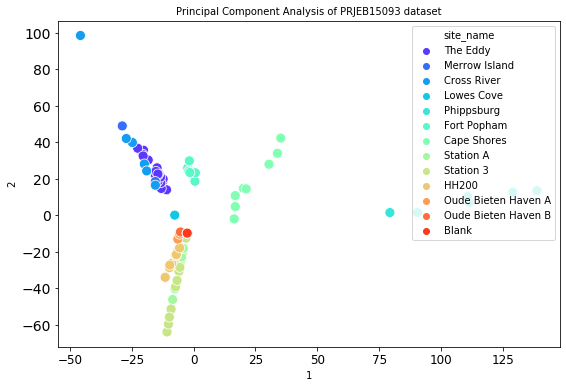

In [10]:
plt.figure()
plt.figure(figsize=(9,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title("Principal Component Analysis of PRJEB15093 dataset",fontsize=10)
sns.scatterplot(merged_principal_15093_Df[1],merged_principal_15093_Df[2], 
                data = merged_principal_15093_Df, hue = 'site_name', 
                palette='rainbow', s=100)
#plt.legend(loc='upper right')

<Figure size 432x288 with 0 Axes>

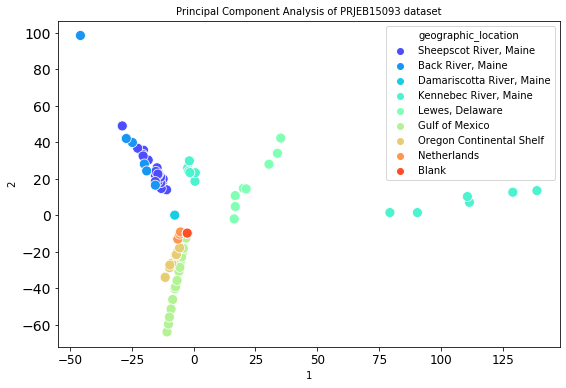

In [11]:
plt.figure()
plt.figure(figsize=(9,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title("Principal Component Analysis of PRJEB15093 dataset",fontsize=10)
sns.scatterplot(merged_principal_15093_Df[1],merged_principal_15093_Df[2], 
                data = merged_principal_15093_Df, hue = 'geographic_location', 
                palette='rainbow', s=100)
plt.legend(loc='upper right')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Degrees of freedom <= 0 for slice
  del sys.path[0]


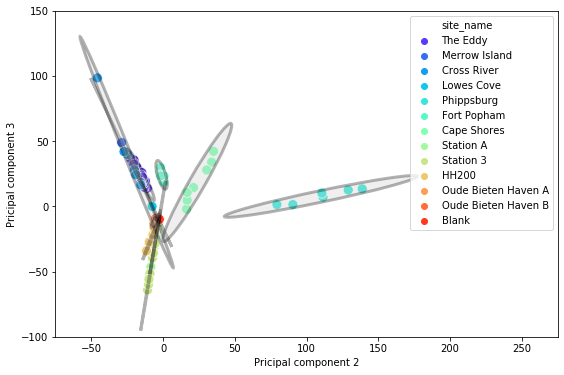

In [58]:
fig, ax = plt.subplots(figsize=(9,6))
site_name = list(merged_principal_15093_Df['site_name'].unique())

sns.scatterplot(merged_principal_15093_Df[1],merged_principal_15093_Df[2], 
                data = merged_principal_15093_Df, hue = 'site_name', 
                palette='rainbow', s=100)

for category in site_name:
    sdata = merged_principal_15093_Df[merged_principal_15093_Df['site_name']==category]
    x_mean = np.mean(sdata[1])
    y_mean = np.mean(sdata[2])
    
    cov = np.cov(sdata[1], sdata[2])

    e = get_cov_ellipse(cov, (x_mean, y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    ax.add_artist(e)

ax.set_xlim(-75, 275)
ax.set_ylim(-100, 150)
ax.set_xlabel('Pricipal component 2')
ax.set_ylabel('Pricipal component 3')
ax.legend(loc='upper right', scatterpoints=1)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Degrees of freedom <= 0 for slice
  del sys.path[0]


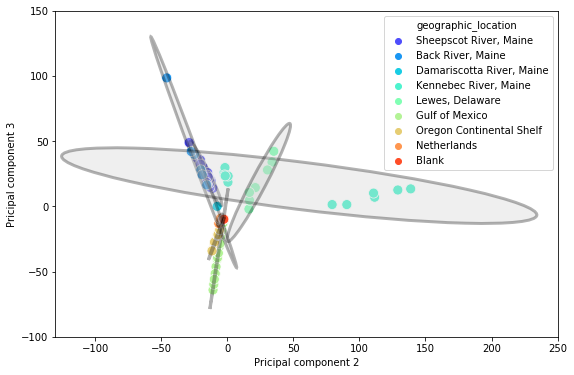

In [59]:
fig, ax = plt.subplots(figsize=(9,6))
geographic_location = list(merged_principal_15093_Df['geographic_location'].unique())

sns.scatterplot(merged_principal_15093_Df[1],merged_principal_15093_Df[2], 
                data = merged_principal_15093_Df, hue = 'geographic_location', 
                palette='rainbow', s=100)

for category in geographic_location:
    sdata = merged_principal_15093_Df[merged_principal_15093_Df['geographic_location']==category]
    x_mean = np.mean(sdata[1])
    y_mean = np.mean(sdata[2])
    
    cov = np.cov(sdata[1], sdata[2])

    e = get_cov_ellipse(cov, (x_mean, y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    ax.add_artist(e)

ax.set_xlim(-130, 250)
ax.set_ylim(-100, 150)
ax.set_xlabel('Pricipal component 2')
ax.set_ylabel('Pricipal component 3')
ax.legend(loc='upper right', scatterpoints=1)

### DiCoDa embedding Results (Study PRJEB15093)

In [13]:
dicoda_embedding_log_15093 = pd.read_csv('PRJEB15093_z_1_log_ratio.csv', 
                                              names=rel_feature_table_15093.index)
dicoda_embedding_topo_15093 = pd.read_csv('PRJEB15093_z_1_topology.csv', 
                                             names=rel_feature_table_15093.index)
dicoda_embedding_log_15093['#SampleID'] = rel_feature_table_15093.columns
dicoda_embedding_topo_15093['#SampleID'] = rel_feature_table_15093.columns
dicoda_embedding_log_15093_category = pd.merge(dicoda_embedding_log_15093,
                                              category_metadata_15093, on='#SampleID')
dicoda_embedding_topo_15093_category = pd.merge(dicoda_embedding_topo_15093,
                                               category_metadata_15093, on='#SampleID')
dicoda_embedding_log_15093_category.dropna(axis=1, inplace=True)
dicoda_embedding_topo_15093_category.dropna(axis=1, inplace=True)

In [14]:
dicoda_embedding_log_15093_category.set_index('#SampleID', inplace=True)
dicoda_embedding_topo_15093_category.set_index('#SampleID', inplace=True)
dicoda_embedding_log_15093_category.head()

pca_15093_dicoda_embedding_log = PCA(n_components=5)
pca_15093_dicoda_embedding_topo = PCA(n_components=5)
pc_15093_dicoda_embedding_log = pca_15093_dicoda_embedding_log.fit_transform(dicoda_embedding_log_15093_category.drop(['sample_description', 'sample_type', 'site_name', 'geographic_location'], axis=1))
pc_15093_dicoda_embedding_topo = pca_15093_dicoda_embedding_topo.fit_transform(dicoda_embedding_topo_15093_category.drop(['sample_description', 'sample_type', 'site_name', 'geographic_location'], axis=1))

pc_15093_dicoda_embedding_log_df = pd.DataFrame(data = pc_15093_dicoda_embedding_log)
merged_pc_15093_dicoda_embedding_log_df = pd.merge(pc_15093_dicoda_embedding_log_df,category_metadata_15093, left_index=True, right_index=True)
pc_15093_dicoda_embedding_topo_df = pd.DataFrame(data = pc_15093_dicoda_embedding_topo)
merged_pc_15093_dicoda_embedding_topo_df = pd.merge(pc_15093_dicoda_embedding_topo_df,category_metadata_15093, left_index=True, right_index=True)
merged_pc_15093_dicoda_embedding_log_df.set_index('#SampleID', inplace=True)
merged_pc_15093_dicoda_embedding_topo_df.set_index('#SampleID', inplace=True)
print(pca_15093_dicoda_embedding_log.explained_variance_ratio_, pca_15093_dicoda_embedding_topo.explained_variance_ratio_)

[0.15331842 0.08335176 0.06580924 0.044127   0.03357224] [0.14394093 0.06194923 0.05596208 0.04888199 0.03019996]


#### Silhouette value for different metadata categories after DiCoDa embedding

In [36]:
print(silhouette_score(pc_15093_dicoda_embedding_log_df[[0,2]], 
                       rel_abundance_with_category_15093['site_name'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(pc_15093_dicoda_embedding_topo_df[[1,3]], 
                       rel_abundance_with_category_15093['site_name'], 
                       metric='euclidean', sample_size=None))

0.23519038330604167 0.3213403777729827


In [34]:
print(silhouette_score(pc_15093_dicoda_embedding_log_df[[0,2]], 
                       rel_abundance_with_category_15093['geographic_location'], 
                       metric='euclidean', sample_size=None), 
      silhouette_score(pc_15093_dicoda_embedding_topo_df[[1,3]], 
                       rel_abundance_with_category_15093['geographic_location'], 
                       metric='euclidean', sample_size=None))

-0.06650737970919791 0.041308193604913314


#### PCA plots for different metadata categories after DiCoDa embedding

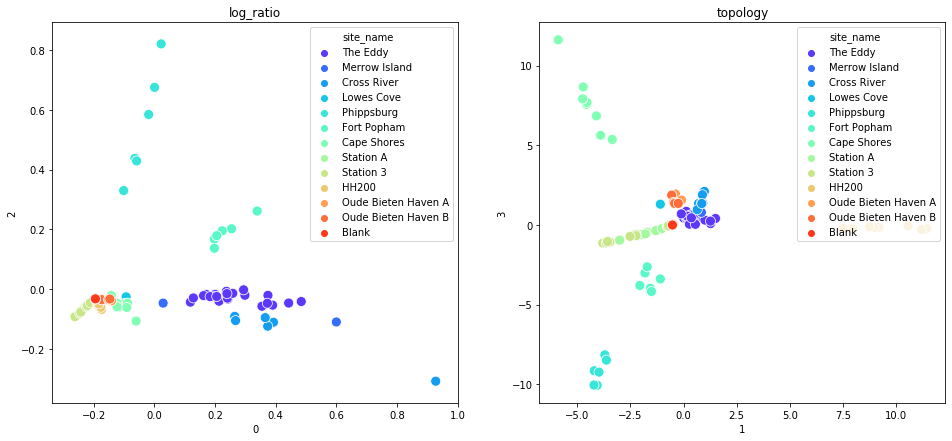

In [37]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].set_title('log_ratio')
sns.scatterplot(x=merged_pc_15093_dicoda_embedding_log_df[0], 
                y=merged_pc_15093_dicoda_embedding_log_df[2], 
                data = merged_pc_15093_dicoda_embedding_log_df, hue='site_name', 
                ax=axes[0], palette='rainbow', s=100)
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_15093_dicoda_embedding_topo_df[1], 
                y=merged_pc_15093_dicoda_embedding_topo_df[3], 
                data = merged_pc_15093_dicoda_embedding_topo_df, hue='site_name', 
                ax=axes[1], palette='rainbow', s=100)

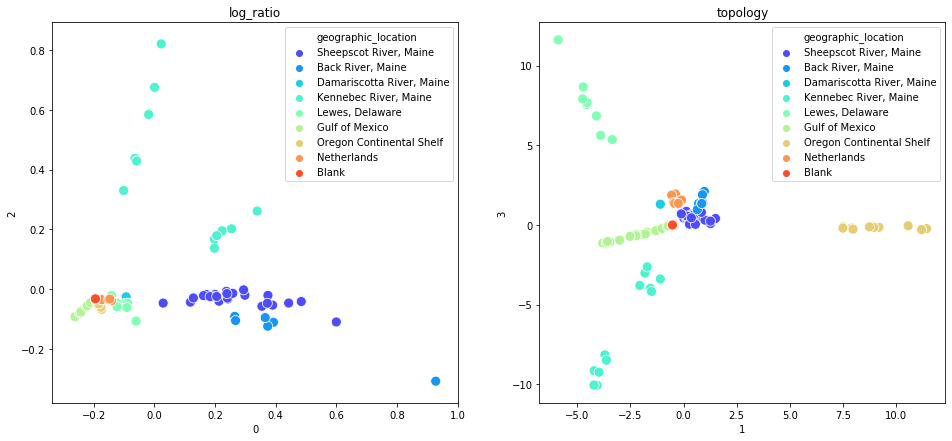

In [38]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].set_title('log_ratio')
sns.scatterplot(x=merged_pc_15093_dicoda_embedding_log_df[0], 
                y=merged_pc_15093_dicoda_embedding_log_df[2], 
                data = merged_pc_15093_dicoda_embedding_log_df, hue='geographic_location', 
                ax=axes[0], palette='rainbow', s=100)
axes[1].set_title("topology")
sns.scatterplot(x=merged_pc_15093_dicoda_embedding_topo_df[1], 
                y=merged_pc_15093_dicoda_embedding_topo_df[3], 
                data = merged_pc_15093_dicoda_embedding_topo_df, hue='geographic_location', 
                ax=axes[1], palette='rainbow', s=100)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: Degrees of freedom <= 0 for slice
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: Degrees of freedom <= 0 for slice


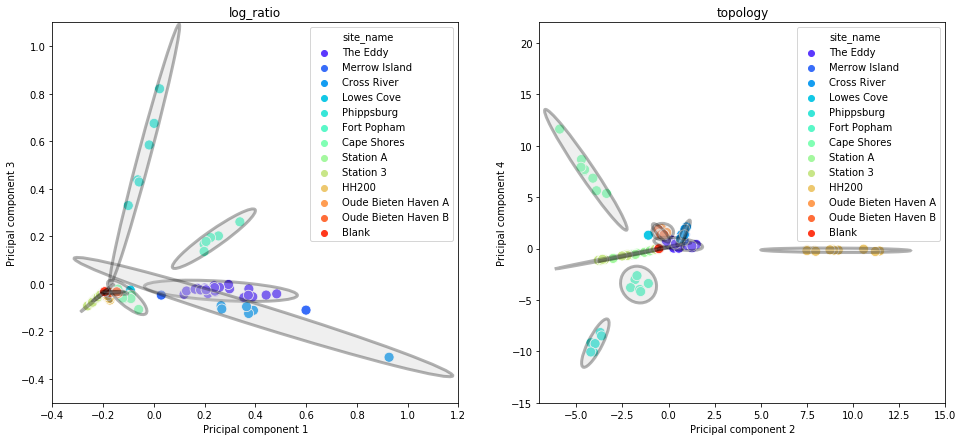

In [54]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
site_name = list(merged_pc_15093_dicoda_embedding_log_df['site_name'].unique())

axes[0].set_title('log_ratio')
axes[1].set_title('topology')

sns.scatterplot(x=merged_pc_15093_dicoda_embedding_log_df[0], 
                y=merged_pc_15093_dicoda_embedding_log_df[2], 
                data = merged_pc_15093_dicoda_embedding_log_df, hue='site_name', 
                ax=axes[0], palette='rainbow', s=100)

sns.scatterplot(x=merged_pc_15093_dicoda_embedding_topo_df[1], 
                y=merged_pc_15093_dicoda_embedding_topo_df[3], 
                data = merged_pc_15093_dicoda_embedding_topo_df, hue='site_name', 
                ax=axes[1], palette='rainbow', s=100)

for category in site_name:
    log_data = merged_pc_15093_dicoda_embedding_log_df[merged_pc_15093_dicoda_embedding_log_df['site_name']==category]
    topo_data = merged_pc_15093_dicoda_embedding_topo_df[merged_pc_15093_dicoda_embedding_topo_df['site_name']==category]
    log_x_mean = np.mean(log_data[0])
    log_y_mean = np.mean(log_data[2])
    topo_x_mean = np.mean(topo_data[1])
    topo_y_mean = np.mean(topo_data[3])
    
    log_cov = np.cov(log_data[0], log_data[2])
    topo_cov = np.cov(topo_data[1], topo_data[3])
   
    log_e = get_cov_ellipse(log_cov, (log_x_mean, log_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    topo_e = get_cov_ellipse(topo_cov, (topo_x_mean, topo_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)

axes[0].set_xlim(-0.4, 1.2)
axes[0].set_ylim(-0.5, 1.1)
axes[1].set_xlim(-7, 15)
axes[1].set_ylim(-15, 22)

axes[0].set_xlabel('Pricipal component 1')
axes[0].set_ylabel('Pricipal component 3')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 2')
axes[1].set_ylabel('Pricipal component 4')
axes[1].legend(loc='upper right', scatterpoints=1)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: Degrees of freedom <= 0 for slice
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: Degrees of freedom <= 0 for slice


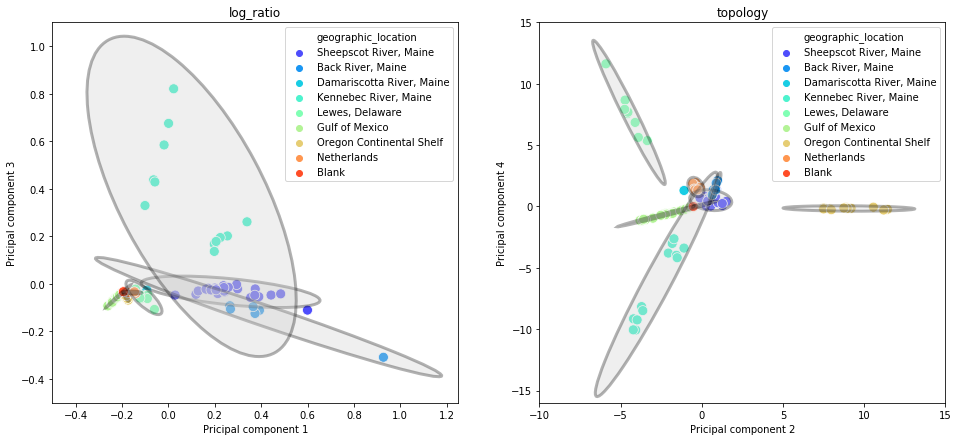

In [57]:
fig , axes = plt.subplots(1, 2, figsize=(16,7))
geographic_location = list(merged_pc_15093_dicoda_embedding_log_df['geographic_location'].unique())

axes[0].set_title('log_ratio')
axes[1].set_title('topology')

sns.scatterplot(x=merged_pc_15093_dicoda_embedding_log_df[0], 
                y=merged_pc_15093_dicoda_embedding_log_df[2], 
                data = merged_pc_15093_dicoda_embedding_log_df, hue='geographic_location', 
                ax=axes[0], palette='rainbow', s=100)

sns.scatterplot(x=merged_pc_15093_dicoda_embedding_topo_df[1], 
                y=merged_pc_15093_dicoda_embedding_topo_df[3], 
                data = merged_pc_15093_dicoda_embedding_topo_df, hue='geographic_location', 
                ax=axes[1], palette='rainbow', s=100)

for category in geographic_location:
    log_data = merged_pc_15093_dicoda_embedding_log_df[merged_pc_15093_dicoda_embedding_log_df['geographic_location']==category]
    topo_data = merged_pc_15093_dicoda_embedding_topo_df[merged_pc_15093_dicoda_embedding_topo_df['geographic_location']==category]
    log_x_mean = np.mean(log_data[0])
    log_y_mean = np.mean(log_data[2])
    topo_x_mean = np.mean(topo_data[1])
    topo_y_mean = np.mean(topo_data[3])
    
    log_cov = np.cov(log_data[0], log_data[2])
    topo_cov = np.cov(topo_data[1], topo_data[3])
   
    log_e = get_cov_ellipse(log_cov, (log_x_mean, log_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    topo_e = get_cov_ellipse(topo_cov, (topo_x_mean, topo_y_mean), 3, ec='#000000', fc='#CCCCCC',
                       linewidth=3.0, alpha = 0.3)
    axes[0].add_artist(log_e)
    axes[1].add_artist(topo_e)

axes[0].set_xlim(-0.5, 1.25)
axes[0].set_ylim(-0.5, 1.1)
axes[1].set_xlim(-10, 15)
axes[1].set_ylim(-16, 15)

axes[0].set_xlabel('Pricipal component 1')
axes[0].set_ylabel('Pricipal component 3')
axes[0].legend(loc='upper right', scatterpoints=1)
axes[1].set_xlabel('Pricipal component 2')
axes[1].set_ylabel('Pricipal component 4')
axes[1].legend(loc='upper right', scatterpoints=1)